In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

train = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/JH Demand Forecasting/Inputs/train.csv')
train_chart = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/JH Demand Forecasting/Inputs/train.csv')
test=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/JH Demand Forecasting/Inputs/test.csv')
test_id=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/JH Demand Forecasting/Inputs/test.csv')
print(train.head(5))
print(test.head(5))
train.dtypes

   record_ID      week  store_id  sku_id  total_price  base_price  \
0          1  17/01/11      8091  216418      99.0375    111.8625   
1          2  17/01/11      8091  216419      99.0375     99.0375   
2          3  17/01/11      8091  216425     133.9500    133.9500   
3          4  17/01/11      8091  216233     133.9500    133.9500   
4          5  17/01/11      8091  217390     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          52  
   record_ID      week  store_id  sku_id  total_price  base_price  \
0     212645  16/07/13      8091  216418     108.3000    108.3000   
1     212646  16/07/13      8091  216419     109.0125    109.0125   
2     212647  16/07/13      8091  216425     133.9500    133.9500   
3     212648  1

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [2]:
train['datetime'] = pd.to_datetime(train['week'])
train['store_id'] = train['store_id'].astype(object)
train['sku_id'] = train['sku_id'].astype(object)

train['dis']=train['base_price']-train['total_price']
train['per_dis']=train['dis']/train['base_price']
train['dis_flag']=train['dis'].apply(lambda x:1 if x>0 else (-1 if x<0 else 0))
                                     

test['datetime'] = pd.to_datetime(test['week'])
test['store_id'] = test['store_id'].astype(object)
test['sku_id'] = test['sku_id'].astype(object)

test['dis']=test['base_price']-test['total_price']
test['per_dis']=test['dis']/test['base_price']
test['dis_flag']=test['dis'].apply(lambda x:1 if x>0 else (-1 if x<0 else 0))


train.dtypes

record_ID                   int64
week                       object
store_id                   object
sku_id                     object
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
units_sold                  int64
datetime           datetime64[ns]
dis                       float64
per_dis                   float64
dis_flag                    int64
dtype: object

In [4]:
train['weekday'] = train['datetime'].dt.dayofweek
train['monthday']= train['datetime'].dt.day
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['weekend']= train['weekday'].apply(lambda x:1 if x>4 else 0 )
#train['sunday_or_monday']= train['weekday'].apply(lambda x:1 if x>5 or x<1 else 0 )
train['hour']= train['datetime'].apply(lambda x:x.hour )
#train['peak_hour']=train['hour'].apply(lambda x:1 if x<6 or x>19 else 0)
#train['time_filter']=train['hour'].apply(lambda x:1 if x is 2 or x is 4 else 0 )
#train['date_filter']=train['monthday'].apply(lambda x:1 if x is 23 or x is 30 else 0 )


train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,datetime,dis,per_dis,dis_flag,weekday,monthday,month,year,weekend,hour
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,2011-01-17,12.8250,0.114650,1,0,17,1,2011,0,0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,2011-01-17,0.0000,0.000000,0,0,17,1,2011,0,0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,2011-01-17,0.0000,0.000000,0,0,17,1,2011,0,0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,2011-01-17,0.0000,0.000000,0,0,17,1,2011,0,0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,2011-01-17,0.0000,0.000000,0,0,17,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,2013-09-07,0.0000,0.000000,0,5,7,9,2013,1,0
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,2013-09-07,0.0000,0.000000,0,5,7,9,2013,1,0
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,2013-09-07,126.1125,0.260677,1,5,7,9,2013,1,0
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,2013-09-07,49.8750,0.260223,1,5,7,9,2013,1,0


In [5]:
test['weekday'] = test['datetime'].dt.dayofweek
test['monthday']= test['datetime'].dt.day
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test['weekend']= test['weekday'].apply(lambda x:1 if x>4 else 0 )
#test['sunday_or_monday']= test['weekday'].apply(lambda x:1 if x>5 or x<1 else 0 )
test['hour']= test['datetime'].apply(lambda x:x.hour )
#test['peak_hour']=test['hour'].apply(lambda x:1 if x<6 or x>19 else 0)
#test['time_filter']=test['hour'].apply(lambda x:1 if x is 2 or x is 4 else 0 )
#test['date_filter']=test['monthday'].apply(lambda x:1 if x is 23 or x is 30 else 0 )
test.to_csv('C:/Users/np8022/Desktop/analytics Vidhya competition/JH Demand Forecasting/Outputs/test_download.csv',index=False)
test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,datetime,dis,per_dis,dis_flag,weekday,monthday,month,year,weekend,hour
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0,2013-07-16,0.0000,0.000000,0,1,16,7,2013,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0,2013-07-16,0.0000,0.000000,0,1,16,7,2013,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0,2013-07-16,0.0000,0.000000,0,1,16,7,2013,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0,2013-07-16,0.0000,0.000000,0,1,16,7,2013,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0,2013-07-16,0.0000,0.000000,0,1,16,7,2013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,2013-01-10,0.0000,0.000000,0,3,10,1,2013,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,2013-01-10,0.0000,0.000000,0,3,10,1,2013,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,2013-01-10,19.2375,0.047872,1,3,10,1,2013,0,0
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,2013-01-10,0.0000,0.000000,0,3,10,1,2013,0,0


In [6]:
train.drop(['record_ID','datetime','week'],axis=1,inplace=True)
test.drop(['record_ID','datetime','week'],axis=1,inplace=True)

train

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,dis,per_dis,dis_flag,weekday,monthday,month,year,weekend,hour
0,8091,216418,99.0375,111.8625,0,0,20,12.8250,0.114650,1,0,17,1,2011,0,0
1,8091,216419,99.0375,99.0375,0,0,28,0.0000,0.000000,0,0,17,1,2011,0,0
2,8091,216425,133.9500,133.9500,0,0,19,0.0000,0.000000,0,0,17,1,2011,0,0
3,8091,216233,133.9500,133.9500,0,0,44,0.0000,0.000000,0,0,17,1,2011,0,0
4,8091,217390,141.0750,141.0750,0,0,52,0.0000,0.000000,0,0,17,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,0.0000,0.000000,0,5,7,9,2013,1,0
150146,9984,223153,235.8375,235.8375,0,0,30,0.0000,0.000000,0,5,7,9,2013,1,0
150147,9984,245338,357.6750,483.7875,1,1,31,126.1125,0.260677,1,5,7,9,2013,1,0
150148,9984,547934,141.7875,191.6625,0,1,12,49.8750,0.260223,1,5,7,9,2013,1,0


In [7]:
Train







NameError: name 'Train' is not defined

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import fbeta_score, make_scorer
MSE = make_scorer(mean_squared_error, greater_is_better=False)

In [21]:
#Alternate code for gridsearch with stratkfold

Xd,yd=train.drop('units_sold',axis=1),train.units_sold 
params = {'n_estimators': [800,1200],
        'reg_lambda' : [5,7],
        'learning_rate' : [0.01,0.1],
        'depth' : [5,7],
        'bagging_temperature' : [1]
        }                        
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV

categorical_features_indices = np.where(Xd.dtypes =='object')[0]
catb = CatBoostRegressor(cat_features=categorical_features_indices,random_seed=13,early_stopping_rounds=100)

skf = StratifiedKFold(n_splits=2, shuffle = True, random_state = 13)
print('start_gridsearch')
grid = GridSearchCV(estimator=catb, param_grid=params, cv=skf.split(Xd,yd),scoring= MSE,verbose=100)
print('start_fit')
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/analytics Vidhya competition/JH Demand Forecasting/Outputs/model comparison Catreg tuning 1.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

start_gridsearch
start_fit


C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=5 
0:	learn: 58.2224316	total: 93.1ms	remaining: 1m 14s
1:	learn: 57.9391644	total: 106ms	remaining: 42.5s
2:	learn: 57.6599962	total: 130ms	remaining: 34.6s
3:	learn: 57.3928934	total: 148ms	remaining: 29.5s
4:	learn: 57.1214843	total: 161ms	remaining: 25.6s
5:	learn: 56.8567603	total: 187ms	remaining: 24.7s
6:	learn: 56.5924411	total: 202ms	remaining: 22.9s
7:	learn: 56.3384796	total: 221ms	remaining: 21.8s
8:	learn: 56.0837250	total: 245ms	remaining: 21.6s
9:	learn: 55.8336629	total: 263ms	remaining: 20.7s
10:	learn: 55.5868625	total: 283ms	remaining: 20.3s
11:	learn: 55.3405565	total: 298ms	remaining: 19.5s
12:	learn: 55.0998608	total: 324ms	remaining: 19.6s
13:	learn: 54.8632375	total: 338ms	remaining: 19s
14:	learn: 54.6318434	total: 353ms	remaining: 18.5s

159:	learn: 38.0002588	total: 3.32s	remaining: 13.3s
160:	learn: 37.9231526	total: 3.34s	remaining: 13.3s
161:	learn: 37.8541744	total: 3.37s	remaining: 13.3s
162:	learn: 37.7856165	total: 3.39s	remaining: 13.2s
163:	learn: 37.7161081	total: 3.41s	remaining: 13.2s
164:	learn: 37.6489485	total: 3.42s	remaining: 13.2s
165:	learn: 37.5773262	total: 3.44s	remaining: 13.1s
166:	learn: 37.5115284	total: 3.45s	remaining: 13.1s
167:	learn: 37.4412527	total: 3.47s	remaining: 13s
168:	learn: 37.3778797	total: 3.48s	remaining: 13s
169:	learn: 37.3108090	total: 3.5s	remaining: 13s
170:	learn: 37.2471773	total: 3.52s	remaining: 12.9s
171:	learn: 37.1842857	total: 3.54s	remaining: 12.9s
172:	learn: 37.1224512	total: 3.56s	remaining: 12.9s
173:	learn: 37.0582995	total: 3.58s	remaining: 12.9s
174:	learn: 37.0002181	total: 3.6s	remaining: 12.8s
175:	learn: 36.9452859	total: 3.61s	remaining: 12.8s
176:	learn: 36.8878088	total: 3.64s	remaining: 12.8s
177:	learn: 36.8325287	total: 3.65s	remaining: 12.8s
1

322:	learn: 32.6296022	total: 6.69s	remaining: 9.88s
323:	learn: 32.6125468	total: 6.7s	remaining: 9.85s
324:	learn: 32.5960356	total: 6.72s	remaining: 9.82s
325:	learn: 32.5811155	total: 6.74s	remaining: 9.79s
326:	learn: 32.5664137	total: 6.75s	remaining: 9.76s
327:	learn: 32.5511037	total: 6.76s	remaining: 9.73s
328:	learn: 32.5340234	total: 6.78s	remaining: 9.7s
329:	learn: 32.5196136	total: 6.79s	remaining: 9.67s
330:	learn: 32.5072896	total: 6.8s	remaining: 9.64s
331:	learn: 32.4902229	total: 6.81s	remaining: 9.61s
332:	learn: 32.4733327	total: 6.83s	remaining: 9.58s
333:	learn: 32.4612133	total: 6.85s	remaining: 9.56s
334:	learn: 32.4481271	total: 6.88s	remaining: 9.54s
335:	learn: 32.4354053	total: 6.9s	remaining: 9.53s
336:	learn: 32.4203282	total: 6.91s	remaining: 9.5s
337:	learn: 32.4037804	total: 6.93s	remaining: 9.48s
338:	learn: 32.3914964	total: 6.95s	remaining: 9.45s
339:	learn: 32.3767022	total: 6.96s	remaining: 9.41s
340:	learn: 32.3653819	total: 6.97s	remaining: 9.38

480:	learn: 31.0966479	total: 10s	remaining: 6.64s
481:	learn: 31.0926844	total: 10s	remaining: 6.61s
482:	learn: 31.0847856	total: 10.1s	remaining: 6.6s
483:	learn: 31.0775466	total: 10.1s	remaining: 6.58s
484:	learn: 31.0712655	total: 10.1s	remaining: 6.56s
485:	learn: 31.0668945	total: 10.1s	remaining: 6.54s
486:	learn: 31.0578674	total: 10.1s	remaining: 6.51s
487:	learn: 31.0509174	total: 10.2s	remaining: 6.5s
488:	learn: 31.0442722	total: 10.2s	remaining: 6.48s
489:	learn: 31.0387791	total: 10.2s	remaining: 6.46s
490:	learn: 31.0336764	total: 10.2s	remaining: 6.44s
491:	learn: 31.0266619	total: 10.2s	remaining: 6.41s
492:	learn: 31.0208512	total: 10.3s	remaining: 6.39s
493:	learn: 31.0141231	total: 10.3s	remaining: 6.37s
494:	learn: 31.0068733	total: 10.3s	remaining: 6.35s
495:	learn: 30.9986991	total: 10.3s	remaining: 6.34s
496:	learn: 30.9911812	total: 10.4s	remaining: 6.32s
497:	learn: 30.9842931	total: 10.4s	remaining: 6.3s
498:	learn: 30.9788429	total: 10.4s	remaining: 6.28s


637:	learn: 30.2823953	total: 14.1s	remaining: 3.57s
638:	learn: 30.2791436	total: 14.1s	remaining: 3.55s
639:	learn: 30.2718632	total: 14.1s	remaining: 3.53s
640:	learn: 30.2650496	total: 14.1s	remaining: 3.51s
641:	learn: 30.2584246	total: 14.2s	remaining: 3.49s
642:	learn: 30.2555306	total: 14.2s	remaining: 3.46s
643:	learn: 30.2499357	total: 14.2s	remaining: 3.44s
644:	learn: 30.2455039	total: 14.2s	remaining: 3.42s
645:	learn: 30.2388546	total: 14.3s	remaining: 3.4s
646:	learn: 30.2314925	total: 14.3s	remaining: 3.38s
647:	learn: 30.2293175	total: 14.3s	remaining: 3.35s
648:	learn: 30.2255129	total: 14.3s	remaining: 3.33s
649:	learn: 30.2234513	total: 14.3s	remaining: 3.31s
650:	learn: 30.2202440	total: 14.4s	remaining: 3.29s
651:	learn: 30.2172811	total: 14.4s	remaining: 3.27s
652:	learn: 30.2117315	total: 14.4s	remaining: 3.25s
653:	learn: 30.2097278	total: 14.4s	remaining: 3.22s
654:	learn: 30.2063262	total: 14.5s	remaining: 3.2s
655:	learn: 30.1991791	total: 14.5s	remaining: 3

[CV]  bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=5, score=-1050.128, total=  19.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s
[CV] bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=5 
0:	learn: 61.5662008	total: 37.8ms	remaining: 30.2s
1:	learn: 61.2776152	total: 54.1ms	remaining: 21.6s
2:	learn: 60.9993088	total: 73.4ms	remaining: 19.5s
3:	learn: 60.7260668	total: 90.5ms	remaining: 18s
4:	learn: 60.4547614	total: 107ms	remaining: 17s
5:	learn: 60.1889250	total: 131ms	remaining: 17.3s
6:	learn: 59.9278754	total: 156ms	remaining: 17.6s
7:	learn: 59.6599832	total: 171ms	remaining: 17s
8:	learn: 59.4013974	total: 189ms	remaining: 16.6s
9:	learn: 59.1428773	total: 205ms	remaining: 16.2s
10:	learn: 58.8924482	total: 222ms	remaining: 15.9s
11:	learn: 58.6454852	total: 238ms	remaining: 15.6s
12:	learn: 58.3963932	total: 255ms	remaining: 15.4s
13:	learn: 58.1573143	total: 269ms	remaining: 

156:	learn: 41.1144029	total: 3.09s	remaining: 12.6s
157:	learn: 41.0368752	total: 3.1s	remaining: 12.6s
158:	learn: 40.9680176	total: 3.12s	remaining: 12.6s
159:	learn: 40.8951734	total: 3.15s	remaining: 12.6s
160:	learn: 40.8145209	total: 3.17s	remaining: 12.6s
161:	learn: 40.7440890	total: 3.19s	remaining: 12.6s
162:	learn: 40.6714128	total: 3.22s	remaining: 12.6s
163:	learn: 40.5957074	total: 3.25s	remaining: 12.6s
164:	learn: 40.5238017	total: 3.27s	remaining: 12.6s
165:	learn: 40.4631818	total: 3.29s	remaining: 12.5s
166:	learn: 40.3895013	total: 3.31s	remaining: 12.5s
167:	learn: 40.3255215	total: 3.33s	remaining: 12.5s
168:	learn: 40.2578450	total: 3.34s	remaining: 12.5s
169:	learn: 40.1950378	total: 3.37s	remaining: 12.5s
170:	learn: 40.1299739	total: 3.39s	remaining: 12.5s
171:	learn: 40.0651811	total: 3.41s	remaining: 12.5s
172:	learn: 40.0007300	total: 3.43s	remaining: 12.4s
173:	learn: 39.9419415	total: 3.46s	remaining: 12.4s
174:	learn: 39.8766221	total: 3.48s	remaining: 

316:	learn: 35.6175755	total: 6.89s	remaining: 10.5s
317:	learn: 35.6060629	total: 6.91s	remaining: 10.5s
318:	learn: 35.5906809	total: 6.94s	remaining: 10.5s
319:	learn: 35.5828653	total: 6.96s	remaining: 10.4s
320:	learn: 35.5735475	total: 6.99s	remaining: 10.4s
321:	learn: 35.5592462	total: 7.02s	remaining: 10.4s
322:	learn: 35.5471678	total: 7.03s	remaining: 10.4s
323:	learn: 35.5350680	total: 7.05s	remaining: 10.4s
324:	learn: 35.5246617	total: 7.08s	remaining: 10.3s
325:	learn: 35.5103605	total: 7.13s	remaining: 10.4s
326:	learn: 35.4980089	total: 7.15s	remaining: 10.3s
327:	learn: 35.4782845	total: 7.18s	remaining: 10.3s
328:	learn: 35.4619028	total: 7.2s	remaining: 10.3s
329:	learn: 35.4462042	total: 7.23s	remaining: 10.3s
330:	learn: 35.4369436	total: 7.24s	remaining: 10.3s
331:	learn: 35.4244800	total: 7.26s	remaining: 10.2s
332:	learn: 35.4106922	total: 7.29s	remaining: 10.2s
333:	learn: 35.3963374	total: 7.3s	remaining: 10.2s
334:	learn: 35.3787387	total: 7.32s	remaining: 1

478:	learn: 33.9286582	total: 10.9s	remaining: 7.29s
479:	learn: 33.9193316	total: 10.9s	remaining: 7.27s
480:	learn: 33.9112724	total: 10.9s	remaining: 7.25s
481:	learn: 33.8990857	total: 11s	remaining: 7.23s
482:	learn: 33.8873752	total: 11s	remaining: 7.21s
483:	learn: 33.8792830	total: 11s	remaining: 7.19s
484:	learn: 33.8714648	total: 11s	remaining: 7.18s
485:	learn: 33.8649243	total: 11.1s	remaining: 7.15s
486:	learn: 33.8548046	total: 11.1s	remaining: 7.13s
487:	learn: 33.8397875	total: 11.1s	remaining: 7.11s
488:	learn: 33.8362532	total: 11.2s	remaining: 7.09s
489:	learn: 33.8287726	total: 11.2s	remaining: 7.07s
490:	learn: 33.8239225	total: 11.2s	remaining: 7.05s
491:	learn: 33.8150984	total: 11.2s	remaining: 7.03s
492:	learn: 33.8050696	total: 11.2s	remaining: 7s
493:	learn: 33.7997749	total: 11.3s	remaining: 6.98s
494:	learn: 33.7944085	total: 11.3s	remaining: 6.96s
495:	learn: 33.7861650	total: 11.3s	remaining: 6.95s
496:	learn: 33.7768391	total: 11.3s	remaining: 6.92s
497:

639:	learn: 32.8741613	total: 15s	remaining: 3.75s
640:	learn: 32.8720534	total: 15s	remaining: 3.73s
641:	learn: 32.8670268	total: 15.1s	remaining: 3.71s
642:	learn: 32.8600906	total: 15.1s	remaining: 3.68s
643:	learn: 32.8506468	total: 15.1s	remaining: 3.66s
644:	learn: 32.8461658	total: 15.1s	remaining: 3.63s
645:	learn: 32.8403081	total: 15.1s	remaining: 3.61s
646:	learn: 32.8370208	total: 15.2s	remaining: 3.59s
647:	learn: 32.8327880	total: 15.2s	remaining: 3.57s
648:	learn: 32.8270275	total: 15.2s	remaining: 3.54s
649:	learn: 32.8238585	total: 15.3s	remaining: 3.52s
650:	learn: 32.8203946	total: 15.3s	remaining: 3.5s
651:	learn: 32.8162596	total: 15.3s	remaining: 3.48s
652:	learn: 32.8122399	total: 15.4s	remaining: 3.46s
653:	learn: 32.8028309	total: 15.4s	remaining: 3.43s
654:	learn: 32.7993990	total: 15.4s	remaining: 3.41s
655:	learn: 32.7966436	total: 15.5s	remaining: 3.39s
656:	learn: 32.7918167	total: 15.5s	remaining: 3.37s
657:	learn: 32.7880896	total: 15.5s	remaining: 3.35

[CV]  bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=5, score=-860.271, total=  20.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.2s remaining:    0.0s
[CV] bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=7 
0:	learn: 58.2245734	total: 55.4ms	remaining: 44.3s
1:	learn: 57.9434403	total: 69.8ms	remaining: 27.9s
2:	learn: 57.6665247	total: 102ms	remaining: 27s
3:	learn: 57.4013073	total: 120ms	remaining: 23.8s
4:	learn: 57.1318323	total: 135ms	remaining: 21.5s
5:	learn: 56.8688507	total: 164ms	remaining: 21.6s
6:	learn: 56.6064090	total: 179ms	remaining: 20.2s
7:	learn: 56.3534775	total: 200ms	remaining: 19.8s
8:	learn: 56.0999078	total: 220ms	remaining: 19.3s
9:	learn: 55.8510078	total: 242ms	remaining: 19.1s
10:	learn: 55.6053701	total: 263ms	remaining: 18.9s
11:	learn: 55.3607508	total: 277ms	remaining: 18.2s
12:	learn: 55.1211624	total: 297ms	remaining: 18s
13:	learn: 54.8873124	total: 312ms	remaining: 1

155:	learn: 38.5063733	total: 3.41s	remaining: 14.1s
156:	learn: 38.4560880	total: 3.44s	remaining: 14.1s
157:	learn: 38.4060190	total: 3.46s	remaining: 14.1s
158:	learn: 38.3527707	total: 3.48s	remaining: 14s
159:	learn: 38.3066954	total: 3.51s	remaining: 14s
160:	learn: 38.2333744	total: 3.53s	remaining: 14s
161:	learn: 38.1597945	total: 3.55s	remaining: 14s
162:	learn: 38.0823183	total: 3.58s	remaining: 14s
163:	learn: 38.0086270	total: 3.61s	remaining: 14s
164:	learn: 37.9337881	total: 3.63s	remaining: 14s
165:	learn: 37.8655482	total: 3.65s	remaining: 13.9s
166:	learn: 37.7937113	total: 3.67s	remaining: 13.9s
167:	learn: 37.7224580	total: 3.68s	remaining: 13.9s
168:	learn: 37.6554974	total: 3.71s	remaining: 13.8s
169:	learn: 37.5961101	total: 3.73s	remaining: 13.8s
170:	learn: 37.5375757	total: 3.74s	remaining: 13.8s
171:	learn: 37.4712533	total: 3.76s	remaining: 13.7s
172:	learn: 37.4095138	total: 3.78s	remaining: 13.7s
173:	learn: 37.3455092	total: 3.8s	remaining: 13.7s
174:	lea

314:	learn: 32.7837131	total: 7.04s	remaining: 10.8s
315:	learn: 32.7674225	total: 7.07s	remaining: 10.8s
316:	learn: 32.7500953	total: 7.08s	remaining: 10.8s
317:	learn: 32.7380658	total: 7.1s	remaining: 10.8s
318:	learn: 32.7193552	total: 7.13s	remaining: 10.7s
319:	learn: 32.7032089	total: 7.14s	remaining: 10.7s
320:	learn: 32.6882321	total: 7.17s	remaining: 10.7s
321:	learn: 32.6751320	total: 7.2s	remaining: 10.7s
322:	learn: 32.6620598	total: 7.22s	remaining: 10.7s
323:	learn: 32.6462248	total: 7.24s	remaining: 10.6s
324:	learn: 32.6307768	total: 7.26s	remaining: 10.6s
325:	learn: 32.6142343	total: 7.28s	remaining: 10.6s
326:	learn: 32.6009420	total: 7.3s	remaining: 10.6s
327:	learn: 32.5871992	total: 7.31s	remaining: 10.5s
328:	learn: 32.5707769	total: 7.33s	remaining: 10.5s
329:	learn: 32.5564430	total: 7.36s	remaining: 10.5s
330:	learn: 32.5440517	total: 7.37s	remaining: 10.4s
331:	learn: 32.5304525	total: 7.39s	remaining: 10.4s
332:	learn: 32.5180888	total: 7.4s	remaining: 10.

475:	learn: 31.1757443	total: 10.4s	remaining: 7.09s
476:	learn: 31.1693500	total: 10.4s	remaining: 7.07s
477:	learn: 31.1641653	total: 10.5s	remaining: 7.05s
478:	learn: 31.1590466	total: 10.5s	remaining: 7.04s
479:	learn: 31.1539362	total: 10.5s	remaining: 7.01s
480:	learn: 31.1466764	total: 10.5s	remaining: 6.99s
481:	learn: 31.1419169	total: 10.5s	remaining: 6.96s
482:	learn: 31.1331264	total: 10.6s	remaining: 6.93s
483:	learn: 31.1274258	total: 10.6s	remaining: 6.91s
484:	learn: 31.1209800	total: 10.6s	remaining: 6.89s
485:	learn: 31.1141471	total: 10.6s	remaining: 6.87s
486:	learn: 31.1088289	total: 10.7s	remaining: 6.85s
487:	learn: 31.1048144	total: 10.7s	remaining: 6.83s
488:	learn: 31.1013532	total: 10.7s	remaining: 6.81s
489:	learn: 31.0944398	total: 10.7s	remaining: 6.78s
490:	learn: 31.0873461	total: 10.7s	remaining: 6.76s
491:	learn: 31.0805807	total: 10.8s	remaining: 6.75s
492:	learn: 31.0717483	total: 10.8s	remaining: 6.73s
493:	learn: 31.0644105	total: 10.8s	remaining:

635:	learn: 30.3509128	total: 14.1s	remaining: 3.65s
636:	learn: 30.3471651	total: 14.2s	remaining: 3.62s
637:	learn: 30.3435100	total: 14.2s	remaining: 3.6s
638:	learn: 30.3392221	total: 14.2s	remaining: 3.58s
639:	learn: 30.3352094	total: 14.2s	remaining: 3.56s
640:	learn: 30.3286523	total: 14.3s	remaining: 3.54s
641:	learn: 30.3245065	total: 14.3s	remaining: 3.51s
642:	learn: 30.3205092	total: 14.3s	remaining: 3.49s
643:	learn: 30.3151010	total: 14.3s	remaining: 3.47s
644:	learn: 30.3105620	total: 14.4s	remaining: 3.45s
645:	learn: 30.3076699	total: 14.4s	remaining: 3.43s
646:	learn: 30.3050665	total: 14.4s	remaining: 3.41s
647:	learn: 30.3016738	total: 14.5s	remaining: 3.39s
648:	learn: 30.2986279	total: 14.5s	remaining: 3.37s
649:	learn: 30.2967077	total: 14.5s	remaining: 3.35s
650:	learn: 30.2935435	total: 14.5s	remaining: 3.33s
651:	learn: 30.2890220	total: 14.6s	remaining: 3.31s
652:	learn: 30.2834452	total: 14.6s	remaining: 3.29s
653:	learn: 30.2791182	total: 14.6s	remaining: 

793:	learn: 29.7221075	total: 18.3s	remaining: 138ms
794:	learn: 29.7184021	total: 18.3s	remaining: 115ms
795:	learn: 29.7160385	total: 18.4s	remaining: 92.2ms
796:	learn: 29.7139005	total: 18.4s	remaining: 69.2ms
797:	learn: 29.7117202	total: 18.4s	remaining: 46.1ms
798:	learn: 29.7097159	total: 18.4s	remaining: 23ms
799:	learn: 29.7066262	total: 18.4s	remaining: 0us
[CV]  bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=7, score=-1052.914, total=  19.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s remaining:    0.0s
[CV] bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=7 
0:	learn: 61.5683629	total: 35.7ms	remaining: 28.6s
1:	learn: 61.2813563	total: 52.1ms	remaining: 20.8s
2:	learn: 61.0053931	total: 68ms	remaining: 18.1s
3:	learn: 60.7341516	total: 87.4ms	remaining: 17.4s
4:	learn: 60.4643807	total: 107ms	remaining: 17s
5:	learn: 60.2004553	total: 143ms	remaining: 18.9s
6:	learn: 59.9409892	total: 170ms

153:	learn: 41.0036325	total: 3.5s	remaining: 14.7s
154:	learn: 40.9362879	total: 3.52s	remaining: 14.6s
155:	learn: 40.8614966	total: 3.53s	remaining: 14.6s
156:	learn: 40.7954897	total: 3.55s	remaining: 14.6s
157:	learn: 40.7299128	total: 3.57s	remaining: 14.5s
158:	learn: 40.6631259	total: 3.59s	remaining: 14.5s
159:	learn: 40.6008568	total: 3.61s	remaining: 14.4s
160:	learn: 40.5374654	total: 3.63s	remaining: 14.4s
161:	learn: 40.4759618	total: 3.67s	remaining: 14.5s
162:	learn: 40.4091125	total: 3.69s	remaining: 14.4s
163:	learn: 40.3459225	total: 3.72s	remaining: 14.4s
164:	learn: 40.2787592	total: 3.75s	remaining: 14.4s
165:	learn: 40.2176761	total: 3.76s	remaining: 14.4s
166:	learn: 40.1599922	total: 3.79s	remaining: 14.4s
167:	learn: 40.1010648	total: 3.81s	remaining: 14.3s
168:	learn: 40.0413116	total: 3.83s	remaining: 14.3s
169:	learn: 39.9777864	total: 3.86s	remaining: 14.3s
170:	learn: 39.9137285	total: 3.87s	remaining: 14.2s
171:	learn: 39.8563451	total: 3.89s	remaining: 

312:	learn: 35.6748682	total: 7.25s	remaining: 11.3s
313:	learn: 35.6572666	total: 7.26s	remaining: 11.2s
314:	learn: 35.6456955	total: 7.27s	remaining: 11.2s
315:	learn: 35.6307462	total: 7.3s	remaining: 11.2s
316:	learn: 35.6167940	total: 7.33s	remaining: 11.2s
317:	learn: 35.6032321	total: 7.35s	remaining: 11.1s
318:	learn: 35.5928204	total: 7.37s	remaining: 11.1s
319:	learn: 35.5788066	total: 7.39s	remaining: 11.1s
320:	learn: 35.5680341	total: 7.4s	remaining: 11s
321:	learn: 35.5592189	total: 7.42s	remaining: 11s
322:	learn: 35.5449996	total: 7.44s	remaining: 11s
323:	learn: 35.5351417	total: 7.46s	remaining: 11s
324:	learn: 35.5249977	total: 7.47s	remaining: 10.9s
325:	learn: 35.5066843	total: 7.5s	remaining: 10.9s
326:	learn: 35.4973862	total: 7.52s	remaining: 10.9s
327:	learn: 35.4829574	total: 7.55s	remaining: 10.9s
328:	learn: 35.4705487	total: 7.56s	remaining: 10.8s
329:	learn: 35.4602309	total: 7.58s	remaining: 10.8s
330:	learn: 35.4470414	total: 7.6s	remaining: 10.8s
331:	

472:	learn: 33.9902487	total: 11s	remaining: 7.62s
473:	learn: 33.9772869	total: 11s	remaining: 7.6s
474:	learn: 33.9685106	total: 11.1s	remaining: 7.58s
475:	learn: 33.9622834	total: 11.1s	remaining: 7.57s
476:	learn: 33.9534290	total: 11.1s	remaining: 7.54s
477:	learn: 33.9494646	total: 11.2s	remaining: 7.53s
478:	learn: 33.9389630	total: 11.2s	remaining: 7.49s
479:	learn: 33.9305712	total: 11.2s	remaining: 7.47s
480:	learn: 33.9184684	total: 11.2s	remaining: 7.44s
481:	learn: 33.9098846	total: 11.2s	remaining: 7.41s
482:	learn: 33.9023516	total: 11.3s	remaining: 7.39s
483:	learn: 33.8946100	total: 11.3s	remaining: 7.38s
484:	learn: 33.8890636	total: 11.3s	remaining: 7.35s
485:	learn: 33.8815312	total: 11.4s	remaining: 7.33s
486:	learn: 33.8727162	total: 11.4s	remaining: 7.32s
487:	learn: 33.8658536	total: 11.4s	remaining: 7.31s
488:	learn: 33.8603492	total: 11.5s	remaining: 7.28s
489:	learn: 33.8525352	total: 11.5s	remaining: 7.26s
490:	learn: 33.8481695	total: 11.5s	remaining: 7.24

634:	learn: 32.9535591	total: 15.2s	remaining: 3.94s
635:	learn: 32.9461955	total: 15.2s	remaining: 3.92s
636:	learn: 32.9373125	total: 15.2s	remaining: 3.9s
637:	learn: 32.9321155	total: 15.3s	remaining: 3.88s
638:	learn: 32.9278187	total: 15.3s	remaining: 3.85s
639:	learn: 32.9191779	total: 15.3s	remaining: 3.83s
640:	learn: 32.9125871	total: 15.3s	remaining: 3.8s
641:	learn: 32.9087114	total: 15.4s	remaining: 3.78s
642:	learn: 32.9045030	total: 15.4s	remaining: 3.75s
643:	learn: 32.8960846	total: 15.4s	remaining: 3.73s
644:	learn: 32.8927225	total: 15.4s	remaining: 3.7s
645:	learn: 32.8896846	total: 15.4s	remaining: 3.68s
646:	learn: 32.8861183	total: 15.4s	remaining: 3.65s
647:	learn: 32.8798885	total: 15.5s	remaining: 3.63s
648:	learn: 32.8736187	total: 15.5s	remaining: 3.6s
649:	learn: 32.8677792	total: 15.5s	remaining: 3.58s
650:	learn: 32.8634732	total: 15.5s	remaining: 3.56s
651:	learn: 32.8595952	total: 15.6s	remaining: 3.53s
652:	learn: 32.8552124	total: 15.6s	remaining: 3.5

792:	learn: 32.2397171	total: 19.7s	remaining: 174ms
793:	learn: 32.2368018	total: 19.8s	remaining: 149ms
794:	learn: 32.2345354	total: 19.8s	remaining: 125ms
795:	learn: 32.2264987	total: 19.9s	remaining: 99.8ms
796:	learn: 32.2254841	total: 19.9s	remaining: 74.9ms
797:	learn: 32.2227440	total: 19.9s	remaining: 49.9ms
798:	learn: 32.2215019	total: 20s	remaining: 25ms
799:	learn: 32.2150482	total: 20s	remaining: 0us
[CV]  bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=800, reg_lambda=7, score=-861.787, total=  20.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[CV] bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=1200, reg_lambda=5 
0:	learn: 58.2224316	total: 35ms	remaining: 42s
1:	learn: 57.9391644	total: 47.5ms	remaining: 28.5s
2:	learn: 57.6599962	total: 77.5ms	remaining: 30.9s
3:	learn: 57.3928934	total: 94.4ms	remaining: 28.2s
4:	learn: 57.1214843	total: 111ms	remaining: 26.4s
5:	learn: 56.8567603	total: 138ms	r

151:	learn: 38.6081953	total: 3.17s	remaining: 21.9s
152:	learn: 38.5306890	total: 3.19s	remaining: 21.9s
153:	learn: 38.4548880	total: 3.21s	remaining: 21.8s
154:	learn: 38.3841619	total: 3.23s	remaining: 21.8s
155:	learn: 38.3082590	total: 3.25s	remaining: 21.8s
156:	learn: 38.2277943	total: 3.27s	remaining: 21.7s
157:	learn: 38.1548876	total: 3.29s	remaining: 21.7s
158:	learn: 38.0795563	total: 3.31s	remaining: 21.7s
159:	learn: 38.0002588	total: 3.33s	remaining: 21.6s
160:	learn: 37.9231526	total: 3.34s	remaining: 21.6s
161:	learn: 37.8541744	total: 3.37s	remaining: 21.6s
162:	learn: 37.7856165	total: 3.39s	remaining: 21.6s
163:	learn: 37.7161081	total: 3.42s	remaining: 21.6s
164:	learn: 37.6489485	total: 3.44s	remaining: 21.6s
165:	learn: 37.5773262	total: 3.46s	remaining: 21.5s
166:	learn: 37.5115284	total: 3.48s	remaining: 21.5s
167:	learn: 37.4412527	total: 3.5s	remaining: 21.5s
168:	learn: 37.3778797	total: 3.51s	remaining: 21.4s
169:	learn: 37.3108090	total: 3.53s	remaining: 

308:	learn: 32.8330982	total: 6.9s	remaining: 19.9s
309:	learn: 32.8208971	total: 6.92s	remaining: 19.9s
310:	learn: 32.8049425	total: 6.95s	remaining: 19.9s
311:	learn: 32.7870823	total: 6.97s	remaining: 19.8s
312:	learn: 32.7741284	total: 7s	remaining: 19.8s
313:	learn: 32.7581436	total: 7.01s	remaining: 19.8s
314:	learn: 32.7442885	total: 7.04s	remaining: 19.8s
315:	learn: 32.7295862	total: 7.06s	remaining: 19.7s
316:	learn: 32.7141940	total: 7.08s	remaining: 19.7s
317:	learn: 32.7001117	total: 7.11s	remaining: 19.7s
318:	learn: 32.6883633	total: 7.13s	remaining: 19.7s
319:	learn: 32.6732556	total: 7.15s	remaining: 19.7s
320:	learn: 32.6576464	total: 7.16s	remaining: 19.6s
321:	learn: 32.6406523	total: 7.17s	remaining: 19.6s
322:	learn: 32.6296022	total: 7.19s	remaining: 19.5s
323:	learn: 32.6125468	total: 7.2s	remaining: 19.5s
324:	learn: 32.5960356	total: 7.23s	remaining: 19.5s
325:	learn: 32.5811155	total: 7.25s	remaining: 19.4s
326:	learn: 32.5664137	total: 7.26s	remaining: 19.4

471:	learn: 31.1514455	total: 10.4s	remaining: 16s
472:	learn: 31.1472893	total: 10.4s	remaining: 16s
473:	learn: 31.1437763	total: 10.4s	remaining: 16s
474:	learn: 31.1386929	total: 10.4s	remaining: 15.9s
475:	learn: 31.1353269	total: 10.5s	remaining: 15.9s
476:	learn: 31.1239423	total: 10.5s	remaining: 15.9s
477:	learn: 31.1189337	total: 10.5s	remaining: 15.9s
478:	learn: 31.1123976	total: 10.5s	remaining: 15.9s
479:	learn: 31.1037843	total: 10.6s	remaining: 15.9s
480:	learn: 31.0966479	total: 10.6s	remaining: 15.8s
481:	learn: 31.0926844	total: 10.6s	remaining: 15.8s
482:	learn: 31.0847856	total: 10.6s	remaining: 15.8s
483:	learn: 31.0775466	total: 10.7s	remaining: 15.8s
484:	learn: 31.0712655	total: 10.7s	remaining: 15.8s
485:	learn: 31.0668945	total: 10.7s	remaining: 15.8s
486:	learn: 31.0578674	total: 10.7s	remaining: 15.7s
487:	learn: 31.0509174	total: 10.8s	remaining: 15.7s
488:	learn: 31.0442722	total: 10.8s	remaining: 15.7s
489:	learn: 31.0387791	total: 10.8s	remaining: 15.7s

634:	learn: 30.2946214	total: 14.6s	remaining: 13s
635:	learn: 30.2913548	total: 14.7s	remaining: 13s
636:	learn: 30.2869459	total: 14.7s	remaining: 13s
637:	learn: 30.2823953	total: 14.7s	remaining: 12.9s
638:	learn: 30.2791436	total: 14.7s	remaining: 12.9s
639:	learn: 30.2718632	total: 14.8s	remaining: 12.9s
640:	learn: 30.2650496	total: 14.8s	remaining: 12.9s
641:	learn: 30.2584246	total: 14.8s	remaining: 12.9s
642:	learn: 30.2555306	total: 14.8s	remaining: 12.8s
643:	learn: 30.2499357	total: 14.8s	remaining: 12.8s
644:	learn: 30.2455039	total: 14.9s	remaining: 12.8s
645:	learn: 30.2388546	total: 14.9s	remaining: 12.8s
646:	learn: 30.2314925	total: 14.9s	remaining: 12.7s
647:	learn: 30.2293175	total: 14.9s	remaining: 12.7s
648:	learn: 30.2255129	total: 15s	remaining: 12.7s
649:	learn: 30.2234513	total: 15s	remaining: 12.7s
650:	learn: 30.2202440	total: 15s	remaining: 12.7s
651:	learn: 30.2172811	total: 15s	remaining: 12.6s
652:	learn: 30.2117315	total: 15.1s	remaining: 12.6s
653:	le

793:	learn: 29.6730131	total: 18.6s	remaining: 9.53s
794:	learn: 29.6703213	total: 18.6s	remaining: 9.5s
795:	learn: 29.6663628	total: 18.7s	remaining: 9.48s
796:	learn: 29.6637938	total: 18.7s	remaining: 9.46s
797:	learn: 29.6588308	total: 18.7s	remaining: 9.43s
798:	learn: 29.6548416	total: 18.8s	remaining: 9.42s
799:	learn: 29.6523723	total: 18.8s	remaining: 9.39s
800:	learn: 29.6464597	total: 18.8s	remaining: 9.37s
801:	learn: 29.6431146	total: 18.8s	remaining: 9.35s
802:	learn: 29.6389412	total: 18.9s	remaining: 9.33s
803:	learn: 29.6349184	total: 18.9s	remaining: 9.3s
804:	learn: 29.6333130	total: 18.9s	remaining: 9.28s
805:	learn: 29.6306547	total: 18.9s	remaining: 9.26s
806:	learn: 29.6259150	total: 19s	remaining: 9.23s
807:	learn: 29.6218433	total: 19s	remaining: 9.21s
808:	learn: 29.6175502	total: 19s	remaining: 9.19s
809:	learn: 29.6126239	total: 19s	remaining: 9.17s
810:	learn: 29.6113246	total: 19.1s	remaining: 9.14s
811:	learn: 29.6053649	total: 19.1s	remaining: 9.12s
812

953:	learn: 29.1258847	total: 22.5s	remaining: 5.8s
954:	learn: 29.1209472	total: 22.5s	remaining: 5.78s
955:	learn: 29.1170528	total: 22.5s	remaining: 5.75s
956:	learn: 29.1118229	total: 22.6s	remaining: 5.73s
957:	learn: 29.1081165	total: 22.6s	remaining: 5.71s
958:	learn: 29.1005540	total: 22.6s	remaining: 5.69s
959:	learn: 29.0993466	total: 22.6s	remaining: 5.66s
960:	learn: 29.0973142	total: 22.7s	remaining: 5.64s
961:	learn: 29.0919756	total: 22.7s	remaining: 5.61s
962:	learn: 29.0871461	total: 22.7s	remaining: 5.59s
963:	learn: 29.0835249	total: 22.7s	remaining: 5.57s
964:	learn: 29.0795876	total: 22.8s	remaining: 5.54s
965:	learn: 29.0770467	total: 22.8s	remaining: 5.52s
966:	learn: 29.0756164	total: 22.8s	remaining: 5.5s
967:	learn: 29.0737589	total: 22.8s	remaining: 5.47s
968:	learn: 29.0731919	total: 22.8s	remaining: 5.44s
969:	learn: 29.0719333	total: 22.8s	remaining: 5.42s
970:	learn: 29.0706300	total: 22.9s	remaining: 5.39s
971:	learn: 29.0684906	total: 22.9s	remaining: 5

1111:	learn: 28.6422927	total: 26.6s	remaining: 2.1s
1112:	learn: 28.6384666	total: 26.6s	remaining: 2.08s
1113:	learn: 28.6346485	total: 26.6s	remaining: 2.06s
1114:	learn: 28.6285387	total: 26.7s	remaining: 2.03s
1115:	learn: 28.6244158	total: 26.7s	remaining: 2.01s
1116:	learn: 28.6221332	total: 26.7s	remaining: 1.98s
1117:	learn: 28.6199700	total: 26.7s	remaining: 1.96s
1118:	learn: 28.6162683	total: 26.8s	remaining: 1.94s
1119:	learn: 28.6150580	total: 26.8s	remaining: 1.91s
1120:	learn: 28.6114153	total: 26.8s	remaining: 1.89s
1121:	learn: 28.6092103	total: 26.9s	remaining: 1.87s
1122:	learn: 28.6070736	total: 26.9s	remaining: 1.84s
1123:	learn: 28.6048372	total: 26.9s	remaining: 1.82s
1124:	learn: 28.6003997	total: 26.9s	remaining: 1.79s
1125:	learn: 28.5964505	total: 27s	remaining: 1.77s
1126:	learn: 28.5936995	total: 27s	remaining: 1.75s
1127:	learn: 28.5908356	total: 27s	remaining: 1.73s
1128:	learn: 28.5845840	total: 27.1s	remaining: 1.7s
1129:	learn: 28.5804264	total: 27.1s

69:	learn: 48.4361553	total: 1.34s	remaining: 21.7s
70:	learn: 48.3131924	total: 1.37s	remaining: 21.7s
71:	learn: 48.1914703	total: 1.39s	remaining: 21.8s
72:	learn: 48.0756555	total: 1.41s	remaining: 21.7s
73:	learn: 47.9414769	total: 1.43s	remaining: 21.7s
74:	learn: 47.8194823	total: 1.46s	remaining: 21.8s
75:	learn: 47.7086681	total: 1.48s	remaining: 21.9s
76:	learn: 47.5825887	total: 1.5s	remaining: 21.9s
77:	learn: 47.4702649	total: 1.53s	remaining: 22s
78:	learn: 47.3620339	total: 1.55s	remaining: 22s
79:	learn: 47.2560224	total: 1.57s	remaining: 22s
80:	learn: 47.1427679	total: 1.59s	remaining: 22s
81:	learn: 47.0330667	total: 1.61s	remaining: 22s
82:	learn: 46.9261661	total: 1.64s	remaining: 22.1s
83:	learn: 46.8046744	total: 1.67s	remaining: 22.1s
84:	learn: 46.6950168	total: 1.68s	remaining: 22s
85:	learn: 46.5832473	total: 1.7s	remaining: 22.1s
86:	learn: 46.4672818	total: 1.72s	remaining: 22.1s
87:	learn: 46.3656200	total: 1.75s	remaining: 22.1s
88:	learn: 46.2597439	tota

232:	learn: 37.3525174	total: 4.88s	remaining: 20.2s
233:	learn: 37.3239203	total: 4.9s	remaining: 20.2s
234:	learn: 37.2957380	total: 4.92s	remaining: 20.2s
235:	learn: 37.2687689	total: 4.93s	remaining: 20.2s
236:	learn: 37.2389156	total: 4.96s	remaining: 20.2s
237:	learn: 37.2104074	total: 4.98s	remaining: 20.1s
238:	learn: 37.1817835	total: 5.01s	remaining: 20.1s
239:	learn: 37.1530161	total: 5.03s	remaining: 20.1s
240:	learn: 37.1218715	total: 5.06s	remaining: 20.1s
241:	learn: 37.0881093	total: 5.08s	remaining: 20.1s
242:	learn: 37.0602307	total: 5.12s	remaining: 20.1s
243:	learn: 37.0326518	total: 5.14s	remaining: 20.1s
244:	learn: 37.0063941	total: 5.15s	remaining: 20.1s
245:	learn: 36.9785240	total: 5.17s	remaining: 20.1s
246:	learn: 36.9587103	total: 5.2s	remaining: 20s
247:	learn: 36.9327647	total: 5.21s	remaining: 20s
248:	learn: 36.9091927	total: 5.24s	remaining: 20s
249:	learn: 36.8817196	total: 5.27s	remaining: 20s
250:	learn: 36.8571899	total: 5.3s	remaining: 20s
251:	l

388:	learn: 34.7646035	total: 8.66s	remaining: 18.1s
389:	learn: 34.7593992	total: 8.69s	remaining: 18s
390:	learn: 34.7490585	total: 8.71s	remaining: 18s
391:	learn: 34.7399247	total: 8.74s	remaining: 18s
392:	learn: 34.7253333	total: 8.76s	remaining: 18s
393:	learn: 34.7118721	total: 8.78s	remaining: 18s
394:	learn: 34.7029572	total: 8.81s	remaining: 17.9s
395:	learn: 34.6886802	total: 8.83s	remaining: 17.9s
396:	learn: 34.6781079	total: 8.86s	remaining: 17.9s
397:	learn: 34.6625202	total: 8.88s	remaining: 17.9s
398:	learn: 34.6527432	total: 8.91s	remaining: 17.9s
399:	learn: 34.6393209	total: 8.95s	remaining: 17.9s
400:	learn: 34.6273528	total: 8.98s	remaining: 17.9s
401:	learn: 34.6205161	total: 9s	remaining: 17.9s
402:	learn: 34.6067027	total: 9.02s	remaining: 17.8s
403:	learn: 34.5951340	total: 9.03s	remaining: 17.8s
404:	learn: 34.5808097	total: 9.04s	remaining: 17.8s
405:	learn: 34.5713517	total: 9.07s	remaining: 17.7s
406:	learn: 34.5659615	total: 9.09s	remaining: 17.7s
407:	l

547:	learn: 33.4062491	total: 12.6s	remaining: 15s
548:	learn: 33.4022057	total: 12.6s	remaining: 14.9s
549:	learn: 33.3980740	total: 12.6s	remaining: 14.9s
550:	learn: 33.3921920	total: 12.7s	remaining: 14.9s
551:	learn: 33.3847902	total: 12.7s	remaining: 14.9s
552:	learn: 33.3796597	total: 12.7s	remaining: 14.9s
553:	learn: 33.3720777	total: 12.7s	remaining: 14.8s
554:	learn: 33.3670579	total: 12.8s	remaining: 14.8s
555:	learn: 33.3625262	total: 12.8s	remaining: 14.8s
556:	learn: 33.3544488	total: 12.8s	remaining: 14.8s
557:	learn: 33.3494477	total: 12.8s	remaining: 14.7s
558:	learn: 33.3421866	total: 12.8s	remaining: 14.7s
559:	learn: 33.3340813	total: 12.8s	remaining: 14.7s
560:	learn: 33.3283112	total: 12.9s	remaining: 14.7s
561:	learn: 33.3237092	total: 12.9s	remaining: 14.6s
562:	learn: 33.3125745	total: 12.9s	remaining: 14.6s
563:	learn: 33.3080598	total: 12.9s	remaining: 14.6s
564:	learn: 33.3020729	total: 13s	remaining: 14.6s
565:	learn: 33.2954076	total: 13s	remaining: 14.5s

707:	learn: 32.5475776	total: 17s	remaining: 11.8s
708:	learn: 32.5437735	total: 17s	remaining: 11.8s
709:	learn: 32.5387186	total: 17.1s	remaining: 11.8s
710:	learn: 32.5363122	total: 17.1s	remaining: 11.8s
711:	learn: 32.5346130	total: 17.1s	remaining: 11.7s
712:	learn: 32.5298457	total: 17.2s	remaining: 11.7s
713:	learn: 32.5266869	total: 17.2s	remaining: 11.7s
714:	learn: 32.5237815	total: 17.2s	remaining: 11.7s
715:	learn: 32.5193318	total: 17.3s	remaining: 11.7s
716:	learn: 32.5151395	total: 17.3s	remaining: 11.6s
717:	learn: 32.5128439	total: 17.3s	remaining: 11.6s
718:	learn: 32.5079041	total: 17.4s	remaining: 11.6s
719:	learn: 32.5040789	total: 17.4s	remaining: 11.6s
720:	learn: 32.4994220	total: 17.4s	remaining: 11.6s
721:	learn: 32.4891606	total: 17.4s	remaining: 11.6s
722:	learn: 32.4872490	total: 17.5s	remaining: 11.5s
723:	learn: 32.4841586	total: 17.5s	remaining: 11.5s
724:	learn: 32.4764800	total: 17.5s	remaining: 11.5s
725:	learn: 32.4735732	total: 17.6s	remaining: 11.

869:	learn: 31.9107899	total: 21.2s	remaining: 8.04s
870:	learn: 31.9087265	total: 21.2s	remaining: 8.02s
871:	learn: 31.9063152	total: 21.3s	remaining: 8s
872:	learn: 31.9054427	total: 21.3s	remaining: 7.97s
873:	learn: 31.9012259	total: 21.3s	remaining: 7.95s
874:	learn: 31.9002735	total: 21.3s	remaining: 7.92s
875:	learn: 31.8966690	total: 21.3s	remaining: 7.89s
876:	learn: 31.8944483	total: 21.4s	remaining: 7.87s
877:	learn: 31.8879388	total: 21.4s	remaining: 7.84s
878:	learn: 31.8807003	total: 21.4s	remaining: 7.82s
879:	learn: 31.8783448	total: 21.4s	remaining: 7.79s
880:	learn: 31.8760594	total: 21.5s	remaining: 7.77s
881:	learn: 31.8738675	total: 21.5s	remaining: 7.74s
882:	learn: 31.8677291	total: 21.5s	remaining: 7.72s
883:	learn: 31.8650950	total: 21.5s	remaining: 7.7s
884:	learn: 31.8629408	total: 21.6s	remaining: 7.67s
885:	learn: 31.8584528	total: 21.6s	remaining: 7.65s
886:	learn: 31.8541357	total: 21.6s	remaining: 7.63s
887:	learn: 31.8512372	total: 21.6s	remaining: 7.6

1027:	learn: 31.3906560	total: 25.4s	remaining: 4.24s
1028:	learn: 31.3871822	total: 25.4s	remaining: 4.21s
1029:	learn: 31.3837880	total: 25.4s	remaining: 4.19s
1030:	learn: 31.3825429	total: 25.4s	remaining: 4.17s
1031:	learn: 31.3793279	total: 25.4s	remaining: 4.14s
1032:	learn: 31.3764424	total: 25.5s	remaining: 4.12s
1033:	learn: 31.3744338	total: 25.5s	remaining: 4.09s
1034:	learn: 31.3705097	total: 25.5s	remaining: 4.07s
1035:	learn: 31.3674480	total: 25.5s	remaining: 4.04s
1036:	learn: 31.3659048	total: 25.6s	remaining: 4.02s
1037:	learn: 31.3638846	total: 25.7s	remaining: 4.01s
1038:	learn: 31.3571307	total: 25.7s	remaining: 3.99s
1039:	learn: 31.3553321	total: 25.8s	remaining: 3.96s
1040:	learn: 31.3481244	total: 25.8s	remaining: 3.94s
1041:	learn: 31.3432011	total: 25.8s	remaining: 3.92s
1042:	learn: 31.3413173	total: 25.9s	remaining: 3.9s
1043:	learn: 31.3381161	total: 25.9s	remaining: 3.87s
1044:	learn: 31.3361853	total: 25.9s	remaining: 3.85s
1045:	learn: 31.3309052	total

1183:	learn: 30.9150476	total: 29.9s	remaining: 404ms
1184:	learn: 30.9141069	total: 29.9s	remaining: 379ms
1185:	learn: 30.9089807	total: 30s	remaining: 354ms
1186:	learn: 30.9053963	total: 30s	remaining: 329ms
1187:	learn: 30.9017661	total: 30.1s	remaining: 304ms
1188:	learn: 30.9000529	total: 30.1s	remaining: 278ms
1189:	learn: 30.8972813	total: 30.1s	remaining: 253ms
1190:	learn: 30.8948890	total: 30.2s	remaining: 228ms
1191:	learn: 30.8915174	total: 30.2s	remaining: 203ms
1192:	learn: 30.8872362	total: 30.2s	remaining: 177ms
1193:	learn: 30.8817392	total: 30.3s	remaining: 152ms
1194:	learn: 30.8789420	total: 30.3s	remaining: 127ms
1195:	learn: 30.8774546	total: 30.3s	remaining: 101ms
1196:	learn: 30.8751796	total: 30.4s	remaining: 76.1ms
1197:	learn: 30.8736262	total: 30.4s	remaining: 50.8ms
1198:	learn: 30.8690986	total: 30.4s	remaining: 25.4ms
1199:	learn: 30.8662189	total: 30.5s	remaining: 0us
[CV]  bagging_temperature=1, depth=5, learning_rate=0.01, n_estimators=1200, reg_lamb

142:	learn: 39.2481278	total: 3.03s	remaining: 22.4s
143:	learn: 39.1915393	total: 3.06s	remaining: 22.4s
144:	learn: 39.1228560	total: 3.07s	remaining: 22.4s
145:	learn: 39.0753620	total: 3.09s	remaining: 22.3s
146:	learn: 39.0185372	total: 3.11s	remaining: 22.3s
147:	learn: 38.9630553	total: 3.13s	remaining: 22.2s
148:	learn: 38.9111166	total: 3.15s	remaining: 22.2s
149:	learn: 38.8469714	total: 3.17s	remaining: 22.2s
150:	learn: 38.7923326	total: 3.18s	remaining: 22.1s
151:	learn: 38.7390417	total: 3.19s	remaining: 22s
152:	learn: 38.6884504	total: 3.21s	remaining: 22s
153:	learn: 38.6243918	total: 3.23s	remaining: 21.9s
154:	learn: 38.5719470	total: 3.24s	remaining: 21.9s
155:	learn: 38.5063733	total: 3.26s	remaining: 21.8s
156:	learn: 38.4560880	total: 3.28s	remaining: 21.8s
157:	learn: 38.4060190	total: 3.31s	remaining: 21.9s
158:	learn: 38.3527707	total: 3.35s	remaining: 21.9s
159:	learn: 38.3066954	total: 3.38s	remaining: 22s
160:	learn: 38.2333744	total: 3.41s	remaining: 22s
1

301:	learn: 33.0132533	total: 6.39s	remaining: 19s
302:	learn: 32.9942981	total: 6.41s	remaining: 19s
303:	learn: 32.9741521	total: 6.42s	remaining: 18.9s
304:	learn: 32.9583595	total: 6.45s	remaining: 18.9s
305:	learn: 32.9400138	total: 6.46s	remaining: 18.9s
306:	learn: 32.9211026	total: 6.48s	remaining: 18.9s
307:	learn: 32.9029845	total: 6.5s	remaining: 18.8s
308:	learn: 32.8873931	total: 6.52s	remaining: 18.8s
309:	learn: 32.8678297	total: 6.54s	remaining: 18.8s
310:	learn: 32.8509330	total: 6.55s	remaining: 18.7s
311:	learn: 32.8340430	total: 6.58s	remaining: 18.7s
312:	learn: 32.8154982	total: 6.6s	remaining: 18.7s
313:	learn: 32.8004692	total: 6.62s	remaining: 18.7s
314:	learn: 32.7837131	total: 6.63s	remaining: 18.6s
315:	learn: 32.7674225	total: 6.66s	remaining: 18.6s
316:	learn: 32.7500953	total: 6.67s	remaining: 18.6s
317:	learn: 32.7380658	total: 6.69s	remaining: 18.6s
318:	learn: 32.7193552	total: 6.72s	remaining: 18.6s
319:	learn: 32.7032089	total: 6.74s	remaining: 18.5s

457:	learn: 31.2947746	total: 9.95s	remaining: 16.1s
458:	learn: 31.2910679	total: 9.97s	remaining: 16.1s
459:	learn: 31.2822349	total: 10s	remaining: 16.1s
460:	learn: 31.2771590	total: 10s	remaining: 16.1s
461:	learn: 31.2723289	total: 10s	remaining: 16s
462:	learn: 31.2671394	total: 10.1s	remaining: 16s
463:	learn: 31.2595773	total: 10.1s	remaining: 16s
464:	learn: 31.2512494	total: 10.1s	remaining: 16s
465:	learn: 31.2448347	total: 10.1s	remaining: 16s
466:	learn: 31.2409847	total: 10.2s	remaining: 16s
467:	learn: 31.2332694	total: 10.2s	remaining: 15.9s
468:	learn: 31.2256218	total: 10.2s	remaining: 15.9s
469:	learn: 31.2169418	total: 10.2s	remaining: 15.9s
470:	learn: 31.2103567	total: 10.3s	remaining: 15.9s
471:	learn: 31.2037214	total: 10.3s	remaining: 15.9s
472:	learn: 31.1967674	total: 10.4s	remaining: 15.9s
473:	learn: 31.1901453	total: 10.4s	remaining: 15.9s
474:	learn: 31.1817478	total: 10.4s	remaining: 15.9s
475:	learn: 31.1757443	total: 10.4s	remaining: 15.9s
476:	learn:

618:	learn: 30.4243210	total: 14.1s	remaining: 13.2s
619:	learn: 30.4152555	total: 14.1s	remaining: 13.2s
620:	learn: 30.4118317	total: 14.1s	remaining: 13.2s
621:	learn: 30.4096737	total: 14.2s	remaining: 13.2s
622:	learn: 30.4059863	total: 14.2s	remaining: 13.2s
623:	learn: 30.4051380	total: 14.2s	remaining: 13.1s
624:	learn: 30.4004979	total: 14.3s	remaining: 13.1s
625:	learn: 30.3931407	total: 14.3s	remaining: 13.1s
626:	learn: 30.3871366	total: 14.3s	remaining: 13.1s
627:	learn: 30.3826166	total: 14.4s	remaining: 13.1s
628:	learn: 30.3776996	total: 14.4s	remaining: 13.1s
629:	learn: 30.3723744	total: 14.4s	remaining: 13s
630:	learn: 30.3687796	total: 14.4s	remaining: 13s
631:	learn: 30.3679389	total: 14.5s	remaining: 13s
632:	learn: 30.3625612	total: 14.5s	remaining: 13s
633:	learn: 30.3576341	total: 14.5s	remaining: 13s
634:	learn: 30.3537236	total: 14.6s	remaining: 13s
635:	learn: 30.3509128	total: 14.6s	remaining: 12.9s
636:	learn: 30.3471651	total: 14.6s	remaining: 12.9s
637:	

779:	learn: 29.7818563	total: 18.3s	remaining: 9.85s
780:	learn: 29.7771878	total: 18.3s	remaining: 9.83s
781:	learn: 29.7758251	total: 18.3s	remaining: 9.8s
782:	learn: 29.7712124	total: 18.4s	remaining: 9.78s
783:	learn: 29.7655437	total: 18.4s	remaining: 9.76s
784:	learn: 29.7583302	total: 18.4s	remaining: 9.73s
785:	learn: 29.7564635	total: 18.4s	remaining: 9.71s
786:	learn: 29.7532964	total: 18.5s	remaining: 9.69s
787:	learn: 29.7455149	total: 18.5s	remaining: 9.67s
788:	learn: 29.7408687	total: 18.5s	remaining: 9.64s
789:	learn: 29.7371670	total: 18.5s	remaining: 9.62s
790:	learn: 29.7332190	total: 18.6s	remaining: 9.6s
791:	learn: 29.7275843	total: 18.6s	remaining: 9.58s
792:	learn: 29.7247663	total: 18.6s	remaining: 9.56s
793:	learn: 29.7221075	total: 18.6s	remaining: 9.53s
794:	learn: 29.7184021	total: 18.7s	remaining: 9.51s
795:	learn: 29.7160385	total: 18.7s	remaining: 9.48s
796:	learn: 29.7139005	total: 18.7s	remaining: 9.46s
797:	learn: 29.7117202	total: 18.7s	remaining: 9

939:	learn: 29.2395484	total: 22.7s	remaining: 6.29s
940:	learn: 29.2352301	total: 22.8s	remaining: 6.26s
941:	learn: 29.2347063	total: 22.8s	remaining: 6.24s
942:	learn: 29.2340464	total: 22.8s	remaining: 6.22s
943:	learn: 29.2323915	total: 22.8s	remaining: 6.19s
944:	learn: 29.2301352	total: 22.8s	remaining: 6.16s
945:	learn: 29.2291964	total: 22.9s	remaining: 6.14s
946:	learn: 29.2240819	total: 22.9s	remaining: 6.11s
947:	learn: 29.2208580	total: 22.9s	remaining: 6.09s
948:	learn: 29.2179041	total: 22.9s	remaining: 6.07s
949:	learn: 29.2157527	total: 23s	remaining: 6.04s
950:	learn: 29.2138653	total: 23s	remaining: 6.02s
951:	learn: 29.2122664	total: 23s	remaining: 5.99s
952:	learn: 29.2073283	total: 23s	remaining: 5.97s
953:	learn: 29.2047079	total: 23.1s	remaining: 5.95s
954:	learn: 29.2013378	total: 23.1s	remaining: 5.92s
955:	learn: 29.1982448	total: 23.1s	remaining: 5.9s
956:	learn: 29.1963073	total: 23.2s	remaining: 5.88s
957:	learn: 29.1925602	total: 23.2s	remaining: 5.86s
95

1093:	learn: 28.7961078	total: 27.3s	remaining: 2.64s
1094:	learn: 28.7909225	total: 27.3s	remaining: 2.62s
1095:	learn: 28.7884607	total: 27.3s	remaining: 2.59s
1096:	learn: 28.7880295	total: 27.4s	remaining: 2.57s
1097:	learn: 28.7857854	total: 27.4s	remaining: 2.54s
1098:	learn: 28.7843385	total: 27.4s	remaining: 2.52s
1099:	learn: 28.7814748	total: 27.5s	remaining: 2.5s
1100:	learn: 28.7781959	total: 27.5s	remaining: 2.47s
1101:	learn: 28.7754250	total: 27.5s	remaining: 2.44s
1102:	learn: 28.7723140	total: 27.5s	remaining: 2.42s
1103:	learn: 28.7677411	total: 27.6s	remaining: 2.4s
1104:	learn: 28.7654536	total: 27.6s	remaining: 2.37s
1105:	learn: 28.7625260	total: 27.6s	remaining: 2.35s
1106:	learn: 28.7594033	total: 27.6s	remaining: 2.32s
1107:	learn: 28.7569417	total: 27.7s	remaining: 2.3s
1108:	learn: 28.7545934	total: 27.7s	remaining: 2.27s
1109:	learn: 28.7536196	total: 27.7s	remaining: 2.25s
1110:	learn: 28.7509054	total: 27.8s	remaining: 2.22s
1111:	learn: 28.7480215	total: 

46:	learn: 51.6307423	total: 1.02s	remaining: 25.1s
47:	learn: 51.4680346	total: 1.05s	remaining: 25.1s
48:	learn: 51.3081443	total: 1.07s	remaining: 25.2s
49:	learn: 51.1745356	total: 1.09s	remaining: 25.2s
50:	learn: 51.0373159	total: 1.12s	remaining: 25.2s
51:	learn: 50.8865843	total: 1.14s	remaining: 25.1s
52:	learn: 50.7426484	total: 1.17s	remaining: 25.3s
53:	learn: 50.6087636	total: 1.2s	remaining: 25.4s
54:	learn: 50.4688778	total: 1.22s	remaining: 25.3s
55:	learn: 50.3249925	total: 1.23s	remaining: 25.2s
56:	learn: 50.1764945	total: 1.25s	remaining: 25.1s
57:	learn: 50.0388432	total: 1.28s	remaining: 25.1s
58:	learn: 49.8892995	total: 1.3s	remaining: 25.1s
59:	learn: 49.7568643	total: 1.32s	remaining: 25s
60:	learn: 49.6243509	total: 1.33s	remaining: 24.9s
61:	learn: 49.4863195	total: 1.35s	remaining: 24.7s
62:	learn: 49.3720468	total: 1.38s	remaining: 24.9s
63:	learn: 49.2507677	total: 1.4s	remaining: 24.9s
64:	learn: 49.1231512	total: 1.42s	remaining: 24.9s
65:	learn: 49.000

208:	learn: 38.1453750	total: 5.3s	remaining: 25.1s
209:	learn: 38.1110811	total: 5.32s	remaining: 25.1s
210:	learn: 38.0690380	total: 5.35s	remaining: 25.1s
211:	learn: 38.0305462	total: 5.37s	remaining: 25s
212:	learn: 37.9943752	total: 5.39s	remaining: 25s
213:	learn: 37.9601232	total: 5.4s	remaining: 24.9s
214:	learn: 37.9237114	total: 5.42s	remaining: 24.8s
215:	learn: 37.8910067	total: 5.44s	remaining: 24.8s
216:	learn: 37.8591170	total: 5.45s	remaining: 24.7s
217:	learn: 37.8221781	total: 5.48s	remaining: 24.7s
218:	learn: 37.7902313	total: 5.51s	remaining: 24.7s
219:	learn: 37.7589945	total: 5.53s	remaining: 24.7s
220:	learn: 37.7289568	total: 5.55s	remaining: 24.6s
221:	learn: 37.6977960	total: 5.57s	remaining: 24.5s
222:	learn: 37.6665347	total: 5.61s	remaining: 24.6s
223:	learn: 37.6360095	total: 5.63s	remaining: 24.5s
224:	learn: 37.6047557	total: 5.66s	remaining: 24.5s
225:	learn: 37.5703824	total: 5.7s	remaining: 24.5s
226:	learn: 37.5385008	total: 5.73s	remaining: 24.6s


366:	learn: 34.9809614	total: 8.99s	remaining: 20.4s
367:	learn: 34.9737268	total: 9.01s	remaining: 20.4s
368:	learn: 34.9647556	total: 9.03s	remaining: 20.3s
369:	learn: 34.9510523	total: 9.04s	remaining: 20.3s
370:	learn: 34.9414562	total: 9.06s	remaining: 20.2s
371:	learn: 34.9323626	total: 9.09s	remaining: 20.2s
372:	learn: 34.9223713	total: 9.1s	remaining: 20.2s
373:	learn: 34.9107075	total: 9.13s	remaining: 20.2s
374:	learn: 34.8991563	total: 9.15s	remaining: 20.1s
375:	learn: 34.8910891	total: 9.17s	remaining: 20.1s
376:	learn: 34.8799578	total: 9.19s	remaining: 20.1s
377:	learn: 34.8612919	total: 9.2s	remaining: 20s
378:	learn: 34.8512363	total: 9.23s	remaining: 20s
379:	learn: 34.8421584	total: 9.25s	remaining: 20s
380:	learn: 34.8326533	total: 9.28s	remaining: 19.9s
381:	learn: 34.8205439	total: 9.31s	remaining: 19.9s
382:	learn: 34.8127252	total: 9.35s	remaining: 20s
383:	learn: 34.8009878	total: 9.38s	remaining: 19.9s
384:	learn: 34.7861269	total: 9.41s	remaining: 19.9s
385

525:	learn: 33.6013701	total: 13.1s	remaining: 16.8s
526:	learn: 33.5938250	total: 13.2s	remaining: 16.8s
527:	learn: 33.5910423	total: 13.2s	remaining: 16.8s
528:	learn: 33.5833430	total: 13.2s	remaining: 16.8s
529:	learn: 33.5779907	total: 13.3s	remaining: 16.8s
530:	learn: 33.5705304	total: 13.3s	remaining: 16.8s
531:	learn: 33.5636011	total: 13.3s	remaining: 16.8s
532:	learn: 33.5505402	total: 13.4s	remaining: 16.7s
533:	learn: 33.5388660	total: 13.4s	remaining: 16.7s
534:	learn: 33.5297580	total: 13.4s	remaining: 16.7s
535:	learn: 33.5189790	total: 13.4s	remaining: 16.6s
536:	learn: 33.5136525	total: 13.5s	remaining: 16.6s
537:	learn: 33.5034564	total: 13.5s	remaining: 16.6s
538:	learn: 33.4957118	total: 13.5s	remaining: 16.6s
539:	learn: 33.4920687	total: 13.6s	remaining: 16.6s
540:	learn: 33.4848281	total: 13.6s	remaining: 16.6s
541:	learn: 33.4759215	total: 13.6s	remaining: 16.6s
542:	learn: 33.4681348	total: 13.7s	remaining: 16.5s
543:	learn: 33.4597050	total: 13.7s	remaining:

684:	learn: 32.6809611	total: 17.6s	remaining: 13.2s
685:	learn: 32.6778662	total: 17.6s	remaining: 13.2s
686:	learn: 32.6695604	total: 17.6s	remaining: 13.2s
687:	learn: 32.6676959	total: 17.6s	remaining: 13.1s
688:	learn: 32.6640793	total: 17.7s	remaining: 13.1s
689:	learn: 32.6607314	total: 17.7s	remaining: 13.1s
690:	learn: 32.6585479	total: 17.7s	remaining: 13.1s
691:	learn: 32.6548469	total: 17.7s	remaining: 13s
692:	learn: 32.6522887	total: 17.8s	remaining: 13s
693:	learn: 32.6457124	total: 17.8s	remaining: 13s
694:	learn: 32.6404260	total: 17.8s	remaining: 13s
695:	learn: 32.6373802	total: 17.9s	remaining: 12.9s
696:	learn: 32.6345514	total: 17.9s	remaining: 12.9s
697:	learn: 32.6313209	total: 17.9s	remaining: 12.9s
698:	learn: 32.6278757	total: 18s	remaining: 12.9s
699:	learn: 32.6242826	total: 18s	remaining: 12.9s
700:	learn: 32.6191228	total: 18s	remaining: 12.8s
701:	learn: 32.6155720	total: 18.1s	remaining: 12.8s
702:	learn: 32.6100591	total: 18.1s	remaining: 12.8s
703:	le

844:	learn: 32.0592877	total: 22.3s	remaining: 9.35s
845:	learn: 32.0559853	total: 22.3s	remaining: 9.32s
846:	learn: 32.0533471	total: 22.3s	remaining: 9.3s
847:	learn: 32.0493482	total: 22.3s	remaining: 9.27s
848:	learn: 32.0476291	total: 22.4s	remaining: 9.24s
849:	learn: 32.0437672	total: 22.4s	remaining: 9.22s
850:	learn: 32.0414760	total: 22.4s	remaining: 9.19s
851:	learn: 32.0398758	total: 22.4s	remaining: 9.17s
852:	learn: 32.0367738	total: 22.5s	remaining: 9.14s
853:	learn: 32.0306396	total: 22.5s	remaining: 9.11s
854:	learn: 32.0281653	total: 22.5s	remaining: 9.09s
855:	learn: 32.0248042	total: 22.6s	remaining: 9.06s
856:	learn: 32.0209764	total: 22.6s	remaining: 9.04s
857:	learn: 32.0179574	total: 22.6s	remaining: 9.01s
858:	learn: 32.0113610	total: 22.6s	remaining: 8.98s
859:	learn: 32.0102229	total: 22.6s	remaining: 8.95s
860:	learn: 32.0060703	total: 22.7s	remaining: 8.92s
861:	learn: 32.0005686	total: 22.7s	remaining: 8.9s
862:	learn: 31.9976528	total: 22.7s	remaining: 8

1000:	learn: 31.5338152	total: 26.4s	remaining: 5.25s
1001:	learn: 31.5298867	total: 26.4s	remaining: 5.22s
1002:	learn: 31.5287742	total: 26.5s	remaining: 5.2s
1003:	learn: 31.5271132	total: 26.5s	remaining: 5.18s
1004:	learn: 31.5251489	total: 26.5s	remaining: 5.15s
1005:	learn: 31.5210583	total: 26.6s	remaining: 5.12s
1006:	learn: 31.5188693	total: 26.6s	remaining: 5.1s
1007:	learn: 31.5170627	total: 26.6s	remaining: 5.07s
1008:	learn: 31.5138101	total: 26.6s	remaining: 5.04s
1009:	learn: 31.5103619	total: 26.7s	remaining: 5.01s
1010:	learn: 31.5086220	total: 26.7s	remaining: 4.99s
1011:	learn: 31.5031823	total: 26.7s	remaining: 4.96s
1012:	learn: 31.4958051	total: 26.7s	remaining: 4.93s
1013:	learn: 31.4934715	total: 26.8s	remaining: 4.91s
1014:	learn: 31.4908831	total: 26.8s	remaining: 4.88s
1015:	learn: 31.4886952	total: 26.8s	remaining: 4.85s
1016:	learn: 31.4841078	total: 26.8s	remaining: 4.83s
1017:	learn: 31.4801653	total: 26.9s	remaining: 4.8s
1018:	learn: 31.4754638	total: 

1155:	learn: 31.1252939	total: 30.8s	remaining: 1.17s
1156:	learn: 31.1239629	total: 30.8s	remaining: 1.15s
1157:	learn: 31.1178096	total: 30.9s	remaining: 1.12s
1158:	learn: 31.1165470	total: 30.9s	remaining: 1.09s
1159:	learn: 31.1139120	total: 31s	remaining: 1.07s
1160:	learn: 31.1114349	total: 31s	remaining: 1.04s
1161:	learn: 31.1077102	total: 31s	remaining: 1.01s
1162:	learn: 31.1053110	total: 31.1s	remaining: 989ms
1163:	learn: 31.1003577	total: 31.1s	remaining: 962ms
1164:	learn: 31.0984601	total: 31.2s	remaining: 936ms
1165:	learn: 31.0958667	total: 31.2s	remaining: 909ms
1166:	learn: 31.0916136	total: 31.2s	remaining: 883ms
1167:	learn: 31.0897500	total: 31.3s	remaining: 856ms
1168:	learn: 31.0883734	total: 31.3s	remaining: 830ms
1169:	learn: 31.0850608	total: 31.3s	remaining: 803ms
1170:	learn: 31.0807499	total: 31.3s	remaining: 776ms
1171:	learn: 31.0783181	total: 31.4s	remaining: 750ms
1172:	learn: 31.0730807	total: 31.4s	remaining: 723ms
1173:	learn: 31.0705208	total: 31.

107:	learn: 28.8203214	total: 2.75s	remaining: 17.6s
108:	learn: 28.7873817	total: 2.79s	remaining: 17.7s
109:	learn: 28.7757592	total: 2.81s	remaining: 17.6s
110:	learn: 28.7514526	total: 2.84s	remaining: 17.6s
111:	learn: 28.7300421	total: 2.86s	remaining: 17.6s
112:	learn: 28.6953884	total: 2.87s	remaining: 17.5s
113:	learn: 28.6693619	total: 2.9s	remaining: 17.5s
114:	learn: 28.6188557	total: 2.93s	remaining: 17.5s
115:	learn: 28.5950319	total: 2.97s	remaining: 17.5s
116:	learn: 28.5567777	total: 2.98s	remaining: 17.4s
117:	learn: 28.5344627	total: 3.01s	remaining: 17.4s
118:	learn: 28.5207230	total: 3.03s	remaining: 17.4s
119:	learn: 28.5001659	total: 3.06s	remaining: 17.4s
120:	learn: 28.4734445	total: 3.1s	remaining: 17.4s
121:	learn: 28.4298571	total: 3.13s	remaining: 17.4s
122:	learn: 28.4073852	total: 3.15s	remaining: 17.4s
123:	learn: 28.3808318	total: 3.2s	remaining: 17.4s
124:	learn: 28.3707275	total: 3.23s	remaining: 17.4s
125:	learn: 28.3165090	total: 3.25s	remaining: 17

265:	learn: 26.0214726	total: 6.93s	remaining: 13.9s
266:	learn: 26.0137157	total: 6.96s	remaining: 13.9s
267:	learn: 25.9963734	total: 6.99s	remaining: 13.9s
268:	learn: 25.9834151	total: 7.01s	remaining: 13.8s
269:	learn: 25.9731950	total: 7.05s	remaining: 13.8s
270:	learn: 25.9601499	total: 7.09s	remaining: 13.8s
271:	learn: 25.9488025	total: 7.12s	remaining: 13.8s
272:	learn: 25.9436208	total: 7.13s	remaining: 13.8s
273:	learn: 25.9242190	total: 7.18s	remaining: 13.8s
274:	learn: 25.9206957	total: 7.2s	remaining: 13.8s
275:	learn: 25.9026616	total: 7.24s	remaining: 13.8s
276:	learn: 25.8875348	total: 7.28s	remaining: 13.7s
277:	learn: 25.8766717	total: 7.31s	remaining: 13.7s
278:	learn: 25.8748624	total: 7.33s	remaining: 13.7s
279:	learn: 25.8611495	total: 7.37s	remaining: 13.7s
280:	learn: 25.8521890	total: 7.39s	remaining: 13.7s
281:	learn: 25.8398564	total: 7.42s	remaining: 13.6s
282:	learn: 25.8220542	total: 7.43s	remaining: 13.6s
283:	learn: 25.8105745	total: 7.46s	remaining: 

425:	learn: 24.6097105	total: 11.6s	remaining: 10.2s
426:	learn: 24.6068290	total: 11.7s	remaining: 10.2s
427:	learn: 24.5919312	total: 11.7s	remaining: 10.2s
428:	learn: 24.5791700	total: 11.7s	remaining: 10.1s
429:	learn: 24.5713288	total: 11.8s	remaining: 10.1s
430:	learn: 24.5497449	total: 11.8s	remaining: 10.1s
431:	learn: 24.5472474	total: 11.8s	remaining: 10.1s
432:	learn: 24.5402636	total: 11.8s	remaining: 10s
433:	learn: 24.5288818	total: 11.9s	remaining: 10s
434:	learn: 24.5207783	total: 11.9s	remaining: 9.97s
435:	learn: 24.5139693	total: 11.9s	remaining: 9.93s
436:	learn: 24.4956117	total: 11.9s	remaining: 9.92s
437:	learn: 24.4852264	total: 12s	remaining: 9.9s
438:	learn: 24.4824818	total: 12s	remaining: 9.89s
439:	learn: 24.4783748	total: 12.1s	remaining: 9.87s
440:	learn: 24.4747207	total: 12.1s	remaining: 9.84s
441:	learn: 24.4682133	total: 12.1s	remaining: 9.83s
442:	learn: 24.4654785	total: 12.2s	remaining: 9.8s
443:	learn: 24.4644522	total: 12.2s	remaining: 9.78s
444

586:	learn: 23.4771156	total: 16.7s	remaining: 6.05s
587:	learn: 23.4728438	total: 16.7s	remaining: 6.03s
588:	learn: 23.4697795	total: 16.8s	remaining: 6s
589:	learn: 23.4629629	total: 16.8s	remaining: 5.98s
590:	learn: 23.4567556	total: 16.8s	remaining: 5.95s
591:	learn: 23.4519928	total: 16.9s	remaining: 5.92s
592:	learn: 23.4408460	total: 16.9s	remaining: 5.89s
593:	learn: 23.4377196	total: 16.9s	remaining: 5.87s
594:	learn: 23.4346936	total: 17s	remaining: 5.84s
595:	learn: 23.4239481	total: 17s	remaining: 5.82s
596:	learn: 23.4214179	total: 17s	remaining: 5.79s
597:	learn: 23.4128127	total: 17.1s	remaining: 5.76s
598:	learn: 23.4127008	total: 17.1s	remaining: 5.74s
599:	learn: 23.4117016	total: 17.1s	remaining: 5.71s
600:	learn: 23.4110143	total: 17.2s	remaining: 5.69s
601:	learn: 23.4090576	total: 17.2s	remaining: 5.66s
602:	learn: 23.4077730	total: 17.2s	remaining: 5.63s
603:	learn: 23.4011503	total: 17.3s	remaining: 5.6s
604:	learn: 23.3990552	total: 17.3s	remaining: 5.57s
605

742:	learn: 22.7627488	total: 21.3s	remaining: 1.64s
743:	learn: 22.7567954	total: 21.4s	remaining: 1.61s
744:	learn: 22.7533212	total: 21.4s	remaining: 1.58s
745:	learn: 22.7511038	total: 21.4s	remaining: 1.55s
746:	learn: 22.7452150	total: 21.5s	remaining: 1.52s
747:	learn: 22.7425038	total: 21.5s	remaining: 1.49s
748:	learn: 22.7397967	total: 21.5s	remaining: 1.46s
749:	learn: 22.7351388	total: 21.5s	remaining: 1.44s
750:	learn: 22.7294720	total: 21.5s	remaining: 1.41s
751:	learn: 22.7177908	total: 21.6s	remaining: 1.38s
752:	learn: 22.7165489	total: 21.6s	remaining: 1.35s
753:	learn: 22.7156307	total: 21.6s	remaining: 1.32s
754:	learn: 22.7089827	total: 21.6s	remaining: 1.29s
755:	learn: 22.7053400	total: 21.7s	remaining: 1.26s
756:	learn: 22.7040768	total: 21.7s	remaining: 1.23s
757:	learn: 22.7017319	total: 21.7s	remaining: 1.2s
758:	learn: 22.6987903	total: 21.8s	remaining: 1.18s
759:	learn: 22.6951710	total: 21.8s	remaining: 1.15s
760:	learn: 22.6940757	total: 21.8s	remaining: 

98:	learn: 31.5031094	total: 2.76s	remaining: 19.5s
99:	learn: 31.4872170	total: 2.79s	remaining: 19.5s
100:	learn: 31.4465489	total: 2.82s	remaining: 19.5s
101:	learn: 31.4022694	total: 2.85s	remaining: 19.5s
102:	learn: 31.3352523	total: 2.88s	remaining: 19.5s
103:	learn: 31.2847863	total: 2.9s	remaining: 19.4s
104:	learn: 31.2686903	total: 2.93s	remaining: 19.4s
105:	learn: 31.2433470	total: 2.96s	remaining: 19.4s
106:	learn: 31.2001224	total: 2.98s	remaining: 19.3s
107:	learn: 31.1447359	total: 3.01s	remaining: 19.3s
108:	learn: 31.1304955	total: 3.04s	remaining: 19.3s
109:	learn: 31.0633889	total: 3.07s	remaining: 19.2s
110:	learn: 31.0405540	total: 3.09s	remaining: 19.2s
111:	learn: 31.0037087	total: 3.11s	remaining: 19.1s
112:	learn: 30.9884742	total: 3.15s	remaining: 19.2s
113:	learn: 30.9612139	total: 3.2s	remaining: 19.3s
114:	learn: 30.9413809	total: 3.24s	remaining: 19.3s
115:	learn: 30.9305325	total: 3.27s	remaining: 19.3s
116:	learn: 30.9137106	total: 3.31s	remaining: 19.

256:	learn: 28.0244890	total: 7.62s	remaining: 16.1s
257:	learn: 28.0096753	total: 7.65s	remaining: 16.1s
258:	learn: 28.0009340	total: 7.66s	remaining: 16s
259:	learn: 27.9869637	total: 7.68s	remaining: 15.9s
260:	learn: 27.9705135	total: 7.71s	remaining: 15.9s
261:	learn: 27.9602173	total: 7.74s	remaining: 15.9s
262:	learn: 27.9432771	total: 7.77s	remaining: 15.9s
263:	learn: 27.9361124	total: 7.8s	remaining: 15.8s
264:	learn: 27.9285185	total: 7.81s	remaining: 15.8s
265:	learn: 27.9152616	total: 7.84s	remaining: 15.7s
266:	learn: 27.9116490	total: 7.87s	remaining: 15.7s
267:	learn: 27.9039540	total: 7.9s	remaining: 15.7s
268:	learn: 27.8930029	total: 7.92s	remaining: 15.6s
269:	learn: 27.8869919	total: 7.94s	remaining: 15.6s
270:	learn: 27.8778097	total: 7.96s	remaining: 15.5s
271:	learn: 27.8648284	total: 7.99s	remaining: 15.5s
272:	learn: 27.8532206	total: 8.03s	remaining: 15.5s
273:	learn: 27.8465114	total: 8.07s	remaining: 15.5s
274:	learn: 27.8203972	total: 8.1s	remaining: 15.5

415:	learn: 26.1363911	total: 11.9s	remaining: 11s
416:	learn: 26.1147606	total: 11.9s	remaining: 10.9s
417:	learn: 26.1055680	total: 11.9s	remaining: 10.9s
418:	learn: 26.1005088	total: 12s	remaining: 10.9s
419:	learn: 26.0885773	total: 12s	remaining: 10.9s
420:	learn: 26.0795264	total: 12s	remaining: 10.8s
421:	learn: 26.0744626	total: 12.1s	remaining: 10.8s
422:	learn: 26.0710697	total: 12.1s	remaining: 10.8s
423:	learn: 26.0680069	total: 12.2s	remaining: 10.8s
424:	learn: 26.0648679	total: 12.2s	remaining: 10.8s
425:	learn: 26.0524932	total: 12.2s	remaining: 10.7s
426:	learn: 26.0401882	total: 12.2s	remaining: 10.7s
427:	learn: 26.0227198	total: 12.2s	remaining: 10.6s
428:	learn: 26.0123677	total: 12.3s	remaining: 10.6s
429:	learn: 25.9931729	total: 12.3s	remaining: 10.6s
430:	learn: 25.9881076	total: 12.3s	remaining: 10.5s
431:	learn: 25.9857287	total: 12.3s	remaining: 10.5s
432:	learn: 25.9718329	total: 12.4s	remaining: 10.5s
433:	learn: 25.9701653	total: 12.4s	remaining: 10.4s
4

577:	learn: 24.9345678	total: 16.2s	remaining: 6.23s
578:	learn: 24.9294304	total: 16.2s	remaining: 6.2s
579:	learn: 24.9216157	total: 16.3s	remaining: 6.17s
580:	learn: 24.9177099	total: 16.3s	remaining: 6.14s
581:	learn: 24.9112572	total: 16.3s	remaining: 6.11s
582:	learn: 24.9077889	total: 16.3s	remaining: 6.08s
583:	learn: 24.9039072	total: 16.4s	remaining: 6.05s
584:	learn: 24.8927308	total: 16.4s	remaining: 6.03s
585:	learn: 24.8887232	total: 16.4s	remaining: 6s
586:	learn: 24.8825858	total: 16.4s	remaining: 5.97s
587:	learn: 24.8795869	total: 16.5s	remaining: 5.94s
588:	learn: 24.8685345	total: 16.5s	remaining: 5.91s
589:	learn: 24.8611477	total: 16.5s	remaining: 5.88s
590:	learn: 24.8541203	total: 16.5s	remaining: 5.85s
591:	learn: 24.8375726	total: 16.6s	remaining: 5.82s
592:	learn: 24.8279838	total: 16.6s	remaining: 5.8s
593:	learn: 24.8093811	total: 16.6s	remaining: 5.77s
594:	learn: 24.7987624	total: 16.7s	remaining: 5.74s
595:	learn: 24.7975763	total: 16.7s	remaining: 5.71

737:	learn: 23.9891703	total: 20.8s	remaining: 1.75s
738:	learn: 23.9831371	total: 20.9s	remaining: 1.72s
739:	learn: 23.9793253	total: 20.9s	remaining: 1.7s
740:	learn: 23.9761196	total: 21s	remaining: 1.67s
741:	learn: 23.9750726	total: 21s	remaining: 1.64s
742:	learn: 23.9730185	total: 21s	remaining: 1.61s
743:	learn: 23.9546780	total: 21.1s	remaining: 1.59s
744:	learn: 23.9464385	total: 21.1s	remaining: 1.56s
745:	learn: 23.9396961	total: 21.1s	remaining: 1.53s
746:	learn: 23.9364878	total: 21.2s	remaining: 1.5s
747:	learn: 23.9317951	total: 21.2s	remaining: 1.47s
748:	learn: 23.9293559	total: 21.2s	remaining: 1.45s
749:	learn: 23.9242059	total: 21.3s	remaining: 1.42s
750:	learn: 23.9221523	total: 21.3s	remaining: 1.39s
751:	learn: 23.9186800	total: 21.3s	remaining: 1.36s
752:	learn: 23.9153144	total: 21.4s	remaining: 1.33s
753:	learn: 23.9113015	total: 21.4s	remaining: 1.31s
754:	learn: 23.9052576	total: 21.4s	remaining: 1.28s
755:	learn: 23.9018793	total: 21.5s	remaining: 1.25s
7

95:	learn: 29.3270389	total: 2.48s	remaining: 18.2s
96:	learn: 29.2871634	total: 2.52s	remaining: 18.2s
97:	learn: 29.2517756	total: 2.53s	remaining: 18.2s
98:	learn: 29.2247810	total: 2.55s	remaining: 18.1s
99:	learn: 29.2087798	total: 2.58s	remaining: 18.1s
100:	learn: 29.1714430	total: 2.61s	remaining: 18s
101:	learn: 29.1121858	total: 2.64s	remaining: 18.1s
102:	learn: 29.1060222	total: 2.67s	remaining: 18.1s
103:	learn: 29.1005079	total: 2.7s	remaining: 18.1s
104:	learn: 29.0865957	total: 2.71s	remaining: 17.9s
105:	learn: 29.0529790	total: 2.74s	remaining: 17.9s
106:	learn: 29.0058836	total: 2.77s	remaining: 17.9s
107:	learn: 28.9781730	total: 2.8s	remaining: 18s
108:	learn: 28.9475077	total: 2.84s	remaining: 18s
109:	learn: 28.9155555	total: 2.88s	remaining: 18s
110:	learn: 28.9051638	total: 2.91s	remaining: 18s
111:	learn: 28.8484643	total: 2.93s	remaining: 18s
112:	learn: 28.8358065	total: 2.96s	remaining: 18s
113:	learn: 28.8145402	total: 2.99s	remaining: 18s
114:	learn: 28.7

257:	learn: 26.2794887	total: 6.87s	remaining: 14.4s
258:	learn: 26.2594894	total: 6.9s	remaining: 14.4s
259:	learn: 26.2521353	total: 6.92s	remaining: 14.4s
260:	learn: 26.2418892	total: 6.95s	remaining: 14.4s
261:	learn: 26.2360177	total: 6.97s	remaining: 14.3s
262:	learn: 26.2125017	total: 7s	remaining: 14.3s
263:	learn: 26.1969904	total: 7.03s	remaining: 14.3s
264:	learn: 26.1823789	total: 7.05s	remaining: 14.2s
265:	learn: 26.1688403	total: 7.08s	remaining: 14.2s
266:	learn: 26.1523249	total: 7.11s	remaining: 14.2s
267:	learn: 26.1292125	total: 7.15s	remaining: 14.2s
268:	learn: 26.1174132	total: 7.18s	remaining: 14.2s
269:	learn: 26.1088524	total: 7.21s	remaining: 14.1s
270:	learn: 26.0997618	total: 7.25s	remaining: 14.2s
271:	learn: 26.0880363	total: 7.27s	remaining: 14.1s
272:	learn: 26.0716534	total: 7.29s	remaining: 14.1s
273:	learn: 26.0615289	total: 7.33s	remaining: 14.1s
274:	learn: 26.0552832	total: 7.35s	remaining: 14s
275:	learn: 26.0462536	total: 7.38s	remaining: 14s
2

414:	learn: 24.6564241	total: 11.3s	remaining: 10.5s
415:	learn: 24.6507454	total: 11.3s	remaining: 10.4s
416:	learn: 24.6423041	total: 11.3s	remaining: 10.4s
417:	learn: 24.6353800	total: 11.3s	remaining: 10.4s
418:	learn: 24.6312069	total: 11.4s	remaining: 10.3s
419:	learn: 24.6217360	total: 11.4s	remaining: 10.3s
420:	learn: 24.6162079	total: 11.4s	remaining: 10.3s
421:	learn: 24.6052556	total: 11.4s	remaining: 10.2s
422:	learn: 24.6031739	total: 11.4s	remaining: 10.2s
423:	learn: 24.5918657	total: 11.5s	remaining: 10.2s
424:	learn: 24.5862815	total: 11.5s	remaining: 10.1s
425:	learn: 24.5810591	total: 11.5s	remaining: 10.1s
426:	learn: 24.5790162	total: 11.6s	remaining: 10.1s
427:	learn: 24.5583154	total: 11.6s	remaining: 10.1s
428:	learn: 24.5518220	total: 11.6s	remaining: 10s
429:	learn: 24.5471804	total: 11.6s	remaining: 9.98s
430:	learn: 24.5399408	total: 11.6s	remaining: 9.96s
431:	learn: 24.5348821	total: 11.7s	remaining: 9.93s
432:	learn: 24.5298920	total: 11.7s	remaining: 9

570:	learn: 23.6769294	total: 15.9s	remaining: 6.38s
571:	learn: 23.6724759	total: 15.9s	remaining: 6.35s
572:	learn: 23.6667144	total: 16s	remaining: 6.32s
573:	learn: 23.6649877	total: 16s	remaining: 6.3s
574:	learn: 23.6617102	total: 16s	remaining: 6.27s
575:	learn: 23.6565061	total: 16s	remaining: 6.24s
576:	learn: 23.6503499	total: 16.1s	remaining: 6.21s
577:	learn: 23.6439003	total: 16.1s	remaining: 6.19s
578:	learn: 23.6364723	total: 16.1s	remaining: 6.16s
579:	learn: 23.6338386	total: 16.2s	remaining: 6.13s
580:	learn: 23.6310620	total: 16.2s	remaining: 6.1s
581:	learn: 23.6223788	total: 16.2s	remaining: 6.08s
582:	learn: 23.6201168	total: 16.3s	remaining: 6.05s
583:	learn: 23.6180562	total: 16.3s	remaining: 6.02s
584:	learn: 23.6114040	total: 16.3s	remaining: 5.99s
585:	learn: 23.6095626	total: 16.3s	remaining: 5.96s
586:	learn: 23.6081903	total: 16.4s	remaining: 5.94s
587:	learn: 23.6065470	total: 16.4s	remaining: 5.91s
588:	learn: 23.5938881	total: 16.4s	remaining: 5.88s
589

726:	learn: 23.0219293	total: 20.1s	remaining: 2.02s
727:	learn: 23.0195901	total: 20.2s	remaining: 2s
728:	learn: 23.0190391	total: 20.2s	remaining: 1.97s
729:	learn: 23.0131948	total: 20.2s	remaining: 1.94s
730:	learn: 23.0091171	total: 20.3s	remaining: 1.91s
731:	learn: 23.0079067	total: 20.3s	remaining: 1.89s
732:	learn: 22.9974856	total: 20.3s	remaining: 1.86s
733:	learn: 22.9970658	total: 20.3s	remaining: 1.83s
734:	learn: 22.9966566	total: 20.4s	remaining: 1.8s
735:	learn: 22.9933877	total: 20.4s	remaining: 1.77s
736:	learn: 22.9893815	total: 20.4s	remaining: 1.74s
737:	learn: 22.9882391	total: 20.4s	remaining: 1.72s
738:	learn: 22.9829779	total: 20.4s	remaining: 1.69s
739:	learn: 22.9825779	total: 20.5s	remaining: 1.66s
740:	learn: 22.9741790	total: 20.5s	remaining: 1.63s
741:	learn: 22.9735712	total: 20.5s	remaining: 1.6s
742:	learn: 22.9678739	total: 20.5s	remaining: 1.58s
743:	learn: 22.9614678	total: 20.6s	remaining: 1.55s
744:	learn: 22.9610651	total: 20.6s	remaining: 1.52

81:	learn: 32.2644274	total: 1.99s	remaining: 17.4s
82:	learn: 32.1992010	total: 2.02s	remaining: 17.5s
83:	learn: 32.1385390	total: 2.04s	remaining: 17.4s
84:	learn: 32.1125633	total: 2.07s	remaining: 17.4s
85:	learn: 32.0311704	total: 2.1s	remaining: 17.4s
86:	learn: 32.0045979	total: 2.12s	remaining: 17.4s
87:	learn: 31.9851587	total: 2.15s	remaining: 17.4s
88:	learn: 31.9650259	total: 2.17s	remaining: 17.4s
89:	learn: 31.9108985	total: 2.19s	remaining: 17.3s
90:	learn: 31.8737460	total: 2.22s	remaining: 17.3s
91:	learn: 31.8483699	total: 2.25s	remaining: 17.3s
92:	learn: 31.7742267	total: 2.27s	remaining: 17.3s
93:	learn: 31.7347363	total: 2.29s	remaining: 17.2s
94:	learn: 31.6961727	total: 2.32s	remaining: 17.2s
95:	learn: 31.6453873	total: 2.37s	remaining: 17.4s
96:	learn: 31.6089610	total: 2.4s	remaining: 17.4s
97:	learn: 31.5916909	total: 2.42s	remaining: 17.4s
98:	learn: 31.5682128	total: 2.47s	remaining: 17.5s
99:	learn: 31.5478972	total: 2.5s	remaining: 17.5s
100:	learn: 31.

241:	learn: 28.4703499	total: 6.85s	remaining: 15.8s
242:	learn: 28.4539759	total: 6.87s	remaining: 15.8s
243:	learn: 28.4343131	total: 6.91s	remaining: 15.7s
244:	learn: 28.4225076	total: 6.94s	remaining: 15.7s
245:	learn: 28.4097123	total: 6.96s	remaining: 15.7s
246:	learn: 28.3898933	total: 7s	remaining: 15.7s
247:	learn: 28.3732460	total: 7.04s	remaining: 15.7s
248:	learn: 28.3522673	total: 7.08s	remaining: 15.7s
249:	learn: 28.3380160	total: 7.12s	remaining: 15.7s
250:	learn: 28.3223719	total: 7.14s	remaining: 15.6s
251:	learn: 28.3030366	total: 7.16s	remaining: 15.6s
252:	learn: 28.2954826	total: 7.21s	remaining: 15.6s
253:	learn: 28.2817169	total: 7.25s	remaining: 15.6s
254:	learn: 28.2517214	total: 7.28s	remaining: 15.6s
255:	learn: 28.2404911	total: 7.3s	remaining: 15.5s
256:	learn: 28.2200689	total: 7.35s	remaining: 15.5s
257:	learn: 28.2152460	total: 7.38s	remaining: 15.5s
258:	learn: 28.2068399	total: 7.42s	remaining: 15.5s
259:	learn: 28.1823993	total: 7.43s	remaining: 15.

402:	learn: 26.4852760	total: 11.3s	remaining: 11.1s
403:	learn: 26.4814015	total: 11.3s	remaining: 11.1s
404:	learn: 26.4812472	total: 11.3s	remaining: 11s
405:	learn: 26.4692353	total: 11.3s	remaining: 11s
406:	learn: 26.4557454	total: 11.4s	remaining: 11s
407:	learn: 26.4462784	total: 11.4s	remaining: 10.9s
408:	learn: 26.4377771	total: 11.4s	remaining: 10.9s
409:	learn: 26.4301078	total: 11.5s	remaining: 10.9s
410:	learn: 26.4281514	total: 11.5s	remaining: 10.9s
411:	learn: 26.4236250	total: 11.5s	remaining: 10.8s
412:	learn: 26.4143986	total: 11.5s	remaining: 10.8s
413:	learn: 26.4052032	total: 11.6s	remaining: 10.8s
414:	learn: 26.3979708	total: 11.6s	remaining: 10.7s
415:	learn: 26.3873237	total: 11.6s	remaining: 10.7s
416:	learn: 26.3797669	total: 11.6s	remaining: 10.7s
417:	learn: 26.3748848	total: 11.7s	remaining: 10.7s
418:	learn: 26.3660796	total: 11.7s	remaining: 10.6s
419:	learn: 26.3564218	total: 11.7s	remaining: 10.6s
420:	learn: 26.3485537	total: 11.7s	remaining: 10.6s

558:	learn: 25.3546902	total: 15.4s	remaining: 6.64s
559:	learn: 25.3504590	total: 15.4s	remaining: 6.61s
560:	learn: 25.3468510	total: 15.4s	remaining: 6.57s
561:	learn: 25.3328367	total: 15.5s	remaining: 6.54s
562:	learn: 25.3195926	total: 15.5s	remaining: 6.52s
563:	learn: 25.2979718	total: 15.5s	remaining: 6.49s
564:	learn: 25.2951305	total: 15.5s	remaining: 6.47s
565:	learn: 25.2818259	total: 15.6s	remaining: 6.44s
566:	learn: 25.2739782	total: 15.6s	remaining: 6.41s
567:	learn: 25.2655946	total: 15.6s	remaining: 6.38s
568:	learn: 25.2615007	total: 15.7s	remaining: 6.36s
569:	learn: 25.2548308	total: 15.7s	remaining: 6.33s
570:	learn: 25.2480176	total: 15.7s	remaining: 6.3s
571:	learn: 25.2382670	total: 15.7s	remaining: 6.28s
572:	learn: 25.2312428	total: 15.8s	remaining: 6.25s
573:	learn: 25.2297231	total: 15.8s	remaining: 6.22s
574:	learn: 25.2215500	total: 15.8s	remaining: 6.19s
575:	learn: 25.2155100	total: 15.8s	remaining: 6.16s
576:	learn: 25.2119293	total: 15.9s	remaining: 

715:	learn: 24.4096902	total: 19.6s	remaining: 2.3s
716:	learn: 24.4016570	total: 19.6s	remaining: 2.27s
717:	learn: 24.3983746	total: 19.7s	remaining: 2.25s
718:	learn: 24.3933301	total: 19.7s	remaining: 2.22s
719:	learn: 24.3929855	total: 19.7s	remaining: 2.19s
720:	learn: 24.3916149	total: 19.7s	remaining: 2.16s
721:	learn: 24.3903786	total: 19.7s	remaining: 2.13s
722:	learn: 24.3855556	total: 19.8s	remaining: 2.1s
723:	learn: 24.3814069	total: 19.8s	remaining: 2.08s
724:	learn: 24.3759039	total: 19.9s	remaining: 2.05s
725:	learn: 24.3734820	total: 19.9s	remaining: 2.03s
726:	learn: 24.3669859	total: 19.9s	remaining: 2s
727:	learn: 24.3659188	total: 20s	remaining: 1.98s
728:	learn: 24.3610271	total: 20s	remaining: 1.95s
729:	learn: 24.3584071	total: 20.1s	remaining: 1.92s
730:	learn: 24.3512489	total: 20.1s	remaining: 1.9s
731:	learn: 24.3502959	total: 20.1s	remaining: 1.87s
732:	learn: 24.3483986	total: 20.2s	remaining: 1.84s
733:	learn: 24.3447150	total: 20.2s	remaining: 1.82s
734

73:	learn: 30.0975804	total: 1.76s	remaining: 26.8s
74:	learn: 30.0384022	total: 1.78s	remaining: 26.8s
75:	learn: 29.9752440	total: 1.81s	remaining: 26.7s
76:	learn: 29.9379689	total: 1.83s	remaining: 26.8s
77:	learn: 29.8887928	total: 1.86s	remaining: 26.8s
78:	learn: 29.8556731	total: 1.89s	remaining: 26.8s
79:	learn: 29.8159674	total: 1.91s	remaining: 26.7s
80:	learn: 29.7439969	total: 1.94s	remaining: 26.7s
81:	learn: 29.7220943	total: 1.97s	remaining: 26.9s
82:	learn: 29.6988473	total: 1.99s	remaining: 26.8s
83:	learn: 29.6856299	total: 2.01s	remaining: 26.8s
84:	learn: 29.6284006	total: 2.05s	remaining: 26.9s
85:	learn: 29.5924033	total: 2.08s	remaining: 26.9s
86:	learn: 29.5331140	total: 2.1s	remaining: 26.9s
87:	learn: 29.4884343	total: 2.14s	remaining: 27s
88:	learn: 29.4366778	total: 2.17s	remaining: 27.1s
89:	learn: 29.4018254	total: 2.2s	remaining: 27.1s
90:	learn: 29.3679457	total: 2.23s	remaining: 27.2s
91:	learn: 29.3588438	total: 2.27s	remaining: 27.3s
92:	learn: 29.32

231:	learn: 26.4200011	total: 6s	remaining: 25s
232:	learn: 26.4122017	total: 6.03s	remaining: 25s
233:	learn: 26.4078201	total: 6.05s	remaining: 25s
234:	learn: 26.3886364	total: 6.07s	remaining: 24.9s
235:	learn: 26.3721257	total: 6.09s	remaining: 24.9s
236:	learn: 26.3629660	total: 6.12s	remaining: 24.9s
237:	learn: 26.3518911	total: 6.14s	remaining: 24.8s
238:	learn: 26.3341213	total: 6.17s	remaining: 24.8s
239:	learn: 26.3090677	total: 6.2s	remaining: 24.8s
240:	learn: 26.2994119	total: 6.22s	remaining: 24.8s
241:	learn: 26.2924914	total: 6.25s	remaining: 24.7s
242:	learn: 26.2742946	total: 6.28s	remaining: 24.7s
243:	learn: 26.2699499	total: 6.31s	remaining: 24.7s
244:	learn: 26.2648012	total: 6.33s	remaining: 24.7s
245:	learn: 26.2592257	total: 6.34s	remaining: 24.6s
246:	learn: 26.2521403	total: 6.36s	remaining: 24.5s
247:	learn: 26.2482619	total: 6.38s	remaining: 24.5s
248:	learn: 26.2321859	total: 6.41s	remaining: 24.5s
249:	learn: 26.2278775	total: 6.44s	remaining: 24.5s
250

390:	learn: 24.8592820	total: 9.98s	remaining: 20.7s
391:	learn: 24.8559645	total: 10s	remaining: 20.6s
392:	learn: 24.8509514	total: 10s	remaining: 20.6s
393:	learn: 24.8392835	total: 10.1s	remaining: 20.6s
394:	learn: 24.8326269	total: 10.1s	remaining: 20.5s
395:	learn: 24.8269439	total: 10.1s	remaining: 20.5s
396:	learn: 24.8034675	total: 10.1s	remaining: 20.5s
397:	learn: 24.7947299	total: 10.2s	remaining: 20.5s
398:	learn: 24.7831661	total: 10.2s	remaining: 20.4s
399:	learn: 24.7768341	total: 10.2s	remaining: 20.4s
400:	learn: 24.7669650	total: 10.2s	remaining: 20.4s
401:	learn: 24.7572198	total: 10.3s	remaining: 20.3s
402:	learn: 24.7447181	total: 10.3s	remaining: 20.3s
403:	learn: 24.7389941	total: 10.3s	remaining: 20.3s
404:	learn: 24.7367391	total: 10.3s	remaining: 20.3s
405:	learn: 24.7263459	total: 10.3s	remaining: 20.2s
406:	learn: 24.7178472	total: 10.4s	remaining: 20.2s
407:	learn: 24.7165997	total: 10.4s	remaining: 20.2s
408:	learn: 24.7032913	total: 10.4s	remaining: 20.

548:	learn: 23.6787675	total: 14.5s	remaining: 17.2s
549:	learn: 23.6751160	total: 14.5s	remaining: 17.1s
550:	learn: 23.6706809	total: 14.5s	remaining: 17.1s
551:	learn: 23.6649528	total: 14.6s	remaining: 17.1s
552:	learn: 23.6500380	total: 14.6s	remaining: 17.1s
553:	learn: 23.6418291	total: 14.6s	remaining: 17.1s
554:	learn: 23.6400059	total: 14.7s	remaining: 17s
555:	learn: 23.6359171	total: 14.7s	remaining: 17s
556:	learn: 23.6351478	total: 14.7s	remaining: 17s
557:	learn: 23.6291812	total: 14.8s	remaining: 17s
558:	learn: 23.6227280	total: 14.8s	remaining: 17s
559:	learn: 23.6065635	total: 14.8s	remaining: 17s
560:	learn: 23.6029668	total: 14.9s	remaining: 16.9s
561:	learn: 23.5979431	total: 14.9s	remaining: 16.9s
562:	learn: 23.5897521	total: 15s	remaining: 16.9s
563:	learn: 23.5791151	total: 15s	remaining: 16.9s
564:	learn: 23.5778104	total: 15s	remaining: 16.9s
565:	learn: 23.5763467	total: 15s	remaining: 16.9s
566:	learn: 23.5739818	total: 15.1s	remaining: 16.8s
567:	learn: 2

710:	learn: 22.9018706	total: 19.4s	remaining: 13.4s
711:	learn: 22.9009908	total: 19.5s	remaining: 13.3s
712:	learn: 22.8917782	total: 19.5s	remaining: 13.3s
713:	learn: 22.8898127	total: 19.5s	remaining: 13.3s
714:	learn: 22.8862796	total: 19.5s	remaining: 13.3s
715:	learn: 22.8829835	total: 19.6s	remaining: 13.2s
716:	learn: 22.8805707	total: 19.6s	remaining: 13.2s
717:	learn: 22.8786573	total: 19.6s	remaining: 13.2s
718:	learn: 22.8689908	total: 19.7s	remaining: 13.2s
719:	learn: 22.8685104	total: 19.7s	remaining: 13.1s
720:	learn: 22.8604459	total: 19.7s	remaining: 13.1s
721:	learn: 22.8550543	total: 19.7s	remaining: 13.1s
722:	learn: 22.8515552	total: 19.8s	remaining: 13s
723:	learn: 22.8446679	total: 19.8s	remaining: 13s
724:	learn: 22.8397580	total: 19.8s	remaining: 13s
725:	learn: 22.8379282	total: 19.8s	remaining: 12.9s
726:	learn: 22.8271154	total: 19.9s	remaining: 12.9s
727:	learn: 22.8263021	total: 19.9s	remaining: 12.9s
728:	learn: 22.8234008	total: 19.9s	remaining: 12.9s

872:	learn: 22.2658465	total: 23.8s	remaining: 8.91s
873:	learn: 22.2619129	total: 23.8s	remaining: 8.88s
874:	learn: 22.2608974	total: 23.8s	remaining: 8.86s
875:	learn: 22.2603569	total: 23.9s	remaining: 8.83s
876:	learn: 22.2565825	total: 23.9s	remaining: 8.8s
877:	learn: 22.2482409	total: 23.9s	remaining: 8.78s
878:	learn: 22.2468936	total: 24s	remaining: 8.75s
879:	learn: 22.2458410	total: 24s	remaining: 8.72s
880:	learn: 22.2446078	total: 24s	remaining: 8.69s
881:	learn: 22.2395199	total: 24s	remaining: 8.66s
882:	learn: 22.2327064	total: 24.1s	remaining: 8.64s
883:	learn: 22.2300366	total: 24.1s	remaining: 8.61s
884:	learn: 22.2289395	total: 24.1s	remaining: 8.58s
885:	learn: 22.2261865	total: 24.1s	remaining: 8.55s
886:	learn: 22.2259386	total: 24.1s	remaining: 8.52s
887:	learn: 22.2229930	total: 24.2s	remaining: 8.49s
888:	learn: 22.2213721	total: 24.2s	remaining: 8.47s
889:	learn: 22.2159014	total: 24.2s	remaining: 8.44s
890:	learn: 22.2152396	total: 24.3s	remaining: 8.41s
89

1031:	learn: 21.7438222	total: 28.3s	remaining: 4.61s
1032:	learn: 21.7430588	total: 28.4s	remaining: 4.59s
1033:	learn: 21.7418731	total: 28.4s	remaining: 4.56s
1034:	learn: 21.7393619	total: 28.4s	remaining: 4.53s
1035:	learn: 21.7361036	total: 28.5s	remaining: 4.5s
1036:	learn: 21.7337466	total: 28.5s	remaining: 4.48s
1037:	learn: 21.7325090	total: 28.5s	remaining: 4.45s
1038:	learn: 21.7303566	total: 28.6s	remaining: 4.43s
1039:	learn: 21.7285367	total: 28.6s	remaining: 4.4s
1040:	learn: 21.7274793	total: 28.6s	remaining: 4.37s
1041:	learn: 21.7265830	total: 28.6s	remaining: 4.34s
1042:	learn: 21.7229550	total: 28.7s	remaining: 4.32s
1043:	learn: 21.7148140	total: 28.7s	remaining: 4.29s
1044:	learn: 21.7120233	total: 28.7s	remaining: 4.26s
1045:	learn: 21.7094588	total: 28.8s	remaining: 4.23s
1046:	learn: 21.7036297	total: 28.8s	remaining: 4.21s
1047:	learn: 21.6979505	total: 28.8s	remaining: 4.18s
1048:	learn: 21.6965046	total: 28.8s	remaining: 4.15s
1049:	learn: 21.6936935	total:

1187:	learn: 21.3119567	total: 33.6s	remaining: 340ms
1188:	learn: 21.3070501	total: 33.7s	remaining: 311ms
1189:	learn: 21.3052061	total: 33.7s	remaining: 283ms
1190:	learn: 21.3034056	total: 33.8s	remaining: 255ms
1191:	learn: 21.2978293	total: 33.8s	remaining: 227ms
1192:	learn: 21.2945295	total: 33.8s	remaining: 199ms
1193:	learn: 21.2935601	total: 33.9s	remaining: 170ms
1194:	learn: 21.2917011	total: 33.9s	remaining: 142ms
1195:	learn: 21.2899241	total: 34s	remaining: 114ms
1196:	learn: 21.2844867	total: 34s	remaining: 85.3ms
1197:	learn: 21.2821290	total: 34.1s	remaining: 56.9ms
1198:	learn: 21.2803908	total: 34.1s	remaining: 28.5ms
1199:	learn: 21.2785303	total: 34.2s	remaining: 0us
[CV]  bagging_temperature=1, depth=5, learning_rate=0.1, n_estimators=1200, reg_lambda=5, score=-656.425, total=  35.6s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  5.6min remaining:    0.0s
[CV] bagging_temperature=1, depth=5, learning_rate=0.1, n_estimators=1200, reg_lambda=5 
0:	learn: 59

143:	learn: 30.2415573	total: 4.31s	remaining: 31.6s
144:	learn: 30.2269380	total: 4.33s	remaining: 31.5s
145:	learn: 30.2077189	total: 4.35s	remaining: 31.4s
146:	learn: 30.1619635	total: 4.39s	remaining: 31.4s
147:	learn: 30.1497485	total: 4.42s	remaining: 31.5s
148:	learn: 30.1398247	total: 4.46s	remaining: 31.5s
149:	learn: 30.1078749	total: 4.49s	remaining: 31.4s
150:	learn: 30.0636475	total: 4.52s	remaining: 31.4s
151:	learn: 30.0468126	total: 4.54s	remaining: 31.3s
152:	learn: 30.0109499	total: 4.58s	remaining: 31.3s
153:	learn: 30.0064232	total: 4.61s	remaining: 31.3s
154:	learn: 29.9942784	total: 4.64s	remaining: 31.3s
155:	learn: 29.9636374	total: 4.67s	remaining: 31.3s
156:	learn: 29.9299727	total: 4.7s	remaining: 31.2s
157:	learn: 29.9170058	total: 4.73s	remaining: 31.2s
158:	learn: 29.8967047	total: 4.76s	remaining: 31.2s
159:	learn: 29.8540268	total: 4.78s	remaining: 31.1s
160:	learn: 29.8377963	total: 4.8s	remaining: 31s
161:	learn: 29.8157542	total: 4.83s	remaining: 31s

304:	learn: 27.4243234	total: 9.34s	remaining: 27.4s
305:	learn: 27.4185531	total: 9.4s	remaining: 27.5s
306:	learn: 27.4139858	total: 9.43s	remaining: 27.4s
307:	learn: 27.4046553	total: 9.46s	remaining: 27.4s
308:	learn: 27.3855148	total: 9.48s	remaining: 27.3s
309:	learn: 27.3575388	total: 9.5s	remaining: 27.3s
310:	learn: 27.3466593	total: 9.53s	remaining: 27.2s
311:	learn: 27.3337157	total: 9.55s	remaining: 27.2s
312:	learn: 27.3240220	total: 9.57s	remaining: 27.1s
313:	learn: 27.3127143	total: 9.59s	remaining: 27.1s
314:	learn: 27.3047255	total: 9.62s	remaining: 27s
315:	learn: 27.2987743	total: 9.64s	remaining: 27s
316:	learn: 27.2774541	total: 9.66s	remaining: 26.9s
317:	learn: 27.2624090	total: 9.69s	remaining: 26.9s
318:	learn: 27.2410221	total: 9.72s	remaining: 26.9s
319:	learn: 27.2218920	total: 9.76s	remaining: 26.8s
320:	learn: 27.2110858	total: 9.8s	remaining: 26.8s
321:	learn: 27.2046458	total: 9.83s	remaining: 26.8s
322:	learn: 27.1966522	total: 9.87s	remaining: 26.8s


466:	learn: 25.7323841	total: 14.3s	remaining: 22.5s
467:	learn: 25.7230726	total: 14.4s	remaining: 22.5s
468:	learn: 25.7115915	total: 14.4s	remaining: 22.4s
469:	learn: 25.6939648	total: 14.4s	remaining: 22.4s
470:	learn: 25.6916131	total: 14.5s	remaining: 22.4s
471:	learn: 25.6848190	total: 14.5s	remaining: 22.3s
472:	learn: 25.6788106	total: 14.5s	remaining: 22.3s
473:	learn: 25.6616703	total: 14.5s	remaining: 22.3s
474:	learn: 25.6560955	total: 14.6s	remaining: 22.2s
475:	learn: 25.6484370	total: 14.6s	remaining: 22.2s
476:	learn: 25.6407804	total: 14.6s	remaining: 22.2s
477:	learn: 25.6306490	total: 14.7s	remaining: 22.2s
478:	learn: 25.6183373	total: 14.7s	remaining: 22.1s
479:	learn: 25.6119641	total: 14.8s	remaining: 22.1s
480:	learn: 25.6036096	total: 14.8s	remaining: 22.1s
481:	learn: 25.6016106	total: 14.8s	remaining: 22.1s
482:	learn: 25.5899920	total: 14.8s	remaining: 22s
483:	learn: 25.5790677	total: 14.9s	remaining: 22s
484:	learn: 25.5727865	total: 14.9s	remaining: 21.

626:	learn: 24.6059584	total: 19.2s	remaining: 17.5s
627:	learn: 24.6019034	total: 19.2s	remaining: 17.5s
628:	learn: 24.5984952	total: 19.2s	remaining: 17.5s
629:	learn: 24.5914625	total: 19.3s	remaining: 17.4s
630:	learn: 24.5883719	total: 19.3s	remaining: 17.4s
631:	learn: 24.5838571	total: 19.3s	remaining: 17.4s
632:	learn: 24.5791631	total: 19.4s	remaining: 17.4s
633:	learn: 24.5767457	total: 19.4s	remaining: 17.3s
634:	learn: 24.5723964	total: 19.4s	remaining: 17.3s
635:	learn: 24.5624233	total: 19.5s	remaining: 17.3s
636:	learn: 24.5558709	total: 19.5s	remaining: 17.2s
637:	learn: 24.5500560	total: 19.5s	remaining: 17.2s
638:	learn: 24.5453503	total: 19.6s	remaining: 17.2s
639:	learn: 24.5432532	total: 19.6s	remaining: 17.1s
640:	learn: 24.5381788	total: 19.6s	remaining: 17.1s
641:	learn: 24.5309523	total: 19.6s	remaining: 17.1s
642:	learn: 24.5248771	total: 19.7s	remaining: 17s
643:	learn: 24.5183839	total: 19.7s	remaining: 17s
644:	learn: 24.5115119	total: 19.7s	remaining: 17s

783:	learn: 23.7701241	total: 24.3s	remaining: 12.9s
784:	learn: 23.7685208	total: 24.3s	remaining: 12.9s
785:	learn: 23.7672059	total: 24.4s	remaining: 12.8s
786:	learn: 23.7642181	total: 24.4s	remaining: 12.8s
787:	learn: 23.7478416	total: 24.4s	remaining: 12.8s
788:	learn: 23.7457594	total: 24.4s	remaining: 12.7s
789:	learn: 23.7392025	total: 24.5s	remaining: 12.7s
790:	learn: 23.7379681	total: 24.5s	remaining: 12.7s
791:	learn: 23.7291121	total: 24.5s	remaining: 12.6s
792:	learn: 23.7224914	total: 24.6s	remaining: 12.6s
793:	learn: 23.7156165	total: 24.6s	remaining: 12.6s
794:	learn: 23.7099593	total: 24.6s	remaining: 12.5s
795:	learn: 23.7032751	total: 24.6s	remaining: 12.5s
796:	learn: 23.6970018	total: 24.7s	remaining: 12.5s
797:	learn: 23.6946190	total: 24.7s	remaining: 12.4s
798:	learn: 23.6889319	total: 24.7s	remaining: 12.4s
799:	learn: 23.6857274	total: 24.8s	remaining: 12.4s
800:	learn: 23.6829508	total: 24.8s	remaining: 12.3s
801:	learn: 23.6788308	total: 24.8s	remaining:

941:	learn: 23.1241980	total: 29.4s	remaining: 8.05s
942:	learn: 23.1217687	total: 29.4s	remaining: 8.02s
943:	learn: 23.1178614	total: 29.4s	remaining: 7.99s
944:	learn: 23.1152264	total: 29.5s	remaining: 7.95s
945:	learn: 23.1147445	total: 29.5s	remaining: 7.92s
946:	learn: 23.1140593	total: 29.5s	remaining: 7.88s
947:	learn: 23.1118266	total: 29.5s	remaining: 7.85s
948:	learn: 23.1041743	total: 29.6s	remaining: 7.82s
949:	learn: 23.1024007	total: 29.6s	remaining: 7.79s
950:	learn: 23.1018716	total: 29.6s	remaining: 7.76s
951:	learn: 23.1009430	total: 29.6s	remaining: 7.72s
952:	learn: 23.0996817	total: 29.7s	remaining: 7.69s
953:	learn: 23.0958226	total: 29.7s	remaining: 7.66s
954:	learn: 23.0935776	total: 29.7s	remaining: 7.62s
955:	learn: 23.0917986	total: 29.8s	remaining: 7.59s
956:	learn: 23.0884625	total: 29.8s	remaining: 7.57s
957:	learn: 23.0861422	total: 29.8s	remaining: 7.53s
958:	learn: 23.0828473	total: 29.9s	remaining: 7.5s
959:	learn: 23.0815182	total: 29.9s	remaining: 

1096:	learn: 22.6660781	total: 34.1s	remaining: 3.2s
1097:	learn: 22.6555239	total: 34.1s	remaining: 3.17s
1098:	learn: 22.6542018	total: 34.1s	remaining: 3.14s
1099:	learn: 22.6510257	total: 34.2s	remaining: 3.11s
1100:	learn: 22.6492450	total: 34.2s	remaining: 3.08s
1101:	learn: 22.6453505	total: 34.2s	remaining: 3.04s
1102:	learn: 22.6447179	total: 34.3s	remaining: 3.01s
1103:	learn: 22.6432183	total: 34.3s	remaining: 2.98s
1104:	learn: 22.6428743	total: 34.3s	remaining: 2.95s
1105:	learn: 22.6398029	total: 34.3s	remaining: 2.92s
1106:	learn: 22.6360559	total: 34.4s	remaining: 2.89s
1107:	learn: 22.6347941	total: 34.4s	remaining: 2.86s
1108:	learn: 22.6253927	total: 34.4s	remaining: 2.83s
1109:	learn: 22.6240000	total: 34.5s	remaining: 2.79s
1110:	learn: 22.6231736	total: 34.5s	remaining: 2.76s
1111:	learn: 22.6201951	total: 34.5s	remaining: 2.73s
1112:	learn: 22.6187520	total: 34.6s	remaining: 2.7s
1113:	learn: 22.6121254	total: 34.6s	remaining: 2.67s
1114:	learn: 22.6044528	total:

46:	learn: 31.4883339	total: 1.37s	remaining: 33.7s
47:	learn: 31.3859958	total: 1.44s	remaining: 34.5s
48:	learn: 31.3094952	total: 1.49s	remaining: 34.9s
49:	learn: 31.2103623	total: 1.51s	remaining: 34.7s
50:	learn: 31.1432234	total: 1.55s	remaining: 35s
51:	learn: 31.1059404	total: 1.59s	remaining: 35.1s
52:	learn: 31.0343247	total: 1.63s	remaining: 35.3s
53:	learn: 30.9802528	total: 1.66s	remaining: 35.3s
54:	learn: 30.9430885	total: 1.7s	remaining: 35.5s
55:	learn: 30.9029771	total: 1.75s	remaining: 35.7s
56:	learn: 30.8736728	total: 1.78s	remaining: 35.7s
57:	learn: 30.8333373	total: 1.8s	remaining: 35.4s
58:	learn: 30.8138709	total: 1.83s	remaining: 35.5s
59:	learn: 30.7892630	total: 1.87s	remaining: 35.5s
60:	learn: 30.7247320	total: 1.9s	remaining: 35.5s
61:	learn: 30.6681844	total: 1.91s	remaining: 35.1s
62:	learn: 30.5857636	total: 1.94s	remaining: 35s
63:	learn: 30.5392322	total: 1.97s	remaining: 35s
64:	learn: 30.4734401	total: 2.01s	remaining: 35.1s
65:	learn: 30.3986462

203:	learn: 27.0887534	total: 6.45s	remaining: 31.5s
204:	learn: 27.0844057	total: 6.46s	remaining: 31.4s
205:	learn: 27.0766826	total: 6.5s	remaining: 31.3s
206:	learn: 27.0639764	total: 6.54s	remaining: 31.4s
207:	learn: 27.0499727	total: 6.57s	remaining: 31.3s
208:	learn: 27.0388259	total: 6.59s	remaining: 31.2s
209:	learn: 27.0251077	total: 6.61s	remaining: 31.2s
210:	learn: 27.0102628	total: 6.65s	remaining: 31.2s
211:	learn: 26.9852212	total: 6.67s	remaining: 31.1s
212:	learn: 26.9599337	total: 6.68s	remaining: 31s
213:	learn: 26.9486429	total: 6.71s	remaining: 30.9s
214:	learn: 26.9396475	total: 6.74s	remaining: 30.9s
215:	learn: 26.9272511	total: 6.77s	remaining: 30.8s
216:	learn: 26.9142118	total: 6.79s	remaining: 30.7s
217:	learn: 26.8883501	total: 6.81s	remaining: 30.7s
218:	learn: 26.8569914	total: 6.84s	remaining: 30.6s
219:	learn: 26.8518495	total: 6.88s	remaining: 30.7s
220:	learn: 26.8420469	total: 6.9s	remaining: 30.6s
221:	learn: 26.8339324	total: 6.93s	remaining: 30.

362:	learn: 25.0379134	total: 11s	remaining: 25.5s
363:	learn: 25.0276050	total: 11.1s	remaining: 25.4s
364:	learn: 25.0243933	total: 11.1s	remaining: 25.4s
365:	learn: 25.0199601	total: 11.1s	remaining: 25.3s
366:	learn: 25.0131680	total: 11.1s	remaining: 25.3s
367:	learn: 25.0034084	total: 11.2s	remaining: 25.2s
368:	learn: 24.9987722	total: 11.2s	remaining: 25.2s
369:	learn: 24.9816548	total: 11.2s	remaining: 25.2s
370:	learn: 24.9784309	total: 11.3s	remaining: 25.2s
371:	learn: 24.9643756	total: 11.3s	remaining: 25.1s
372:	learn: 24.9508812	total: 11.3s	remaining: 25.1s
373:	learn: 24.9441703	total: 11.4s	remaining: 25.1s
374:	learn: 24.9385593	total: 11.4s	remaining: 25.1s
375:	learn: 24.9312556	total: 11.4s	remaining: 25s
376:	learn: 24.9292684	total: 11.4s	remaining: 25s
377:	learn: 24.9216624	total: 11.5s	remaining: 24.9s
378:	learn: 24.9159224	total: 11.5s	remaining: 24.9s
379:	learn: 24.9057611	total: 11.5s	remaining: 24.9s
380:	learn: 24.8972469	total: 11.6s	remaining: 24.8s

519:	learn: 23.9786488	total: 15.6s	remaining: 20.4s
520:	learn: 23.9654790	total: 15.7s	remaining: 20.4s
521:	learn: 23.9585805	total: 15.7s	remaining: 20.4s
522:	learn: 23.9464918	total: 15.7s	remaining: 20.3s
523:	learn: 23.9460038	total: 15.7s	remaining: 20.3s
524:	learn: 23.9421290	total: 15.8s	remaining: 20.3s
525:	learn: 23.9381985	total: 15.8s	remaining: 20.3s
526:	learn: 23.9345404	total: 15.8s	remaining: 20.2s
527:	learn: 23.9306155	total: 15.9s	remaining: 20.2s
528:	learn: 23.9301779	total: 15.9s	remaining: 20.2s
529:	learn: 23.9098574	total: 15.9s	remaining: 20.1s
530:	learn: 23.9067716	total: 15.9s	remaining: 20.1s
531:	learn: 23.8995312	total: 16s	remaining: 20.1s
532:	learn: 23.8870451	total: 16s	remaining: 20s
533:	learn: 23.8866930	total: 16s	remaining: 20s
534:	learn: 23.8788010	total: 16s	remaining: 19.9s
535:	learn: 23.8736576	total: 16.1s	remaining: 19.9s
536:	learn: 23.8601162	total: 16.1s	remaining: 19.9s
537:	learn: 23.8564736	total: 16.1s	remaining: 19.8s
538:	

675:	learn: 23.2405820	total: 20s	remaining: 15.5s
676:	learn: 23.2374214	total: 20s	remaining: 15.5s
677:	learn: 23.2345115	total: 20.1s	remaining: 15.4s
678:	learn: 23.2339255	total: 20.1s	remaining: 15.4s
679:	learn: 23.2273330	total: 20.1s	remaining: 15.4s
680:	learn: 23.2233185	total: 20.2s	remaining: 15.4s
681:	learn: 23.2164590	total: 20.2s	remaining: 15.3s
682:	learn: 23.2139609	total: 20.2s	remaining: 15.3s
683:	learn: 23.2073195	total: 20.3s	remaining: 15.3s
684:	learn: 23.1981569	total: 20.3s	remaining: 15.3s
685:	learn: 23.1947843	total: 20.3s	remaining: 15.2s
686:	learn: 23.1927427	total: 20.4s	remaining: 15.2s
687:	learn: 23.1873827	total: 20.4s	remaining: 15.2s
688:	learn: 23.1857315	total: 20.4s	remaining: 15.2s
689:	learn: 23.1816719	total: 20.5s	remaining: 15.1s
690:	learn: 23.1804877	total: 20.5s	remaining: 15.1s
691:	learn: 23.1750885	total: 20.5s	remaining: 15.1s
692:	learn: 23.1718201	total: 20.6s	remaining: 15s
693:	learn: 23.1640613	total: 20.6s	remaining: 15s
6

831:	learn: 22.6203709	total: 24.6s	remaining: 10.9s
832:	learn: 22.6189578	total: 24.6s	remaining: 10.9s
833:	learn: 22.6186332	total: 24.7s	remaining: 10.8s
834:	learn: 22.6173061	total: 24.7s	remaining: 10.8s
835:	learn: 22.6154134	total: 24.7s	remaining: 10.8s
836:	learn: 22.6146155	total: 24.7s	remaining: 10.7s
837:	learn: 22.6121177	total: 24.7s	remaining: 10.7s
838:	learn: 22.6089946	total: 24.8s	remaining: 10.7s
839:	learn: 22.6048532	total: 24.8s	remaining: 10.6s
840:	learn: 22.5965033	total: 24.8s	remaining: 10.6s
841:	learn: 22.5898462	total: 24.9s	remaining: 10.6s
842:	learn: 22.5889046	total: 24.9s	remaining: 10.5s
843:	learn: 22.5883210	total: 24.9s	remaining: 10.5s
844:	learn: 22.5856474	total: 25s	remaining: 10.5s
845:	learn: 22.5818085	total: 25s	remaining: 10.5s
846:	learn: 22.5793533	total: 25s	remaining: 10.4s
847:	learn: 22.5751900	total: 25s	remaining: 10.4s
848:	learn: 22.5676899	total: 25.1s	remaining: 10.4s
849:	learn: 22.5657431	total: 25.1s	remaining: 10.3s
8

989:	learn: 22.1356746	total: 29.2s	remaining: 6.19s
990:	learn: 22.1339569	total: 29.2s	remaining: 6.16s
991:	learn: 22.1302973	total: 29.2s	remaining: 6.12s
992:	learn: 22.1297574	total: 29.2s	remaining: 6.09s
993:	learn: 22.1289347	total: 29.3s	remaining: 6.07s
994:	learn: 22.1273025	total: 29.3s	remaining: 6.04s
995:	learn: 22.1264602	total: 29.4s	remaining: 6.01s
996:	learn: 22.1241274	total: 29.4s	remaining: 5.98s
997:	learn: 22.1218895	total: 29.4s	remaining: 5.95s
998:	learn: 22.1193959	total: 29.4s	remaining: 5.92s
999:	learn: 22.1151048	total: 29.5s	remaining: 5.89s
1000:	learn: 22.1136747	total: 29.5s	remaining: 5.86s
1001:	learn: 22.1073747	total: 29.5s	remaining: 5.83s
1002:	learn: 22.1044450	total: 29.5s	remaining: 5.8s
1003:	learn: 22.1042273	total: 29.6s	remaining: 5.77s
1004:	learn: 22.0994072	total: 29.6s	remaining: 5.74s
1005:	learn: 22.0984958	total: 29.6s	remaining: 5.71s
1006:	learn: 22.0943550	total: 29.6s	remaining: 5.68s
1007:	learn: 22.0888661	total: 29.6s	rem

1150:	learn: 21.7211030	total: 33.5s	remaining: 1.43s
1151:	learn: 21.7188276	total: 33.6s	remaining: 1.4s
1152:	learn: 21.7186170	total: 33.6s	remaining: 1.37s
1153:	learn: 21.7138206	total: 33.6s	remaining: 1.34s
1154:	learn: 21.7133690	total: 33.6s	remaining: 1.31s
1155:	learn: 21.7114272	total: 33.7s	remaining: 1.28s
1156:	learn: 21.7095143	total: 33.7s	remaining: 1.25s
1157:	learn: 21.7085311	total: 33.7s	remaining: 1.22s
1158:	learn: 21.7083360	total: 33.7s	remaining: 1.19s
1159:	learn: 21.7035678	total: 33.7s	remaining: 1.16s
1160:	learn: 21.6978781	total: 33.8s	remaining: 1.13s
1161:	learn: 21.6943605	total: 33.8s	remaining: 1.1s
1162:	learn: 21.6920387	total: 33.8s	remaining: 1.08s
1163:	learn: 21.6855993	total: 33.9s	remaining: 1.05s
1164:	learn: 21.6851706	total: 33.9s	remaining: 1.02s
1165:	learn: 21.6787335	total: 33.9s	remaining: 989ms
1166:	learn: 21.6785606	total: 33.9s	remaining: 960ms
1167:	learn: 21.6751241	total: 34s	remaining: 931ms
1168:	learn: 21.6739494	total: 3

107:	learn: 31.2677488	total: 3.08s	remaining: 31.2s
108:	learn: 31.2616450	total: 3.1s	remaining: 31s
109:	learn: 31.2301579	total: 3.11s	remaining: 30.8s
110:	learn: 31.2067511	total: 3.13s	remaining: 30.8s
111:	learn: 31.1756588	total: 3.17s	remaining: 30.8s
112:	learn: 31.1663902	total: 3.2s	remaining: 30.8s
113:	learn: 31.1320096	total: 3.23s	remaining: 30.8s
114:	learn: 31.1043429	total: 3.25s	remaining: 30.7s
115:	learn: 31.0864212	total: 3.28s	remaining: 30.6s
116:	learn: 31.0606774	total: 3.31s	remaining: 30.6s
117:	learn: 31.0543208	total: 3.33s	remaining: 30.5s
118:	learn: 31.0259651	total: 3.36s	remaining: 30.5s
119:	learn: 31.0021260	total: 3.4s	remaining: 30.6s
120:	learn: 30.9783444	total: 3.44s	remaining: 30.7s
121:	learn: 30.9577466	total: 3.45s	remaining: 30.5s
122:	learn: 30.9248997	total: 3.48s	remaining: 30.4s
123:	learn: 30.9112902	total: 3.51s	remaining: 30.5s
124:	learn: 30.8738526	total: 3.54s	remaining: 30.4s
125:	learn: 30.8134956	total: 3.57s	remaining: 30.4

268:	learn: 28.0499628	total: 7.66s	remaining: 26.5s
269:	learn: 28.0366792	total: 7.72s	remaining: 26.6s
270:	learn: 28.0249884	total: 7.76s	remaining: 26.6s
271:	learn: 28.0102433	total: 7.78s	remaining: 26.6s
272:	learn: 27.9814673	total: 7.8s	remaining: 26.5s
273:	learn: 27.9577319	total: 7.82s	remaining: 26.4s
274:	learn: 27.9440325	total: 7.84s	remaining: 26.4s
275:	learn: 27.9362484	total: 7.87s	remaining: 26.4s
276:	learn: 27.9161183	total: 7.91s	remaining: 26.3s
277:	learn: 27.9096415	total: 7.94s	remaining: 26.3s
278:	learn: 27.8899912	total: 7.95s	remaining: 26.3s
279:	learn: 27.8770683	total: 7.98s	remaining: 26.2s
280:	learn: 27.8494962	total: 7.99s	remaining: 26.1s
281:	learn: 27.8433517	total: 8s	remaining: 26.1s
282:	learn: 27.8318494	total: 8.02s	remaining: 26s
283:	learn: 27.8255758	total: 8.04s	remaining: 25.9s
284:	learn: 27.8222679	total: 8.06s	remaining: 25.9s
285:	learn: 27.8136396	total: 8.08s	remaining: 25.8s
286:	learn: 27.8041602	total: 8.1s	remaining: 25.8s


426:	learn: 26.3040981	total: 12s	remaining: 21.7s
427:	learn: 26.3039851	total: 12s	remaining: 21.7s
428:	learn: 26.2924870	total: 12.1s	remaining: 21.7s
429:	learn: 26.2904601	total: 12.1s	remaining: 21.7s
430:	learn: 26.2831077	total: 12.1s	remaining: 21.6s
431:	learn: 26.2710743	total: 12.2s	remaining: 21.6s
432:	learn: 26.2668710	total: 12.2s	remaining: 21.6s
433:	learn: 26.2629213	total: 12.2s	remaining: 21.5s
434:	learn: 26.2597166	total: 12.2s	remaining: 21.5s
435:	learn: 26.2545465	total: 12.2s	remaining: 21.5s
436:	learn: 26.2496740	total: 12.3s	remaining: 21.4s
437:	learn: 26.2412889	total: 12.3s	remaining: 21.4s
438:	learn: 26.2283527	total: 12.3s	remaining: 21.3s
439:	learn: 26.2245755	total: 12.3s	remaining: 21.3s
440:	learn: 26.2076594	total: 12.4s	remaining: 21.3s
441:	learn: 26.1880825	total: 12.4s	remaining: 21.3s
442:	learn: 26.1803324	total: 12.4s	remaining: 21.2s
443:	learn: 26.1652119	total: 12.5s	remaining: 21.2s
444:	learn: 26.1542950	total: 12.5s	remaining: 21.

583:	learn: 25.1809781	total: 16.6s	remaining: 17.6s
584:	learn: 25.1787633	total: 16.7s	remaining: 17.5s
585:	learn: 25.1722602	total: 16.7s	remaining: 17.5s
586:	learn: 25.1591901	total: 16.7s	remaining: 17.5s
587:	learn: 25.1536277	total: 16.8s	remaining: 17.5s
588:	learn: 25.1519921	total: 16.8s	remaining: 17.4s
589:	learn: 25.1511754	total: 16.8s	remaining: 17.4s
590:	learn: 25.1474304	total: 16.9s	remaining: 17.4s
591:	learn: 25.1429280	total: 16.9s	remaining: 17.3s
592:	learn: 25.1270318	total: 16.9s	remaining: 17.3s
593:	learn: 25.1124905	total: 16.9s	remaining: 17.3s
594:	learn: 25.1068457	total: 17s	remaining: 17.3s
595:	learn: 25.1054360	total: 17s	remaining: 17.2s
596:	learn: 25.0930967	total: 17s	remaining: 17.2s
597:	learn: 25.0906673	total: 17s	remaining: 17.2s
598:	learn: 25.0883820	total: 17.1s	remaining: 17.1s
599:	learn: 25.0789759	total: 17.1s	remaining: 17.1s
600:	learn: 25.0775266	total: 17.1s	remaining: 17.1s
601:	learn: 25.0702157	total: 17.2s	remaining: 17s
602

740:	learn: 24.3120367	total: 21.1s	remaining: 13.1s
741:	learn: 24.3008802	total: 21.1s	remaining: 13s
742:	learn: 24.2986773	total: 21.1s	remaining: 13s
743:	learn: 24.2943441	total: 21.1s	remaining: 13s
744:	learn: 24.2790692	total: 21.2s	remaining: 12.9s
745:	learn: 24.2741577	total: 21.2s	remaining: 12.9s
746:	learn: 24.2726356	total: 21.2s	remaining: 12.9s
747:	learn: 24.2696854	total: 21.3s	remaining: 12.8s
748:	learn: 24.2575920	total: 21.3s	remaining: 12.8s
749:	learn: 24.2506073	total: 21.3s	remaining: 12.8s
750:	learn: 24.2472990	total: 21.4s	remaining: 12.8s
751:	learn: 24.2426580	total: 21.4s	remaining: 12.7s
752:	learn: 24.2395534	total: 21.4s	remaining: 12.7s
753:	learn: 24.2316106	total: 21.4s	remaining: 12.7s
754:	learn: 24.2305708	total: 21.5s	remaining: 12.6s
755:	learn: 24.2296614	total: 21.5s	remaining: 12.6s
756:	learn: 24.2275803	total: 21.5s	remaining: 12.6s
757:	learn: 24.2204178	total: 21.5s	remaining: 12.6s
758:	learn: 24.2163368	total: 21.6s	remaining: 12.5s

898:	learn: 23.6621741	total: 25.7s	remaining: 8.62s
899:	learn: 23.6562775	total: 25.8s	remaining: 8.59s
900:	learn: 23.6534018	total: 25.8s	remaining: 8.57s
901:	learn: 23.6489869	total: 25.8s	remaining: 8.54s
902:	learn: 23.6477664	total: 25.9s	remaining: 8.5s
903:	learn: 23.6452723	total: 25.9s	remaining: 8.47s
904:	learn: 23.6360647	total: 25.9s	remaining: 8.45s
905:	learn: 23.6323818	total: 26s	remaining: 8.43s
906:	learn: 23.6309597	total: 26s	remaining: 8.4s
907:	learn: 23.6301492	total: 26s	remaining: 8.37s
908:	learn: 23.6288506	total: 26s	remaining: 8.34s
909:	learn: 23.6188982	total: 26.1s	remaining: 8.31s
910:	learn: 23.6168191	total: 26.1s	remaining: 8.28s
911:	learn: 23.6137516	total: 26.1s	remaining: 8.25s
912:	learn: 23.6047743	total: 26.1s	remaining: 8.22s
913:	learn: 23.6011490	total: 26.2s	remaining: 8.19s
914:	learn: 23.5992529	total: 26.2s	remaining: 8.16s
915:	learn: 23.5952533	total: 26.2s	remaining: 8.13s
916:	learn: 23.5946713	total: 26.3s	remaining: 8.1s
917:

1054:	learn: 23.1103751	total: 30.5s	remaining: 4.19s
1055:	learn: 23.1084382	total: 30.5s	remaining: 4.16s
1056:	learn: 23.1069356	total: 30.6s	remaining: 4.14s
1057:	learn: 23.1050640	total: 30.6s	remaining: 4.11s
1058:	learn: 23.1046007	total: 30.6s	remaining: 4.08s
1059:	learn: 23.1035339	total: 30.6s	remaining: 4.05s
1060:	learn: 23.0997455	total: 30.7s	remaining: 4.02s
1061:	learn: 23.0969088	total: 30.7s	remaining: 3.99s
1062:	learn: 23.0903067	total: 30.7s	remaining: 3.96s
1063:	learn: 23.0867382	total: 30.8s	remaining: 3.93s
1064:	learn: 23.0817145	total: 30.8s	remaining: 3.91s
1065:	learn: 23.0674028	total: 30.9s	remaining: 3.88s
1066:	learn: 23.0647664	total: 30.9s	remaining: 3.85s
1067:	learn: 23.0604610	total: 30.9s	remaining: 3.82s
1068:	learn: 23.0597821	total: 31s	remaining: 3.8s
1069:	learn: 23.0558611	total: 31s	remaining: 3.77s
1070:	learn: 23.0529283	total: 31.1s	remaining: 3.74s
1071:	learn: 23.0508845	total: 31.1s	remaining: 3.72s
1072:	learn: 23.0502818	total: 31

8:	learn: 55.8420312	total: 269ms	remaining: 23.6s
9:	learn: 55.5623964	total: 295ms	remaining: 23.3s
10:	learn: 55.2781828	total: 326ms	remaining: 23.4s
11:	learn: 55.0084253	total: 350ms	remaining: 23s
12:	learn: 54.7302644	total: 379ms	remaining: 23s
13:	learn: 54.4685852	total: 407ms	remaining: 22.9s
14:	learn: 54.1977535	total: 428ms	remaining: 22.4s
15:	learn: 53.9427430	total: 459ms	remaining: 22.5s
16:	learn: 53.6910946	total: 484ms	remaining: 22.3s
17:	learn: 53.4366899	total: 513ms	remaining: 22.3s
18:	learn: 53.1883562	total: 533ms	remaining: 21.9s
19:	learn: 52.9353069	total: 568ms	remaining: 22.2s
20:	learn: 52.6923149	total: 602ms	remaining: 22.3s
21:	learn: 52.4500067	total: 636ms	remaining: 22.5s
22:	learn: 52.2120503	total: 672ms	remaining: 22.7s
23:	learn: 51.9824097	total: 703ms	remaining: 22.7s
24:	learn: 51.7453136	total: 732ms	remaining: 22.7s
25:	learn: 51.5100679	total: 761ms	remaining: 22.7s
26:	learn: 51.2769358	total: 783ms	remaining: 22.4s
27:	learn: 51.0602

167:	learn: 35.1727480	total: 5.05s	remaining: 19s
168:	learn: 35.1149551	total: 5.08s	remaining: 19s
169:	learn: 35.0621260	total: 5.13s	remaining: 19s
170:	learn: 35.0020187	total: 5.16s	remaining: 19s
171:	learn: 34.9391840	total: 5.21s	remaining: 19s
172:	learn: 34.8854694	total: 5.24s	remaining: 19s
173:	learn: 34.8317996	total: 5.28s	remaining: 19s
174:	learn: 34.7759780	total: 5.31s	remaining: 19s
175:	learn: 34.7236361	total: 5.35s	remaining: 19s
176:	learn: 34.6705841	total: 5.39s	remaining: 19s
177:	learn: 34.6249235	total: 5.42s	remaining: 18.9s
178:	learn: 34.5737891	total: 5.46s	remaining: 18.9s
179:	learn: 34.5194730	total: 5.5s	remaining: 19s
180:	learn: 34.4751326	total: 5.54s	remaining: 18.9s
181:	learn: 34.4248784	total: 5.57s	remaining: 18.9s
182:	learn: 34.3774617	total: 5.61s	remaining: 18.9s
183:	learn: 34.3254246	total: 5.64s	remaining: 18.9s
184:	learn: 34.2794658	total: 5.67s	remaining: 18.9s
185:	learn: 34.2300938	total: 5.71s	remaining: 18.9s
186:	learn: 34.1

326:	learn: 30.6656080	total: 11.1s	remaining: 16.1s
327:	learn: 30.6570774	total: 11.1s	remaining: 16s
328:	learn: 30.6437227	total: 11.2s	remaining: 16s
329:	learn: 30.6254201	total: 11.2s	remaining: 16s
330:	learn: 30.6123203	total: 11.2s	remaining: 15.9s
331:	learn: 30.6004346	total: 11.3s	remaining: 15.9s
332:	learn: 30.5864961	total: 11.3s	remaining: 15.9s
333:	learn: 30.5712334	total: 11.3s	remaining: 15.8s
334:	learn: 30.5631230	total: 11.4s	remaining: 15.8s
335:	learn: 30.5422270	total: 11.4s	remaining: 15.8s
336:	learn: 30.5321203	total: 11.5s	remaining: 15.8s
337:	learn: 30.5180283	total: 11.5s	remaining: 15.7s
338:	learn: 30.5026845	total: 11.6s	remaining: 15.7s
339:	learn: 30.4913520	total: 11.6s	remaining: 15.7s
340:	learn: 30.4788252	total: 11.6s	remaining: 15.7s
341:	learn: 30.4637409	total: 11.7s	remaining: 15.6s
342:	learn: 30.4501097	total: 11.7s	remaining: 15.7s
343:	learn: 30.4368569	total: 11.8s	remaining: 15.6s
344:	learn: 30.4301747	total: 11.8s	remaining: 15.6s

483:	learn: 29.1349360	total: 17.4s	remaining: 11.3s
484:	learn: 29.1291436	total: 17.4s	remaining: 11.3s
485:	learn: 29.1210459	total: 17.5s	remaining: 11.3s
486:	learn: 29.1120044	total: 17.5s	remaining: 11.2s
487:	learn: 29.1080501	total: 17.5s	remaining: 11.2s
488:	learn: 29.1023069	total: 17.5s	remaining: 11.2s
489:	learn: 29.0970146	total: 17.6s	remaining: 11.1s
490:	learn: 29.0902051	total: 17.6s	remaining: 11.1s
491:	learn: 29.0827450	total: 17.7s	remaining: 11.1s
492:	learn: 29.0767373	total: 17.7s	remaining: 11s
493:	learn: 29.0661716	total: 17.7s	remaining: 11s
494:	learn: 29.0610139	total: 17.8s	remaining: 11s
495:	learn: 29.0555481	total: 17.8s	remaining: 10.9s
496:	learn: 29.0460770	total: 17.9s	remaining: 10.9s
497:	learn: 29.0404112	total: 18s	remaining: 10.9s
498:	learn: 29.0353551	total: 18s	remaining: 10.9s
499:	learn: 29.0310528	total: 18s	remaining: 10.8s
500:	learn: 29.0226938	total: 18.1s	remaining: 10.8s
501:	learn: 29.0139844	total: 18.1s	remaining: 10.8s
502:	

642:	learn: 28.1707578	total: 23.3s	remaining: 5.7s
643:	learn: 28.1653292	total: 23.4s	remaining: 5.66s
644:	learn: 28.1606848	total: 23.4s	remaining: 5.63s
645:	learn: 28.1562008	total: 23.5s	remaining: 5.59s
646:	learn: 28.1485494	total: 23.5s	remaining: 5.56s
647:	learn: 28.1430311	total: 23.5s	remaining: 5.52s
648:	learn: 28.1387342	total: 23.6s	remaining: 5.49s
649:	learn: 28.1317886	total: 23.6s	remaining: 5.45s
650:	learn: 28.1270762	total: 23.7s	remaining: 5.42s
651:	learn: 28.1217162	total: 23.7s	remaining: 5.38s
652:	learn: 28.1160116	total: 23.7s	remaining: 5.34s
653:	learn: 28.1086446	total: 23.8s	remaining: 5.31s
654:	learn: 28.1051804	total: 23.8s	remaining: 5.28s
655:	learn: 28.1007547	total: 23.9s	remaining: 5.24s
656:	learn: 28.0964677	total: 23.9s	remaining: 5.21s
657:	learn: 28.0921984	total: 24s	remaining: 5.17s
658:	learn: 28.0877429	total: 24s	remaining: 5.13s
659:	learn: 28.0838842	total: 24s	remaining: 5.1s
660:	learn: 28.0776458	total: 24.1s	remaining: 5.06s
6

[CV]  bagging_temperature=1, depth=7, learning_rate=0.01, n_estimators=800, reg_lambda=5, score=-942.120, total=  30.6s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  8.0min remaining:    0.0s
[CV] bagging_temperature=1, depth=7, learning_rate=0.01, n_estimators=800, reg_lambda=5 
0:	learn: 61.5259159	total: 53.8ms	remaining: 43s
1:	learn: 61.1987693	total: 88.9ms	remaining: 35.5s
2:	learn: 60.8728273	total: 127ms	remaining: 33.9s
3:	learn: 60.5528415	total: 153ms	remaining: 30.4s
4:	learn: 60.2356924	total: 180ms	remaining: 28.6s
5:	learn: 59.9223575	total: 207ms	remaining: 27.5s
6:	learn: 59.6229863	total: 236ms	remaining: 26.8s
7:	learn: 59.3231548	total: 264ms	remaining: 26.1s
8:	learn: 59.0219491	total: 292ms	remaining: 25.7s
9:	learn: 58.7252323	total: 311ms	remaining: 24.5s
10:	learn: 58.4332547	total: 340ms	remaining: 24.4s
11:	learn: 58.1616472	total: 369ms	remaining: 24.2s
12:	learn: 57.8760201	total: 401ms	remaining: 24.3s
13:	learn: 57.6064992	total: 420ms	remaining:

154:	learn: 38.9791268	total: 5.03s	remaining: 21s
155:	learn: 38.9041880	total: 5.06s	remaining: 20.9s
156:	learn: 38.8311199	total: 5.09s	remaining: 20.8s
157:	learn: 38.7555450	total: 5.13s	remaining: 20.8s
158:	learn: 38.6874994	total: 5.16s	remaining: 20.8s
159:	learn: 38.6169428	total: 5.2s	remaining: 20.8s
160:	learn: 38.5464357	total: 5.22s	remaining: 20.7s
161:	learn: 38.4750453	total: 5.25s	remaining: 20.7s
162:	learn: 38.4072318	total: 5.28s	remaining: 20.6s
163:	learn: 38.3391774	total: 5.31s	remaining: 20.6s
164:	learn: 38.2756419	total: 5.34s	remaining: 20.6s
165:	learn: 38.2092511	total: 5.38s	remaining: 20.5s
166:	learn: 38.1457791	total: 5.42s	remaining: 20.5s
167:	learn: 38.0857113	total: 5.46s	remaining: 20.5s
168:	learn: 38.0224502	total: 5.49s	remaining: 20.5s
169:	learn: 37.9631152	total: 5.53s	remaining: 20.5s
170:	learn: 37.8988569	total: 5.57s	remaining: 20.5s
171:	learn: 37.8341742	total: 5.61s	remaining: 20.5s
172:	learn: 37.7727111	total: 5.65s	remaining: 20

310:	learn: 33.4614870	total: 10.6s	remaining: 16.6s
311:	learn: 33.4467765	total: 10.6s	remaining: 16.6s
312:	learn: 33.4278480	total: 10.7s	remaining: 16.6s
313:	learn: 33.4135868	total: 10.7s	remaining: 16.6s
314:	learn: 33.4006051	total: 10.7s	remaining: 16.5s
315:	learn: 33.3874535	total: 10.8s	remaining: 16.5s
316:	learn: 33.3759675	total: 10.8s	remaining: 16.4s
317:	learn: 33.3546774	total: 10.8s	remaining: 16.4s
318:	learn: 33.3428847	total: 10.9s	remaining: 16.4s
319:	learn: 33.3319294	total: 10.9s	remaining: 16.4s
320:	learn: 33.3139246	total: 10.9s	remaining: 16.3s
321:	learn: 33.3019488	total: 11s	remaining: 16.3s
322:	learn: 33.2888547	total: 11s	remaining: 16.2s
323:	learn: 33.2752435	total: 11s	remaining: 16.2s
324:	learn: 33.2573396	total: 11.1s	remaining: 16.2s
325:	learn: 33.2438587	total: 11.1s	remaining: 16.1s
326:	learn: 33.2331972	total: 11.1s	remaining: 16.1s
327:	learn: 33.2193796	total: 11.2s	remaining: 16.1s
328:	learn: 33.2025746	total: 11.2s	remaining: 16s
3

466:	learn: 31.7194210	total: 16.7s	remaining: 11.9s
467:	learn: 31.7136345	total: 16.8s	remaining: 11.9s
468:	learn: 31.7061548	total: 16.8s	remaining: 11.9s
469:	learn: 31.6926099	total: 16.9s	remaining: 11.8s
470:	learn: 31.6819238	total: 16.9s	remaining: 11.8s
471:	learn: 31.6729180	total: 16.9s	remaining: 11.8s
472:	learn: 31.6652552	total: 17s	remaining: 11.7s
473:	learn: 31.6515755	total: 17s	remaining: 11.7s
474:	learn: 31.6400965	total: 17.1s	remaining: 11.7s
475:	learn: 31.6306364	total: 17.1s	remaining: 11.6s
476:	learn: 31.6196177	total: 17.1s	remaining: 11.6s
477:	learn: 31.6138705	total: 17.2s	remaining: 11.6s
478:	learn: 31.6025355	total: 17.2s	remaining: 11.5s
479:	learn: 31.5940930	total: 17.2s	remaining: 11.5s
480:	learn: 31.5877200	total: 17.3s	remaining: 11.5s
481:	learn: 31.5796130	total: 17.4s	remaining: 11.4s
482:	learn: 31.5722157	total: 17.4s	remaining: 11.4s
483:	learn: 31.5688312	total: 17.4s	remaining: 11.4s
484:	learn: 31.5587745	total: 17.5s	remaining: 11.

627:	learn: 30.5466658	total: 22.5s	remaining: 6.17s
628:	learn: 30.5334342	total: 22.6s	remaining: 6.14s
629:	learn: 30.5264082	total: 22.6s	remaining: 6.1s
630:	learn: 30.5177939	total: 22.6s	remaining: 6.06s
631:	learn: 30.5131808	total: 22.7s	remaining: 6.03s
632:	learn: 30.5093229	total: 22.7s	remaining: 5.99s
633:	learn: 30.5023824	total: 22.7s	remaining: 5.95s
634:	learn: 30.4961637	total: 22.8s	remaining: 5.91s
635:	learn: 30.4912581	total: 22.8s	remaining: 5.88s
636:	learn: 30.4854850	total: 22.8s	remaining: 5.84s
637:	learn: 30.4807552	total: 22.8s	remaining: 5.8s
638:	learn: 30.4760023	total: 22.9s	remaining: 5.76s
639:	learn: 30.4722471	total: 22.9s	remaining: 5.72s
640:	learn: 30.4668595	total: 22.9s	remaining: 5.69s
641:	learn: 30.4649912	total: 23s	remaining: 5.65s
642:	learn: 30.4602389	total: 23s	remaining: 5.62s
643:	learn: 30.4578411	total: 23.1s	remaining: 5.59s
644:	learn: 30.4542779	total: 23.2s	remaining: 5.57s
645:	learn: 30.4441549	total: 23.3s	remaining: 5.55s

783:	learn: 29.7320984	total: 28.6s	remaining: 585ms
784:	learn: 29.7290598	total: 28.7s	remaining: 548ms
785:	learn: 29.7249775	total: 28.8s	remaining: 512ms
786:	learn: 29.7183017	total: 28.8s	remaining: 476ms
787:	learn: 29.7150945	total: 28.8s	remaining: 439ms
788:	learn: 29.7114285	total: 28.9s	remaining: 403ms
789:	learn: 29.7083997	total: 29s	remaining: 366ms
790:	learn: 29.7051411	total: 29s	remaining: 330ms
791:	learn: 29.7015988	total: 29s	remaining: 293ms
792:	learn: 29.6977173	total: 29.1s	remaining: 257ms
793:	learn: 29.6876120	total: 29.1s	remaining: 220ms
794:	learn: 29.6810801	total: 29.2s	remaining: 184ms
795:	learn: 29.6778352	total: 29.2s	remaining: 147ms
796:	learn: 29.6688477	total: 29.3s	remaining: 110ms
797:	learn: 29.6614012	total: 29.3s	remaining: 73.5ms
798:	learn: 29.6606578	total: 29.4s	remaining: 36.8ms
799:	learn: 29.6591433	total: 29.4s	remaining: 0us
[CV]  bagging_temperature=1, depth=7, learning_rate=0.01, n_estimators=800, reg_lambda=5, score=-767.054,

136:	learn: 37.6512632	total: 4.25s	remaining: 20.6s
137:	learn: 37.5847602	total: 4.29s	remaining: 20.6s
138:	learn: 37.5291431	total: 4.33s	remaining: 20.6s
139:	learn: 37.4689706	total: 4.37s	remaining: 20.6s
140:	learn: 37.4100741	total: 4.42s	remaining: 20.6s
141:	learn: 37.3457912	total: 4.46s	remaining: 20.7s
142:	learn: 37.2830810	total: 4.49s	remaining: 20.6s
143:	learn: 37.2206403	total: 4.53s	remaining: 20.6s
144:	learn: 37.1600036	total: 4.56s	remaining: 20.6s
145:	learn: 37.1037489	total: 4.6s	remaining: 20.6s
146:	learn: 37.0504345	total: 4.64s	remaining: 20.6s
147:	learn: 36.9907254	total: 4.67s	remaining: 20.6s
148:	learn: 36.9305514	total: 4.69s	remaining: 20.5s
149:	learn: 36.8745208	total: 4.73s	remaining: 20.5s
150:	learn: 36.8174377	total: 4.76s	remaining: 20.5s
151:	learn: 36.7599834	total: 4.79s	remaining: 20.4s
152:	learn: 36.7114904	total: 4.81s	remaining: 20.4s
153:	learn: 36.6619998	total: 4.85s	remaining: 20.4s
154:	learn: 36.6081268	total: 4.88s	remaining: 

292:	learn: 31.3895294	total: 9.55s	remaining: 16.5s
293:	learn: 31.3712589	total: 9.58s	remaining: 16.5s
294:	learn: 31.3507323	total: 9.63s	remaining: 16.5s
295:	learn: 31.3377340	total: 9.66s	remaining: 16.4s
296:	learn: 31.3205562	total: 9.69s	remaining: 16.4s
297:	learn: 31.3038191	total: 9.73s	remaining: 16.4s
298:	learn: 31.2893679	total: 9.77s	remaining: 16.4s
299:	learn: 31.2705588	total: 9.79s	remaining: 16.3s
300:	learn: 31.2518920	total: 9.82s	remaining: 16.3s
301:	learn: 31.2324697	total: 9.86s	remaining: 16.3s
302:	learn: 31.2133019	total: 9.89s	remaining: 16.2s
303:	learn: 31.1946771	total: 9.92s	remaining: 16.2s
304:	learn: 31.1766800	total: 9.95s	remaining: 16.2s
305:	learn: 31.1577980	total: 9.98s	remaining: 16.1s
306:	learn: 31.1405428	total: 10s	remaining: 16.1s
307:	learn: 31.1270755	total: 10.1s	remaining: 16.1s
308:	learn: 31.1092839	total: 10.1s	remaining: 16s
309:	learn: 31.0966469	total: 10.1s	remaining: 16s
310:	learn: 31.0833334	total: 10.2s	remaining: 16s
3

452:	learn: 29.5143406	total: 15.9s	remaining: 12.2s
453:	learn: 29.5020927	total: 15.9s	remaining: 12.1s
454:	learn: 29.4960533	total: 16s	remaining: 12.1s
455:	learn: 29.4895054	total: 16s	remaining: 12.1s
456:	learn: 29.4837941	total: 16.1s	remaining: 12.1s
457:	learn: 29.4751216	total: 16.1s	remaining: 12s
458:	learn: 29.4698043	total: 16.2s	remaining: 12s
459:	learn: 29.4608998	total: 16.2s	remaining: 12s
460:	learn: 29.4550373	total: 16.2s	remaining: 11.9s
461:	learn: 29.4463979	total: 16.3s	remaining: 11.9s
462:	learn: 29.4413951	total: 16.3s	remaining: 11.9s
463:	learn: 29.4333441	total: 16.4s	remaining: 11.8s
464:	learn: 29.4241681	total: 16.4s	remaining: 11.8s
465:	learn: 29.4165824	total: 16.4s	remaining: 11.8s
466:	learn: 29.4107510	total: 16.5s	remaining: 11.8s
467:	learn: 29.4047984	total: 16.5s	remaining: 11.7s
468:	learn: 29.3975273	total: 16.6s	remaining: 11.7s
469:	learn: 29.3894235	total: 16.6s	remaining: 11.6s
470:	learn: 29.3806016	total: 16.6s	remaining: 11.6s
471

611:	learn: 28.5455546	total: 21.7s	remaining: 6.68s
612:	learn: 28.5405040	total: 21.8s	remaining: 6.64s
613:	learn: 28.5357990	total: 21.8s	remaining: 6.62s
614:	learn: 28.5304757	total: 21.9s	remaining: 6.58s
615:	learn: 28.5217488	total: 21.9s	remaining: 6.55s
616:	learn: 28.5123520	total: 22s	remaining: 6.52s
617:	learn: 28.5032268	total: 22s	remaining: 6.48s
618:	learn: 28.4963781	total: 22s	remaining: 6.44s
619:	learn: 28.4940421	total: 22.1s	remaining: 6.41s
620:	learn: 28.4891910	total: 22.1s	remaining: 6.37s
621:	learn: 28.4841578	total: 22.1s	remaining: 6.33s
622:	learn: 28.4801058	total: 22.2s	remaining: 6.3s
623:	learn: 28.4769396	total: 22.2s	remaining: 6.26s
624:	learn: 28.4745971	total: 22.2s	remaining: 6.22s
625:	learn: 28.4705077	total: 22.3s	remaining: 6.18s
626:	learn: 28.4667008	total: 22.3s	remaining: 6.15s
627:	learn: 28.4625911	total: 22.3s	remaining: 6.12s
628:	learn: 28.4577847	total: 22.4s	remaining: 6.08s
629:	learn: 28.4496242	total: 22.4s	remaining: 6.04s


768:	learn: 27.7722202	total: 27.7s	remaining: 1.12s
769:	learn: 27.7695571	total: 27.8s	remaining: 1.08s
770:	learn: 27.7662732	total: 27.8s	remaining: 1.04s
771:	learn: 27.7630064	total: 27.8s	remaining: 1.01s
772:	learn: 27.7581983	total: 27.9s	remaining: 974ms
773:	learn: 27.7519708	total: 27.9s	remaining: 938ms
774:	learn: 27.7486586	total: 28s	remaining: 902ms
775:	learn: 27.7449695	total: 28s	remaining: 866ms
776:	learn: 27.7410995	total: 28s	remaining: 830ms
777:	learn: 27.7341981	total: 28.1s	remaining: 794ms
778:	learn: 27.7290739	total: 28.1s	remaining: 758ms
779:	learn: 27.7232530	total: 28.1s	remaining: 722ms
780:	learn: 27.7189151	total: 28.2s	remaining: 686ms
781:	learn: 27.7143034	total: 28.2s	remaining: 650ms
782:	learn: 27.7114685	total: 28.3s	remaining: 614ms
783:	learn: 27.7055328	total: 28.3s	remaining: 578ms
784:	learn: 27.7008251	total: 28.3s	remaining: 542ms
785:	learn: 27.7003225	total: 28.4s	remaining: 505ms
786:	learn: 27.6940424	total: 28.4s	remaining: 469ms

125:	learn: 41.2457691	total: 4.41s	remaining: 23.6s
126:	learn: 41.1809730	total: 4.45s	remaining: 23.6s
127:	learn: 41.1133532	total: 4.48s	remaining: 23.5s
128:	learn: 41.0436617	total: 4.52s	remaining: 23.5s
129:	learn: 40.9697603	total: 4.55s	remaining: 23.5s
130:	learn: 40.8940748	total: 4.58s	remaining: 23.4s
131:	learn: 40.8183010	total: 4.6s	remaining: 23.3s
132:	learn: 40.7539265	total: 4.63s	remaining: 23.2s
133:	learn: 40.6918575	total: 4.66s	remaining: 23.1s
134:	learn: 40.6254508	total: 4.69s	remaining: 23.1s
135:	learn: 40.5625613	total: 4.72s	remaining: 23s
136:	learn: 40.5002849	total: 4.75s	remaining: 23s
137:	learn: 40.4398973	total: 4.77s	remaining: 22.9s
138:	learn: 40.3775908	total: 4.8s	remaining: 22.8s
139:	learn: 40.3122655	total: 4.84s	remaining: 22.8s
140:	learn: 40.2475301	total: 4.88s	remaining: 22.8s
141:	learn: 40.1887333	total: 4.91s	remaining: 22.8s
142:	learn: 40.1218427	total: 4.96s	remaining: 22.8s
143:	learn: 40.0579309	total: 4.99s	remaining: 22.7s

284:	learn: 34.2396560	total: 9.97s	remaining: 18s
285:	learn: 34.2155869	total: 9.99s	remaining: 18s
286:	learn: 34.1973508	total: 10s	remaining: 17.9s
287:	learn: 34.1806258	total: 10.1s	remaining: 17.9s
288:	learn: 34.1561729	total: 10.1s	remaining: 17.9s
289:	learn: 34.1344460	total: 10.1s	remaining: 17.8s
290:	learn: 34.1152127	total: 10.2s	remaining: 17.8s
291:	learn: 34.0905920	total: 10.2s	remaining: 17.8s
292:	learn: 34.0689312	total: 10.2s	remaining: 17.7s
293:	learn: 34.0476961	total: 10.3s	remaining: 17.7s
294:	learn: 34.0326058	total: 10.3s	remaining: 17.7s
295:	learn: 34.0127137	total: 10.4s	remaining: 17.6s
296:	learn: 33.9962515	total: 10.4s	remaining: 17.6s
297:	learn: 33.9812257	total: 10.4s	remaining: 17.6s
298:	learn: 33.9663732	total: 10.5s	remaining: 17.5s
299:	learn: 33.9522402	total: 10.5s	remaining: 17.5s
300:	learn: 33.9338617	total: 10.5s	remaining: 17.5s
301:	learn: 33.9126491	total: 10.6s	remaining: 17.4s
302:	learn: 33.8949604	total: 10.6s	remaining: 17.4s

444:	learn: 32.2305868	total: 15.7s	remaining: 12.5s
445:	learn: 32.2222847	total: 15.7s	remaining: 12.4s
446:	learn: 32.2091437	total: 15.7s	remaining: 12.4s
447:	learn: 32.2002613	total: 15.8s	remaining: 12.4s
448:	learn: 32.1884823	total: 15.8s	remaining: 12.3s
449:	learn: 32.1770834	total: 15.8s	remaining: 12.3s
450:	learn: 32.1668841	total: 15.9s	remaining: 12.3s
451:	learn: 32.1593793	total: 15.9s	remaining: 12.2s
452:	learn: 32.1477061	total: 15.9s	remaining: 12.2s
453:	learn: 32.1368824	total: 16s	remaining: 12.2s
454:	learn: 32.1276328	total: 16s	remaining: 12.1s
455:	learn: 32.1199237	total: 16s	remaining: 12.1s
456:	learn: 32.1122188	total: 16.1s	remaining: 12.1s
457:	learn: 32.1072719	total: 16.1s	remaining: 12s
458:	learn: 32.0941284	total: 16.2s	remaining: 12s
459:	learn: 32.0822426	total: 16.2s	remaining: 12s
460:	learn: 32.0761205	total: 16.2s	remaining: 11.9s
461:	learn: 32.0676890	total: 16.3s	remaining: 11.9s
462:	learn: 32.0589780	total: 16.3s	remaining: 11.9s
463:	

600:	learn: 31.0489394	total: 21.9s	remaining: 7.24s
601:	learn: 31.0451457	total: 21.9s	remaining: 7.21s
602:	learn: 31.0376755	total: 22s	remaining: 7.17s
603:	learn: 31.0293306	total: 22s	remaining: 7.14s
604:	learn: 31.0210573	total: 22.1s	remaining: 7.11s
605:	learn: 31.0165998	total: 22.1s	remaining: 7.08s
606:	learn: 31.0090592	total: 22.2s	remaining: 7.05s
607:	learn: 31.0026507	total: 22.2s	remaining: 7.01s
608:	learn: 30.9996256	total: 22.2s	remaining: 6.97s
609:	learn: 30.9944587	total: 22.3s	remaining: 6.93s
610:	learn: 30.9880137	total: 22.3s	remaining: 6.9s
611:	learn: 30.9852830	total: 22.3s	remaining: 6.86s
612:	learn: 30.9815473	total: 22.4s	remaining: 6.83s
613:	learn: 30.9772179	total: 22.4s	remaining: 6.79s
614:	learn: 30.9717213	total: 22.5s	remaining: 6.75s
615:	learn: 30.9655896	total: 22.5s	remaining: 6.71s
616:	learn: 30.9592446	total: 22.5s	remaining: 6.68s
617:	learn: 30.9529572	total: 22.5s	remaining: 6.64s
618:	learn: 30.9474195	total: 22.6s	remaining: 6.6s

758:	learn: 30.1859119	total: 27.7s	remaining: 1.5s
759:	learn: 30.1800023	total: 27.7s	remaining: 1.46s
760:	learn: 30.1769194	total: 27.8s	remaining: 1.42s
761:	learn: 30.1650257	total: 27.8s	remaining: 1.39s
762:	learn: 30.1624829	total: 27.9s	remaining: 1.35s
763:	learn: 30.1579953	total: 27.9s	remaining: 1.31s
764:	learn: 30.1537987	total: 28s	remaining: 1.28s
765:	learn: 30.1505845	total: 28s	remaining: 1.24s
766:	learn: 30.1450187	total: 28.1s	remaining: 1.21s
767:	learn: 30.1419285	total: 28.1s	remaining: 1.17s
768:	learn: 30.1389855	total: 28.1s	remaining: 1.13s
769:	learn: 30.1356289	total: 28.2s	remaining: 1.1s
770:	learn: 30.1299845	total: 28.3s	remaining: 1.06s
771:	learn: 30.1268173	total: 28.3s	remaining: 1.03s
772:	learn: 30.1237561	total: 28.4s	remaining: 991ms
773:	learn: 30.1180505	total: 28.4s	remaining: 954ms
774:	learn: 30.1119271	total: 28.4s	remaining: 918ms
775:	learn: 30.1087156	total: 28.5s	remaining: 882ms
776:	learn: 30.1013808	total: 28.5s	remaining: 845ms

113:	learn: 39.1042336	total: 3.75s	remaining: 35.7s
114:	learn: 39.0258502	total: 3.78s	remaining: 35.7s
115:	learn: 38.9406455	total: 3.83s	remaining: 35.8s
116:	learn: 38.8515589	total: 3.88s	remaining: 35.9s
117:	learn: 38.7706541	total: 3.92s	remaining: 35.9s
118:	learn: 38.6937427	total: 3.95s	remaining: 35.9s
119:	learn: 38.6117945	total: 3.99s	remaining: 35.9s
120:	learn: 38.5353206	total: 4.05s	remaining: 36.1s
121:	learn: 38.4658099	total: 4.1s	remaining: 36.2s
122:	learn: 38.3900691	total: 4.14s	remaining: 36.3s
123:	learn: 38.3151875	total: 4.17s	remaining: 36.2s
124:	learn: 38.2415876	total: 4.22s	remaining: 36.3s
125:	learn: 38.1758907	total: 4.25s	remaining: 36.2s
126:	learn: 38.1018990	total: 4.28s	remaining: 36.2s
127:	learn: 38.0293969	total: 4.32s	remaining: 36.1s
128:	learn: 37.9630522	total: 4.36s	remaining: 36.2s
129:	learn: 37.8898648	total: 4.39s	remaining: 36.2s
130:	learn: 37.8188921	total: 4.42s	remaining: 36.1s
131:	learn: 37.7560880	total: 4.46s	remaining: 

269:	learn: 31.6080990	total: 9.83s	remaining: 33.9s
270:	learn: 31.5889750	total: 9.88s	remaining: 33.9s
271:	learn: 31.5700639	total: 9.93s	remaining: 33.9s
272:	learn: 31.5465891	total: 9.97s	remaining: 33.9s
273:	learn: 31.5246065	total: 10s	remaining: 33.8s
274:	learn: 31.5030855	total: 10s	remaining: 33.8s
275:	learn: 31.4825355	total: 10.1s	remaining: 33.8s
276:	learn: 31.4659599	total: 10.1s	remaining: 33.7s
277:	learn: 31.4445832	total: 10.2s	remaining: 33.7s
278:	learn: 31.4260651	total: 10.2s	remaining: 33.6s
279:	learn: 31.4058767	total: 10.2s	remaining: 33.6s
280:	learn: 31.3852418	total: 10.3s	remaining: 33.6s
281:	learn: 31.3607440	total: 10.3s	remaining: 33.6s
282:	learn: 31.3430880	total: 10.3s	remaining: 33.5s
283:	learn: 31.3195898	total: 10.4s	remaining: 33.5s
284:	learn: 31.3011404	total: 10.4s	remaining: 33.5s
285:	learn: 31.2818868	total: 10.4s	remaining: 33.4s
286:	learn: 31.2653594	total: 10.5s	remaining: 33.3s
287:	learn: 31.2465961	total: 10.5s	remaining: 33.

426:	learn: 29.5810533	total: 15.8s	remaining: 28.7s
427:	learn: 29.5738202	total: 15.9s	remaining: 28.7s
428:	learn: 29.5669049	total: 15.9s	remaining: 28.6s
429:	learn: 29.5587172	total: 16s	remaining: 28.6s
430:	learn: 29.5497830	total: 16s	remaining: 28.5s
431:	learn: 29.5428819	total: 16s	remaining: 28.5s
432:	learn: 29.5325122	total: 16.1s	remaining: 28.4s
433:	learn: 29.5246403	total: 16.1s	remaining: 28.4s
434:	learn: 29.5141337	total: 16.2s	remaining: 28.4s
435:	learn: 29.5076632	total: 16.2s	remaining: 28.4s
436:	learn: 29.4971522	total: 16.3s	remaining: 28.4s
437:	learn: 29.4912317	total: 16.3s	remaining: 28.4s
438:	learn: 29.4845507	total: 16.3s	remaining: 28.3s
439:	learn: 29.4702308	total: 16.4s	remaining: 28.3s
440:	learn: 29.4603947	total: 16.4s	remaining: 28.2s
441:	learn: 29.4512966	total: 16.4s	remaining: 28.2s
442:	learn: 29.4396751	total: 16.5s	remaining: 28.1s
443:	learn: 29.4285641	total: 16.5s	remaining: 28.1s
444:	learn: 29.4206710	total: 16.5s	remaining: 28s
4

582:	learn: 28.4975572	total: 21.8s	remaining: 23.1s
583:	learn: 28.4953959	total: 21.8s	remaining: 23s
584:	learn: 28.4842602	total: 21.9s	remaining: 23s
585:	learn: 28.4789854	total: 21.9s	remaining: 23s
586:	learn: 28.4719898	total: 21.9s	remaining: 22.9s
587:	learn: 28.4652866	total: 22s	remaining: 22.9s
588:	learn: 28.4615549	total: 22s	remaining: 22.8s
589:	learn: 28.4573679	total: 22s	remaining: 22.8s
590:	learn: 28.4525822	total: 22.1s	remaining: 22.8s
591:	learn: 28.4495105	total: 22.1s	remaining: 22.7s
592:	learn: 28.4440824	total: 22.2s	remaining: 22.7s
593:	learn: 28.4383053	total: 22.2s	remaining: 22.7s
594:	learn: 28.4334320	total: 22.3s	remaining: 22.7s
595:	learn: 28.4264569	total: 22.3s	remaining: 22.6s
596:	learn: 28.4207915	total: 22.3s	remaining: 22.6s
597:	learn: 28.4164643	total: 22.4s	remaining: 22.5s
598:	learn: 28.4087485	total: 22.4s	remaining: 22.5s
599:	learn: 28.3997497	total: 22.5s	remaining: 22.5s
600:	learn: 28.3944382	total: 22.5s	remaining: 22.4s
601:	

740:	learn: 27.6957484	total: 27.5s	remaining: 17.1s
741:	learn: 27.6899616	total: 27.6s	remaining: 17s
742:	learn: 27.6862928	total: 27.6s	remaining: 17s
743:	learn: 27.6797544	total: 27.6s	remaining: 16.9s
744:	learn: 27.6771103	total: 27.7s	remaining: 16.9s
745:	learn: 27.6739218	total: 27.7s	remaining: 16.9s
746:	learn: 27.6696493	total: 27.7s	remaining: 16.8s
747:	learn: 27.6650444	total: 27.8s	remaining: 16.8s
748:	learn: 27.6602037	total: 27.8s	remaining: 16.8s
749:	learn: 27.6563451	total: 27.9s	remaining: 16.7s
750:	learn: 27.6531324	total: 27.9s	remaining: 16.7s
751:	learn: 27.6506436	total: 27.9s	remaining: 16.6s
752:	learn: 27.6479654	total: 28s	remaining: 16.6s
753:	learn: 27.6427432	total: 28s	remaining: 16.6s
754:	learn: 27.6396674	total: 28.1s	remaining: 16.5s
755:	learn: 27.6366495	total: 28.1s	remaining: 16.5s
756:	learn: 27.6323657	total: 28.1s	remaining: 16.5s
757:	learn: 27.6275877	total: 28.2s	remaining: 16.4s
758:	learn: 27.6251603	total: 28.2s	remaining: 16.4s
7

897:	learn: 27.0431525	total: 33.8s	remaining: 11.4s
898:	learn: 27.0354215	total: 33.9s	remaining: 11.3s
899:	learn: 27.0300889	total: 33.9s	remaining: 11.3s
900:	learn: 27.0254866	total: 34s	remaining: 11.3s
901:	learn: 27.0238048	total: 34s	remaining: 11.2s
902:	learn: 27.0187026	total: 34s	remaining: 11.2s
903:	learn: 27.0124678	total: 34.1s	remaining: 11.2s
904:	learn: 27.0104812	total: 34.1s	remaining: 11.1s
905:	learn: 27.0069965	total: 34.2s	remaining: 11.1s
906:	learn: 27.0026186	total: 34.2s	remaining: 11s
907:	learn: 26.9998680	total: 34.3s	remaining: 11s
908:	learn: 26.9965148	total: 34.3s	remaining: 11s
909:	learn: 26.9933293	total: 34.4s	remaining: 11s
910:	learn: 26.9890800	total: 34.4s	remaining: 10.9s
911:	learn: 26.9811409	total: 34.5s	remaining: 10.9s
912:	learn: 26.9785064	total: 34.5s	remaining: 10.9s
913:	learn: 26.9754005	total: 34.6s	remaining: 10.8s
914:	learn: 26.9701490	total: 34.6s	remaining: 10.8s
915:	learn: 26.9642509	total: 34.7s	remaining: 10.7s
916:	le

1055:	learn: 26.4519262	total: 40.6s	remaining: 5.54s
1056:	learn: 26.4483541	total: 40.6s	remaining: 5.5s
1057:	learn: 26.4456971	total: 40.7s	remaining: 5.46s
1058:	learn: 26.4411626	total: 40.7s	remaining: 5.42s
1059:	learn: 26.4387673	total: 40.7s	remaining: 5.38s
1060:	learn: 26.4342053	total: 40.8s	remaining: 5.34s
1061:	learn: 26.4315256	total: 40.8s	remaining: 5.3s
1062:	learn: 26.4296946	total: 40.9s	remaining: 5.27s
1063:	learn: 26.4271458	total: 40.9s	remaining: 5.23s
1064:	learn: 26.4233105	total: 41s	remaining: 5.19s
1065:	learn: 26.4204069	total: 41s	remaining: 5.15s
1066:	learn: 26.4151480	total: 41s	remaining: 5.11s
1067:	learn: 26.4126124	total: 41.1s	remaining: 5.08s
1068:	learn: 26.4062811	total: 41.1s	remaining: 5.04s
1069:	learn: 26.4044133	total: 41.2s	remaining: 5s
1070:	learn: 26.3993237	total: 41.2s	remaining: 4.97s
1071:	learn: 26.3940454	total: 41.3s	remaining: 4.93s
1072:	learn: 26.3892255	total: 41.3s	remaining: 4.89s
1073:	learn: 26.3870359	total: 41.4s	re

7:	learn: 59.3231548	total: 290ms	remaining: 43.2s
8:	learn: 59.0219491	total: 331ms	remaining: 43.8s
9:	learn: 58.7252323	total: 353ms	remaining: 42.1s
10:	learn: 58.4332547	total: 383ms	remaining: 41.4s
11:	learn: 58.1616472	total: 414ms	remaining: 41s
12:	learn: 57.8760201	total: 448ms	remaining: 40.9s
13:	learn: 57.6064992	total: 469ms	remaining: 39.7s
14:	learn: 57.3303336	total: 506ms	remaining: 39.9s
15:	learn: 57.0568311	total: 536ms	remaining: 39.7s
16:	learn: 56.7983138	total: 569ms	remaining: 39.6s
17:	learn: 56.5331029	total: 602ms	remaining: 39.5s
18:	learn: 56.2907101	total: 635ms	remaining: 39.4s
19:	learn: 56.0316472	total: 671ms	remaining: 39.6s
20:	learn: 55.7766623	total: 698ms	remaining: 39.2s
21:	learn: 55.5238487	total: 727ms	remaining: 38.9s
22:	learn: 55.2901550	total: 759ms	remaining: 38.8s
23:	learn: 55.0432772	total: 787ms	remaining: 38.6s
24:	learn: 54.8021516	total: 818ms	remaining: 38.5s
25:	learn: 54.5765203	total: 844ms	remaining: 38.1s
26:	learn: 54.338

170:	learn: 37.8988569	total: 5.92s	remaining: 35.6s
171:	learn: 37.8341742	total: 5.95s	remaining: 35.5s
172:	learn: 37.7727111	total: 5.98s	remaining: 35.5s
173:	learn: 37.7133026	total: 6.01s	remaining: 35.4s
174:	learn: 37.6513677	total: 6.03s	remaining: 35.3s
175:	learn: 37.5937756	total: 6.08s	remaining: 35.4s
176:	learn: 37.5410616	total: 6.13s	remaining: 35.4s
177:	learn: 37.4801440	total: 6.16s	remaining: 35.4s
178:	learn: 37.4209118	total: 6.19s	remaining: 35.3s
179:	learn: 37.3669522	total: 6.23s	remaining: 35.3s
180:	learn: 37.3098766	total: 6.25s	remaining: 35.2s
181:	learn: 37.2594630	total: 6.29s	remaining: 35.2s
182:	learn: 37.2089709	total: 6.33s	remaining: 35.2s
183:	learn: 37.1568868	total: 6.37s	remaining: 35.2s
184:	learn: 37.0966451	total: 6.4s	remaining: 35.1s
185:	learn: 37.0412473	total: 6.43s	remaining: 35.1s
186:	learn: 36.9982382	total: 6.47s	remaining: 35.1s
187:	learn: 36.9497923	total: 6.5s	remaining: 35s
188:	learn: 36.9001523	total: 6.53s	remaining: 34.

328:	learn: 33.2025746	total: 11.5s	remaining: 30.6s
329:	learn: 33.1910830	total: 11.6s	remaining: 30.5s
330:	learn: 33.1792738	total: 11.6s	remaining: 30.5s
331:	learn: 33.1655262	total: 11.6s	remaining: 30.4s
332:	learn: 33.1514592	total: 11.7s	remaining: 30.4s
333:	learn: 33.1346784	total: 11.7s	remaining: 30.4s
334:	learn: 33.1234676	total: 11.8s	remaining: 30.3s
335:	learn: 33.1096642	total: 11.8s	remaining: 30.3s
336:	learn: 33.0979241	total: 11.8s	remaining: 30.3s
337:	learn: 33.0853761	total: 11.8s	remaining: 30.2s
338:	learn: 33.0684639	total: 11.9s	remaining: 30.2s
339:	learn: 33.0571776	total: 11.9s	remaining: 30.1s
340:	learn: 33.0464821	total: 12s	remaining: 30.2s
341:	learn: 33.0330042	total: 12s	remaining: 30.1s
342:	learn: 33.0165089	total: 12s	remaining: 30.1s
343:	learn: 33.0073411	total: 12.1s	remaining: 30.1s
344:	learn: 32.9955526	total: 12.1s	remaining: 30.1s
345:	learn: 32.9927215	total: 12.1s	remaining: 30s
346:	learn: 32.9772424	total: 12.2s	remaining: 29.9s
3

487:	learn: 31.5390916	total: 17.5s	remaining: 25.5s
488:	learn: 31.5321046	total: 17.5s	remaining: 25.5s
489:	learn: 31.5223776	total: 17.5s	remaining: 25.4s
490:	learn: 31.5171712	total: 17.6s	remaining: 25.4s
491:	learn: 31.5078806	total: 17.6s	remaining: 25.3s
492:	learn: 31.4988865	total: 17.6s	remaining: 25.3s
493:	learn: 31.4909928	total: 17.7s	remaining: 25.3s
494:	learn: 31.4818698	total: 17.7s	remaining: 25.2s
495:	learn: 31.4732127	total: 17.8s	remaining: 25.2s
496:	learn: 31.4680563	total: 17.8s	remaining: 25.2s
497:	learn: 31.4605548	total: 17.8s	remaining: 25.1s
498:	learn: 31.4516974	total: 17.9s	remaining: 25.1s
499:	learn: 31.4435938	total: 17.9s	remaining: 25.1s
500:	learn: 31.4395299	total: 18s	remaining: 25.1s
501:	learn: 31.4334788	total: 18s	remaining: 25s
502:	learn: 31.4255343	total: 18s	remaining: 25s
503:	learn: 31.4179454	total: 18.1s	remaining: 24.9s
504:	learn: 31.4114224	total: 18.1s	remaining: 24.9s
505:	learn: 31.4014271	total: 18.1s	remaining: 24.8s
506

644:	learn: 30.4542779	total: 23.5s	remaining: 20.2s
645:	learn: 30.4441549	total: 23.5s	remaining: 20.2s
646:	learn: 30.4409662	total: 23.5s	remaining: 20.1s
647:	learn: 30.4349181	total: 23.6s	remaining: 20.1s
648:	learn: 30.4268573	total: 23.6s	remaining: 20s
649:	learn: 30.4214693	total: 23.6s	remaining: 20s
650:	learn: 30.4165872	total: 23.7s	remaining: 20s
651:	learn: 30.4068633	total: 23.7s	remaining: 19.9s
652:	learn: 30.3945251	total: 23.8s	remaining: 19.9s
653:	learn: 30.3907735	total: 23.8s	remaining: 19.9s
654:	learn: 30.3853934	total: 23.8s	remaining: 19.8s
655:	learn: 30.3825779	total: 23.9s	remaining: 19.8s
656:	learn: 30.3765507	total: 23.9s	remaining: 19.8s
657:	learn: 30.3718571	total: 23.9s	remaining: 19.7s
658:	learn: 30.3615292	total: 24s	remaining: 19.7s
659:	learn: 30.3582304	total: 24s	remaining: 19.6s
660:	learn: 30.3555977	total: 24s	remaining: 19.6s
661:	learn: 30.3492119	total: 24.1s	remaining: 19.6s
662:	learn: 30.3439443	total: 24.1s	remaining: 19.5s
663:	

800:	learn: 29.6543581	total: 29.5s	remaining: 14.7s
801:	learn: 29.6502518	total: 29.5s	remaining: 14.6s
802:	learn: 29.6463867	total: 29.5s	remaining: 14.6s
803:	learn: 29.6428340	total: 29.6s	remaining: 14.6s
804:	learn: 29.6358819	total: 29.6s	remaining: 14.5s
805:	learn: 29.6327595	total: 29.7s	remaining: 14.5s
806:	learn: 29.6286515	total: 29.7s	remaining: 14.5s
807:	learn: 29.6221538	total: 29.8s	remaining: 14.4s
808:	learn: 29.6196724	total: 29.8s	remaining: 14.4s
809:	learn: 29.6129452	total: 29.8s	remaining: 14.4s
810:	learn: 29.6089483	total: 29.9s	remaining: 14.3s
811:	learn: 29.5994589	total: 29.9s	remaining: 14.3s
812:	learn: 29.5954227	total: 29.9s	remaining: 14.3s
813:	learn: 29.5899067	total: 30s	remaining: 14.2s
814:	learn: 29.5857880	total: 30s	remaining: 14.2s
815:	learn: 29.5767715	total: 30.1s	remaining: 14.1s
816:	learn: 29.5703638	total: 30.1s	remaining: 14.1s
817:	learn: 29.5665321	total: 30.1s	remaining: 14.1s
818:	learn: 29.5620756	total: 30.2s	remaining: 14s

956:	learn: 28.9858352	total: 36.2s	remaining: 9.2s
957:	learn: 28.9827707	total: 36.3s	remaining: 9.16s
958:	learn: 28.9811610	total: 36.3s	remaining: 9.12s
959:	learn: 28.9773503	total: 36.3s	remaining: 9.08s
960:	learn: 28.9750367	total: 36.4s	remaining: 9.04s
961:	learn: 28.9716097	total: 36.4s	remaining: 9s
962:	learn: 28.9681407	total: 36.4s	remaining: 8.97s
963:	learn: 28.9632940	total: 36.5s	remaining: 8.93s
964:	learn: 28.9603887	total: 36.5s	remaining: 8.89s
965:	learn: 28.9578977	total: 36.6s	remaining: 8.86s
966:	learn: 28.9536784	total: 36.6s	remaining: 8.82s
967:	learn: 28.9507307	total: 36.7s	remaining: 8.78s
968:	learn: 28.9480495	total: 36.7s	remaining: 8.75s
969:	learn: 28.9453106	total: 36.7s	remaining: 8.71s
970:	learn: 28.9420053	total: 36.8s	remaining: 8.68s
971:	learn: 28.9392697	total: 36.8s	remaining: 8.64s
972:	learn: 28.9366357	total: 36.9s	remaining: 8.6s
973:	learn: 28.9344474	total: 36.9s	remaining: 8.56s
974:	learn: 28.9308616	total: 37s	remaining: 8.53s


1115:	learn: 28.3965469	total: 42.8s	remaining: 3.22s
1116:	learn: 28.3933710	total: 42.9s	remaining: 3.19s
1117:	learn: 28.3894879	total: 42.9s	remaining: 3.15s
1118:	learn: 28.3835312	total: 42.9s	remaining: 3.11s
1119:	learn: 28.3826002	total: 43s	remaining: 3.07s
1120:	learn: 28.3787658	total: 43s	remaining: 3.03s
1121:	learn: 28.3768793	total: 43.1s	remaining: 2.99s
1122:	learn: 28.3721370	total: 43.1s	remaining: 2.95s
1123:	learn: 28.3697313	total: 43.1s	remaining: 2.92s
1124:	learn: 28.3656114	total: 43.2s	remaining: 2.88s
1125:	learn: 28.3585696	total: 43.2s	remaining: 2.84s
1126:	learn: 28.3561562	total: 43.2s	remaining: 2.8s
1127:	learn: 28.3520136	total: 43.2s	remaining: 2.76s
1128:	learn: 28.3500710	total: 43.3s	remaining: 2.72s
1129:	learn: 28.3450888	total: 43.3s	remaining: 2.68s
1130:	learn: 28.3425998	total: 43.4s	remaining: 2.65s
1131:	learn: 28.3395457	total: 43.4s	remaining: 2.61s
1132:	learn: 28.3366704	total: 43.4s	remaining: 2.57s
1133:	learn: 28.3343739	total: 43

70:	learn: 43.7776711	total: 2.23s	remaining: 35.5s
71:	learn: 43.6458001	total: 2.26s	remaining: 35.5s
72:	learn: 43.5159201	total: 2.29s	remaining: 35.4s
73:	learn: 43.3817510	total: 2.32s	remaining: 35.3s
74:	learn: 43.2561358	total: 2.35s	remaining: 35.3s
75:	learn: 43.1357633	total: 2.38s	remaining: 35.2s
76:	learn: 43.0074081	total: 2.41s	remaining: 35.2s
77:	learn: 42.8886654	total: 2.45s	remaining: 35.2s
78:	learn: 42.7646345	total: 2.48s	remaining: 35.2s
79:	learn: 42.6449190	total: 2.51s	remaining: 35.2s
80:	learn: 42.5293171	total: 2.53s	remaining: 34.9s
81:	learn: 42.4214887	total: 2.57s	remaining: 35s
82:	learn: 42.3085513	total: 2.6s	remaining: 35.1s
83:	learn: 42.1863789	total: 2.65s	remaining: 35.3s
84:	learn: 42.0742012	total: 2.69s	remaining: 35.3s
85:	learn: 41.9591192	total: 2.73s	remaining: 35.4s
86:	learn: 41.8589432	total: 2.76s	remaining: 35.4s
87:	learn: 41.7507907	total: 2.79s	remaining: 35.3s
88:	learn: 41.6522675	total: 2.82s	remaining: 35.2s
89:	learn: 41.5

228:	learn: 32.9031586	total: 7.74s	remaining: 32.8s
229:	learn: 32.8742156	total: 7.77s	remaining: 32.8s
230:	learn: 32.8393096	total: 7.81s	remaining: 32.8s
231:	learn: 32.8018160	total: 7.83s	remaining: 32.7s
232:	learn: 32.7718034	total: 7.86s	remaining: 32.6s
233:	learn: 32.7449403	total: 7.9s	remaining: 32.6s
234:	learn: 32.7161920	total: 7.93s	remaining: 32.5s
235:	learn: 32.6836069	total: 7.97s	remaining: 32.5s
236:	learn: 32.6532256	total: 7.99s	remaining: 32.5s
237:	learn: 32.6234849	total: 8.03s	remaining: 32.4s
238:	learn: 32.5902762	total: 8.07s	remaining: 32.4s
239:	learn: 32.5604498	total: 8.11s	remaining: 32.4s
240:	learn: 32.5279052	total: 8.14s	remaining: 32.4s
241:	learn: 32.5032740	total: 8.18s	remaining: 32.4s
242:	learn: 32.4749336	total: 8.21s	remaining: 32.3s
243:	learn: 32.4493900	total: 8.25s	remaining: 32.3s
244:	learn: 32.4219258	total: 8.29s	remaining: 32.3s
245:	learn: 32.3918421	total: 8.32s	remaining: 32.3s
246:	learn: 32.3676721	total: 8.36s	remaining: 

389:	learn: 30.0675738	total: 13.4s	remaining: 27.9s
390:	learn: 30.0616674	total: 13.5s	remaining: 27.9s
391:	learn: 30.0507688	total: 13.5s	remaining: 27.8s
392:	learn: 30.0441360	total: 13.5s	remaining: 27.8s
393:	learn: 30.0338987	total: 13.6s	remaining: 27.8s
394:	learn: 30.0201355	total: 13.6s	remaining: 27.7s
395:	learn: 30.0125630	total: 13.6s	remaining: 27.7s
396:	learn: 30.0047025	total: 13.7s	remaining: 27.7s
397:	learn: 29.9919348	total: 13.7s	remaining: 27.6s
398:	learn: 29.9812041	total: 13.8s	remaining: 27.6s
399:	learn: 29.9689485	total: 13.8s	remaining: 27.6s
400:	learn: 29.9598192	total: 13.8s	remaining: 27.5s
401:	learn: 29.9463947	total: 13.9s	remaining: 27.5s
402:	learn: 29.9328853	total: 13.9s	remaining: 27.5s
403:	learn: 29.9204161	total: 13.9s	remaining: 27.4s
404:	learn: 29.9046055	total: 13.9s	remaining: 27.4s
405:	learn: 29.8961629	total: 14s	remaining: 27.4s
406:	learn: 29.8900343	total: 14s	remaining: 27.4s
407:	learn: 29.8808861	total: 14.1s	remaining: 27.

545:	learn: 28.8890718	total: 19.1s	remaining: 22.9s
546:	learn: 28.8882120	total: 19.1s	remaining: 22.8s
547:	learn: 28.8840950	total: 19.2s	remaining: 22.8s
548:	learn: 28.8818426	total: 19.2s	remaining: 22.8s
549:	learn: 28.8723081	total: 19.3s	remaining: 22.8s
550:	learn: 28.8671718	total: 19.3s	remaining: 22.8s
551:	learn: 28.8634937	total: 19.4s	remaining: 22.8s
552:	learn: 28.8569518	total: 19.5s	remaining: 22.8s
553:	learn: 28.8541273	total: 19.5s	remaining: 22.8s
554:	learn: 28.8510614	total: 19.6s	remaining: 22.7s
555:	learn: 28.8477509	total: 19.6s	remaining: 22.7s
556:	learn: 28.8424872	total: 19.6s	remaining: 22.7s
557:	learn: 28.8370020	total: 19.7s	remaining: 22.6s
558:	learn: 28.8295001	total: 19.7s	remaining: 22.6s
559:	learn: 28.8229269	total: 19.8s	remaining: 22.6s
560:	learn: 28.8134207	total: 19.8s	remaining: 22.5s
561:	learn: 28.8083233	total: 19.8s	remaining: 22.5s
562:	learn: 28.8044756	total: 19.9s	remaining: 22.5s
563:	learn: 28.7970458	total: 19.9s	remaining:

704:	learn: 28.0730558	total: 25.3s	remaining: 17.7s
705:	learn: 28.0721442	total: 25.3s	remaining: 17.7s
706:	learn: 28.0652525	total: 25.4s	remaining: 17.7s
707:	learn: 28.0611362	total: 25.4s	remaining: 17.6s
708:	learn: 28.0548672	total: 25.4s	remaining: 17.6s
709:	learn: 28.0530525	total: 25.5s	remaining: 17.6s
710:	learn: 28.0494635	total: 25.5s	remaining: 17.6s
711:	learn: 28.0432905	total: 25.6s	remaining: 17.5s
712:	learn: 28.0398581	total: 25.6s	remaining: 17.5s
713:	learn: 28.0357710	total: 25.7s	remaining: 17.5s
714:	learn: 28.0305028	total: 25.7s	remaining: 17.4s
715:	learn: 28.0218792	total: 25.8s	remaining: 17.4s
716:	learn: 28.0182113	total: 25.8s	remaining: 17.4s
717:	learn: 28.0110984	total: 25.8s	remaining: 17.4s
718:	learn: 28.0054034	total: 25.9s	remaining: 17.3s
719:	learn: 28.0012545	total: 25.9s	remaining: 17.3s
720:	learn: 27.9958098	total: 26s	remaining: 17.3s
721:	learn: 27.9908316	total: 26s	remaining: 17.2s
722:	learn: 27.9858059	total: 26.1s	remaining: 17.

860:	learn: 27.3846671	total: 31.7s	remaining: 12.5s
861:	learn: 27.3800110	total: 31.8s	remaining: 12.5s
862:	learn: 27.3758071	total: 31.8s	remaining: 12.4s
863:	learn: 27.3721892	total: 31.9s	remaining: 12.4s
864:	learn: 27.3655922	total: 31.9s	remaining: 12.4s
865:	learn: 27.3637079	total: 32s	remaining: 12.3s
866:	learn: 27.3581774	total: 32s	remaining: 12.3s
867:	learn: 27.3557345	total: 32s	remaining: 12.3s
868:	learn: 27.3515833	total: 32.1s	remaining: 12.2s
869:	learn: 27.3471312	total: 32.1s	remaining: 12.2s
870:	learn: 27.3448654	total: 32.2s	remaining: 12.2s
871:	learn: 27.3383155	total: 32.2s	remaining: 12.1s
872:	learn: 27.3360305	total: 32.3s	remaining: 12.1s
873:	learn: 27.3330771	total: 32.3s	remaining: 12.1s
874:	learn: 27.3302297	total: 32.4s	remaining: 12s
875:	learn: 27.3258633	total: 32.4s	remaining: 12s
876:	learn: 27.3220484	total: 32.4s	remaining: 11.9s
877:	learn: 27.3212430	total: 32.5s	remaining: 11.9s
878:	learn: 27.3140556	total: 32.5s	remaining: 11.9s
879

1017:	learn: 26.8149108	total: 38.6s	remaining: 6.9s
1018:	learn: 26.8107061	total: 38.7s	remaining: 6.87s
1019:	learn: 26.8080487	total: 38.7s	remaining: 6.83s
1020:	learn: 26.8049654	total: 38.8s	remaining: 6.79s
1021:	learn: 26.8028981	total: 38.8s	remaining: 6.76s
1022:	learn: 26.7954315	total: 38.8s	remaining: 6.72s
1023:	learn: 26.7939447	total: 38.9s	remaining: 6.68s
1024:	learn: 26.7919081	total: 38.9s	remaining: 6.65s
1025:	learn: 26.7890221	total: 39s	remaining: 6.61s
1026:	learn: 26.7885799	total: 39s	remaining: 6.58s
1027:	learn: 26.7851939	total: 39.1s	remaining: 6.54s
1028:	learn: 26.7847296	total: 39.1s	remaining: 6.5s
1029:	learn: 26.7831512	total: 39.2s	remaining: 6.47s
1030:	learn: 26.7796702	total: 39.2s	remaining: 6.43s
1031:	learn: 26.7750336	total: 39.3s	remaining: 6.39s
1032:	learn: 26.7728081	total: 39.3s	remaining: 6.35s
1033:	learn: 26.7696378	total: 39.3s	remaining: 6.31s
1034:	learn: 26.7681349	total: 39.4s	remaining: 6.28s
1035:	learn: 26.7651145	total: 39.

1171:	learn: 26.3575110	total: 44.6s	remaining: 1.06s
1172:	learn: 26.3550326	total: 44.7s	remaining: 1.03s
1173:	learn: 26.3515811	total: 44.7s	remaining: 990ms
1174:	learn: 26.3479889	total: 44.7s	remaining: 952ms
1175:	learn: 26.3449824	total: 44.8s	remaining: 914ms
1176:	learn: 26.3433284	total: 44.8s	remaining: 875ms
1177:	learn: 26.3402211	total: 44.8s	remaining: 837ms
1178:	learn: 26.3371435	total: 44.9s	remaining: 799ms
1179:	learn: 26.3327820	total: 44.9s	remaining: 761ms
1180:	learn: 26.3279130	total: 45s	remaining: 723ms
1181:	learn: 26.3232366	total: 45s	remaining: 685ms
1182:	learn: 26.3218793	total: 45.1s	remaining: 647ms
1183:	learn: 26.3200820	total: 45.1s	remaining: 609ms
1184:	learn: 26.3173816	total: 45.1s	remaining: 571ms
1185:	learn: 26.3149872	total: 45.2s	remaining: 533ms
1186:	learn: 26.3122671	total: 45.2s	remaining: 495ms
1187:	learn: 26.3096403	total: 45.2s	remaining: 457ms
1188:	learn: 26.3082306	total: 45.3s	remaining: 419ms
1189:	learn: 26.3039253	total: 4

123:	learn: 41.3948840	total: 3.91s	remaining: 33.9s
124:	learn: 41.3153735	total: 3.95s	remaining: 33.9s
125:	learn: 41.2457691	total: 4s	remaining: 34.1s
126:	learn: 41.1809730	total: 4.04s	remaining: 34.1s
127:	learn: 41.1133532	total: 4.08s	remaining: 34.2s
128:	learn: 41.0436617	total: 4.12s	remaining: 34.2s
129:	learn: 40.9697603	total: 4.16s	remaining: 34.2s
130:	learn: 40.8940748	total: 4.19s	remaining: 34.2s
131:	learn: 40.8183010	total: 4.22s	remaining: 34.2s
132:	learn: 40.7539265	total: 4.25s	remaining: 34.1s
133:	learn: 40.6918575	total: 4.3s	remaining: 34.2s
134:	learn: 40.6254508	total: 4.34s	remaining: 34.3s
135:	learn: 40.5625613	total: 4.38s	remaining: 34.3s
136:	learn: 40.5002849	total: 4.42s	remaining: 34.3s
137:	learn: 40.4398973	total: 4.46s	remaining: 34.3s
138:	learn: 40.3775908	total: 4.5s	remaining: 34.4s
139:	learn: 40.3122655	total: 4.55s	remaining: 34.5s
140:	learn: 40.2475301	total: 4.62s	remaining: 34.7s
141:	learn: 40.1887333	total: 4.68s	remaining: 34.9

283:	learn: 34.2586509	total: 10s	remaining: 32.3s
284:	learn: 34.2396560	total: 10.1s	remaining: 32.3s
285:	learn: 34.2155869	total: 10.1s	remaining: 32.2s
286:	learn: 34.1973508	total: 10.1s	remaining: 32.2s
287:	learn: 34.1806258	total: 10.1s	remaining: 32.1s
288:	learn: 34.1561729	total: 10.2s	remaining: 32.1s
289:	learn: 34.1344460	total: 10.2s	remaining: 32.1s
290:	learn: 34.1152127	total: 10.3s	remaining: 32.1s
291:	learn: 34.0905920	total: 10.3s	remaining: 32s
292:	learn: 34.0689312	total: 10.3s	remaining: 32s
293:	learn: 34.0476961	total: 10.4s	remaining: 31.9s
294:	learn: 34.0326058	total: 10.4s	remaining: 31.9s
295:	learn: 34.0127137	total: 10.4s	remaining: 31.9s
296:	learn: 33.9962515	total: 10.5s	remaining: 31.8s
297:	learn: 33.9812257	total: 10.5s	remaining: 31.8s
298:	learn: 33.9663732	total: 10.5s	remaining: 31.7s
299:	learn: 33.9522402	total: 10.6s	remaining: 31.7s
300:	learn: 33.9338617	total: 10.6s	remaining: 31.7s
301:	learn: 33.9126491	total: 10.6s	remaining: 31.7s

440:	learn: 32.2667948	total: 15.8s	remaining: 27.2s
441:	learn: 32.2608979	total: 15.8s	remaining: 27.1s
442:	learn: 32.2465053	total: 15.9s	remaining: 27.1s
443:	learn: 32.2352104	total: 15.9s	remaining: 27.1s
444:	learn: 32.2305868	total: 15.9s	remaining: 27s
445:	learn: 32.2222847	total: 15.9s	remaining: 26.9s
446:	learn: 32.2091437	total: 16s	remaining: 26.9s
447:	learn: 32.2002613	total: 16s	remaining: 26.8s
448:	learn: 32.1884823	total: 16s	remaining: 26.8s
449:	learn: 32.1770834	total: 16.1s	remaining: 26.8s
450:	learn: 32.1668841	total: 16.1s	remaining: 26.7s
451:	learn: 32.1593793	total: 16.1s	remaining: 26.7s
452:	learn: 32.1477061	total: 16.2s	remaining: 26.7s
453:	learn: 32.1368824	total: 16.2s	remaining: 26.6s
454:	learn: 32.1276328	total: 16.2s	remaining: 26.6s
455:	learn: 32.1199237	total: 16.3s	remaining: 26.6s
456:	learn: 32.1122188	total: 16.3s	remaining: 26.5s
457:	learn: 32.1072719	total: 16.4s	remaining: 26.5s
458:	learn: 32.0941284	total: 16.4s	remaining: 26.5s
4

598:	learn: 31.0657313	total: 22.1s	remaining: 22.2s
599:	learn: 31.0597182	total: 22.2s	remaining: 22.2s
600:	learn: 31.0489394	total: 22.2s	remaining: 22.1s
601:	learn: 31.0451457	total: 22.2s	remaining: 22.1s
602:	learn: 31.0376755	total: 22.3s	remaining: 22.1s
603:	learn: 31.0293306	total: 22.3s	remaining: 22s
604:	learn: 31.0210573	total: 22.4s	remaining: 22s
605:	learn: 31.0165998	total: 22.4s	remaining: 22s
606:	learn: 31.0090592	total: 22.5s	remaining: 22s
607:	learn: 31.0026507	total: 22.5s	remaining: 21.9s
608:	learn: 30.9996256	total: 22.6s	remaining: 21.9s
609:	learn: 30.9944587	total: 22.6s	remaining: 21.9s
610:	learn: 30.9880137	total: 22.6s	remaining: 21.8s
611:	learn: 30.9852830	total: 22.7s	remaining: 21.8s
612:	learn: 30.9815473	total: 22.7s	remaining: 21.8s
613:	learn: 30.9772179	total: 22.8s	remaining: 21.7s
614:	learn: 30.9717213	total: 22.8s	remaining: 21.7s
615:	learn: 30.9655896	total: 22.8s	remaining: 21.6s
616:	learn: 30.9592446	total: 22.8s	remaining: 21.6s
6

754:	learn: 30.2098797	total: 27.8s	remaining: 16.4s
755:	learn: 30.2061507	total: 27.8s	remaining: 16.3s
756:	learn: 30.1972814	total: 27.9s	remaining: 16.3s
757:	learn: 30.1929293	total: 27.9s	remaining: 16.3s
758:	learn: 30.1859119	total: 27.9s	remaining: 16.2s
759:	learn: 30.1800023	total: 28s	remaining: 16.2s
760:	learn: 30.1769194	total: 28s	remaining: 16.2s
761:	learn: 30.1650257	total: 28s	remaining: 16.1s
762:	learn: 30.1624829	total: 28.1s	remaining: 16.1s
763:	learn: 30.1579953	total: 28.1s	remaining: 16.1s
764:	learn: 30.1537987	total: 28.2s	remaining: 16s
765:	learn: 30.1505845	total: 28.2s	remaining: 16s
766:	learn: 30.1450187	total: 28.3s	remaining: 16s
767:	learn: 30.1419285	total: 28.3s	remaining: 15.9s
768:	learn: 30.1389855	total: 28.4s	remaining: 15.9s
769:	learn: 30.1356289	total: 28.4s	remaining: 15.9s
770:	learn: 30.1299845	total: 28.4s	remaining: 15.8s
771:	learn: 30.1268173	total: 28.5s	remaining: 15.8s
772:	learn: 30.1237561	total: 28.5s	remaining: 15.8s
773:	

914:	learn: 29.4863451	total: 34.3s	remaining: 10.7s
915:	learn: 29.4806800	total: 34.3s	remaining: 10.6s
916:	learn: 29.4763062	total: 34.3s	remaining: 10.6s
917:	learn: 29.4671551	total: 34.4s	remaining: 10.6s
918:	learn: 29.4650203	total: 34.4s	remaining: 10.5s
919:	learn: 29.4613263	total: 34.4s	remaining: 10.5s
920:	learn: 29.4584223	total: 34.5s	remaining: 10.4s
921:	learn: 29.4547792	total: 34.5s	remaining: 10.4s
922:	learn: 29.4504224	total: 34.5s	remaining: 10.4s
923:	learn: 29.4497421	total: 34.6s	remaining: 10.3s
924:	learn: 29.4473524	total: 34.6s	remaining: 10.3s
925:	learn: 29.4411920	total: 34.6s	remaining: 10.3s
926:	learn: 29.4381511	total: 34.7s	remaining: 10.2s
927:	learn: 29.4342851	total: 34.7s	remaining: 10.2s
928:	learn: 29.4299989	total: 34.8s	remaining: 10.1s
929:	learn: 29.4230576	total: 34.8s	remaining: 10.1s
930:	learn: 29.4203000	total: 34.8s	remaining: 10.1s
931:	learn: 29.4171113	total: 34.9s	remaining: 10s
932:	learn: 29.4144377	total: 34.9s	remaining: 9

1072:	learn: 28.8565326	total: 40.7s	remaining: 4.82s
1073:	learn: 28.8501749	total: 40.8s	remaining: 4.78s
1074:	learn: 28.8496540	total: 40.8s	remaining: 4.74s
1075:	learn: 28.8476092	total: 40.8s	remaining: 4.71s
1076:	learn: 28.8422221	total: 40.9s	remaining: 4.67s
1077:	learn: 28.8349761	total: 40.9s	remaining: 4.63s
1078:	learn: 28.8329735	total: 41s	remaining: 4.59s
1079:	learn: 28.8303543	total: 41s	remaining: 4.55s
1080:	learn: 28.8275153	total: 41s	remaining: 4.52s
1081:	learn: 28.8251069	total: 41.1s	remaining: 4.48s
1082:	learn: 28.8205261	total: 41.1s	remaining: 4.45s
1083:	learn: 28.8192098	total: 41.2s	remaining: 4.41s
1084:	learn: 28.8149445	total: 41.2s	remaining: 4.37s
1085:	learn: 28.8105830	total: 41.2s	remaining: 4.33s
1086:	learn: 28.8026199	total: 41.3s	remaining: 4.29s
1087:	learn: 28.7990600	total: 41.3s	remaining: 4.25s
1088:	learn: 28.7949289	total: 41.3s	remaining: 4.21s
1089:	learn: 28.7925883	total: 41.4s	remaining: 4.17s
1090:	learn: 28.7903089	total: 41.

23:	learn: 32.3224866	total: 830ms	remaining: 26.9s
24:	learn: 32.0788508	total: 868ms	remaining: 26.9s
25:	learn: 31.8451170	total: 905ms	remaining: 27s
26:	learn: 31.5859889	total: 935ms	remaining: 26.8s
27:	learn: 31.3799666	total: 972ms	remaining: 26.8s
28:	learn: 31.2476353	total: 1s	remaining: 26.6s
29:	learn: 31.1347701	total: 1.03s	remaining: 26.5s
30:	learn: 30.9482593	total: 1.06s	remaining: 26.3s
31:	learn: 30.8216298	total: 1.09s	remaining: 26.2s
32:	learn: 30.7100757	total: 1.13s	remaining: 26.3s
33:	learn: 30.5242165	total: 1.16s	remaining: 26.2s
34:	learn: 30.3576760	total: 1.19s	remaining: 26.1s
35:	learn: 30.2292188	total: 1.23s	remaining: 26.2s
36:	learn: 30.1413677	total: 1.28s	remaining: 26.4s
37:	learn: 30.0154059	total: 1.3s	remaining: 26.1s
38:	learn: 29.9365313	total: 1.34s	remaining: 26.1s
39:	learn: 29.8249266	total: 1.36s	remaining: 25.9s
40:	learn: 29.7439736	total: 1.4s	remaining: 25.9s
41:	learn: 29.6588461	total: 1.44s	remaining: 26.1s
42:	learn: 29.58810

185:	learn: 24.4375991	total: 7.52s	remaining: 24.8s
186:	learn: 24.4125450	total: 7.54s	remaining: 24.7s
187:	learn: 24.3965587	total: 7.59s	remaining: 24.7s
188:	learn: 24.3709491	total: 7.63s	remaining: 24.7s
189:	learn: 24.3527013	total: 7.66s	remaining: 24.6s
190:	learn: 24.3430341	total: 7.7s	remaining: 24.6s
191:	learn: 24.3258815	total: 7.74s	remaining: 24.5s
192:	learn: 24.3062701	total: 7.76s	remaining: 24.4s
193:	learn: 24.2599108	total: 7.8s	remaining: 24.4s
194:	learn: 24.2243675	total: 7.83s	remaining: 24.3s
195:	learn: 24.2034448	total: 7.87s	remaining: 24.3s
196:	learn: 24.1892906	total: 7.91s	remaining: 24.2s
197:	learn: 24.1754569	total: 7.95s	remaining: 24.2s
198:	learn: 24.1667670	total: 8s	remaining: 24.2s
199:	learn: 24.1442958	total: 8.04s	remaining: 24.1s
200:	learn: 24.1355358	total: 8.07s	remaining: 24.1s
201:	learn: 24.1226579	total: 8.12s	remaining: 24s
202:	learn: 24.0924609	total: 8.16s	remaining: 24s
203:	learn: 24.0693399	total: 8.19s	remaining: 23.9s
20

345:	learn: 22.0901756	total: 14s	remaining: 18.4s
346:	learn: 22.0779229	total: 14s	remaining: 18.3s
347:	learn: 22.0683457	total: 14.1s	remaining: 18.3s
348:	learn: 22.0598961	total: 14.1s	remaining: 18.3s
349:	learn: 22.0535445	total: 14.2s	remaining: 18.2s
350:	learn: 22.0482384	total: 14.2s	remaining: 18.2s
351:	learn: 22.0335412	total: 14.3s	remaining: 18.1s
352:	learn: 22.0252771	total: 14.3s	remaining: 18.1s
353:	learn: 22.0142272	total: 14.4s	remaining: 18.1s
354:	learn: 22.0085591	total: 14.4s	remaining: 18.1s
355:	learn: 22.0041457	total: 14.5s	remaining: 18s
356:	learn: 21.9967827	total: 14.5s	remaining: 18s
357:	learn: 21.9914408	total: 14.6s	remaining: 18s
358:	learn: 21.9827372	total: 14.6s	remaining: 17.9s
359:	learn: 21.9775388	total: 14.7s	remaining: 17.9s
360:	learn: 21.9612590	total: 14.7s	remaining: 17.9s
361:	learn: 21.9392639	total: 14.7s	remaining: 17.8s
362:	learn: 21.9295084	total: 14.8s	remaining: 17.8s
363:	learn: 21.9177857	total: 14.8s	remaining: 17.8s
364

502:	learn: 20.7410599	total: 20.9s	remaining: 12.4s
503:	learn: 20.7361399	total: 20.9s	remaining: 12.3s
504:	learn: 20.7335563	total: 21s	remaining: 12.3s
505:	learn: 20.7278123	total: 21s	remaining: 12.2s
506:	learn: 20.7219802	total: 21.1s	remaining: 12.2s
507:	learn: 20.7183461	total: 21.1s	remaining: 12.2s
508:	learn: 20.7175004	total: 21.2s	remaining: 12.1s
509:	learn: 20.7116651	total: 21.3s	remaining: 12.1s
510:	learn: 20.7070152	total: 21.3s	remaining: 12.1s
511:	learn: 20.6988649	total: 21.4s	remaining: 12s
512:	learn: 20.6933297	total: 21.4s	remaining: 12s
513:	learn: 20.6929290	total: 21.4s	remaining: 11.9s
514:	learn: 20.6839149	total: 21.5s	remaining: 11.9s
515:	learn: 20.6720545	total: 21.5s	remaining: 11.9s
516:	learn: 20.6639675	total: 21.6s	remaining: 11.8s
517:	learn: 20.6525927	total: 21.6s	remaining: 11.8s
518:	learn: 20.6462013	total: 21.7s	remaining: 11.7s
519:	learn: 20.6422254	total: 21.7s	remaining: 11.7s
520:	learn: 20.6296725	total: 21.8s	remaining: 11.7s
5

659:	learn: 19.8874398	total: 28s	remaining: 5.94s
660:	learn: 19.8735327	total: 28s	remaining: 5.9s
661:	learn: 19.8676695	total: 28.1s	remaining: 5.86s
662:	learn: 19.8633668	total: 28.1s	remaining: 5.81s
663:	learn: 19.8582225	total: 28.2s	remaining: 5.77s
664:	learn: 19.8432474	total: 28.2s	remaining: 5.73s
665:	learn: 19.8426659	total: 28.3s	remaining: 5.69s
666:	learn: 19.8389824	total: 28.3s	remaining: 5.65s
667:	learn: 19.8359311	total: 28.4s	remaining: 5.61s
668:	learn: 19.8299147	total: 28.4s	remaining: 5.56s
669:	learn: 19.8220764	total: 28.5s	remaining: 5.52s
670:	learn: 19.8175735	total: 28.5s	remaining: 5.48s
671:	learn: 19.8118531	total: 28.5s	remaining: 5.43s
672:	learn: 19.8058593	total: 28.6s	remaining: 5.39s
673:	learn: 19.8036045	total: 28.6s	remaining: 5.34s
674:	learn: 19.8003459	total: 28.6s	remaining: 5.3s
675:	learn: 19.7945888	total: 28.7s	remaining: 5.26s
676:	learn: 19.7929916	total: 28.7s	remaining: 5.22s
677:	learn: 19.7853731	total: 28.8s	remaining: 5.17s

12:	learn: 40.4693674	total: 449ms	remaining: 27.2s
13:	learn: 39.9137918	total: 477ms	remaining: 26.8s
14:	learn: 39.3918108	total: 502ms	remaining: 26.3s
15:	learn: 38.8994582	total: 529ms	remaining: 25.9s
16:	learn: 38.4497383	total: 564ms	remaining: 26s
17:	learn: 38.0180041	total: 585ms	remaining: 25.4s
18:	learn: 37.3503711	total: 621ms	remaining: 25.5s
19:	learn: 36.8135951	total: 658ms	remaining: 25.7s
20:	learn: 36.3608699	total: 700ms	remaining: 26s
21:	learn: 35.9388856	total: 725ms	remaining: 25.6s
22:	learn: 35.5536912	total: 765ms	remaining: 25.8s
23:	learn: 35.2020363	total: 826ms	remaining: 26.7s
24:	learn: 34.8720309	total: 860ms	remaining: 26.7s
25:	learn: 34.6270242	total: 900ms	remaining: 26.8s
26:	learn: 34.3981431	total: 937ms	remaining: 26.8s
27:	learn: 34.1769207	total: 991ms	remaining: 27.3s
28:	learn: 34.0126563	total: 1.05s	remaining: 27.8s
29:	learn: 33.7833573	total: 1.12s	remaining: 28.7s
30:	learn: 33.6055456	total: 1.18s	remaining: 29.4s
31:	learn: 33.45

170:	learn: 26.7719748	total: 7.33s	remaining: 26.9s
171:	learn: 26.7349550	total: 7.36s	remaining: 26.9s
172:	learn: 26.7235284	total: 7.38s	remaining: 26.8s
173:	learn: 26.7003328	total: 7.43s	remaining: 26.7s
174:	learn: 26.6831328	total: 7.45s	remaining: 26.6s
175:	learn: 26.6399943	total: 7.48s	remaining: 26.5s
176:	learn: 26.5935290	total: 7.53s	remaining: 26.5s
177:	learn: 26.5775690	total: 7.58s	remaining: 26.5s
178:	learn: 26.5691249	total: 7.59s	remaining: 26.3s
179:	learn: 26.5504974	total: 7.64s	remaining: 26.3s
180:	learn: 26.5275990	total: 7.71s	remaining: 26.4s
181:	learn: 26.4718205	total: 7.75s	remaining: 26.3s
182:	learn: 26.4520537	total: 7.78s	remaining: 26.2s
183:	learn: 26.4282813	total: 7.82s	remaining: 26.2s
184:	learn: 26.3906541	total: 7.86s	remaining: 26.1s
185:	learn: 26.3822643	total: 7.91s	remaining: 26.1s
186:	learn: 26.3576545	total: 7.95s	remaining: 26.1s
187:	learn: 26.3429695	total: 7.99s	remaining: 26s
188:	learn: 26.3285552	total: 8.02s	remaining: 2

329:	learn: 24.0596448	total: 13.9s	remaining: 19.8s
330:	learn: 24.0456291	total: 13.9s	remaining: 19.8s
331:	learn: 24.0291180	total: 14s	remaining: 19.7s
332:	learn: 23.9852063	total: 14s	remaining: 19.7s
333:	learn: 23.9744728	total: 14.1s	remaining: 19.6s
334:	learn: 23.9682266	total: 14.1s	remaining: 19.6s
335:	learn: 23.9572881	total: 14.2s	remaining: 19.6s
336:	learn: 23.9553216	total: 14.2s	remaining: 19.5s
337:	learn: 23.9500281	total: 14.3s	remaining: 19.5s
338:	learn: 23.9327870	total: 14.3s	remaining: 19.4s
339:	learn: 23.9311014	total: 14.3s	remaining: 19.4s
340:	learn: 23.9285390	total: 14.4s	remaining: 19.3s
341:	learn: 23.9148220	total: 14.4s	remaining: 19.3s
342:	learn: 23.8946568	total: 14.4s	remaining: 19.2s
343:	learn: 23.8928960	total: 14.5s	remaining: 19.2s
344:	learn: 23.8801612	total: 14.5s	remaining: 19.1s
345:	learn: 23.8594502	total: 14.6s	remaining: 19.1s
346:	learn: 23.8372236	total: 14.6s	remaining: 19s
347:	learn: 23.8209470	total: 14.6s	remaining: 19s
3

486:	learn: 22.2980769	total: 21.5s	remaining: 13.8s
487:	learn: 22.2881732	total: 21.6s	remaining: 13.8s
488:	learn: 22.2845103	total: 21.6s	remaining: 13.8s
489:	learn: 22.2737256	total: 21.7s	remaining: 13.7s
490:	learn: 22.2710872	total: 21.7s	remaining: 13.7s
491:	learn: 22.2656758	total: 21.8s	remaining: 13.6s
492:	learn: 22.2609157	total: 21.8s	remaining: 13.6s
493:	learn: 22.2541612	total: 21.8s	remaining: 13.5s
494:	learn: 22.2409692	total: 21.9s	remaining: 13.5s
495:	learn: 22.2342755	total: 21.9s	remaining: 13.4s
496:	learn: 22.2334872	total: 22s	remaining: 13.4s
497:	learn: 22.2267567	total: 22s	remaining: 13.4s
498:	learn: 22.2050943	total: 22.1s	remaining: 13.3s
499:	learn: 22.1980429	total: 22.2s	remaining: 13.3s
500:	learn: 22.1811764	total: 22.2s	remaining: 13.3s
501:	learn: 22.1718938	total: 22.3s	remaining: 13.2s
502:	learn: 22.1673431	total: 22.3s	remaining: 13.2s
503:	learn: 22.1554306	total: 22.4s	remaining: 13.1s
504:	learn: 22.1367368	total: 22.4s	remaining: 13.

642:	learn: 21.1350192	total: 28.5s	remaining: 6.95s
643:	learn: 21.1308845	total: 28.5s	remaining: 6.9s
644:	learn: 21.1272786	total: 28.5s	remaining: 6.86s
645:	learn: 21.1152051	total: 28.6s	remaining: 6.81s
646:	learn: 21.1094242	total: 28.6s	remaining: 6.77s
647:	learn: 21.1035929	total: 28.7s	remaining: 6.72s
648:	learn: 21.1008863	total: 28.7s	remaining: 6.67s
649:	learn: 21.0922729	total: 28.7s	remaining: 6.63s
650:	learn: 21.0898454	total: 28.8s	remaining: 6.58s
651:	learn: 21.0815292	total: 28.8s	remaining: 6.54s
652:	learn: 21.0784716	total: 28.9s	remaining: 6.49s
653:	learn: 21.0738179	total: 28.9s	remaining: 6.45s
654:	learn: 21.0671432	total: 28.9s	remaining: 6.4s
655:	learn: 21.0525931	total: 29s	remaining: 6.36s
656:	learn: 21.0417972	total: 29s	remaining: 6.31s
657:	learn: 21.0350155	total: 29.1s	remaining: 6.27s
658:	learn: 21.0329867	total: 29.1s	remaining: 6.22s
659:	learn: 21.0236824	total: 29.1s	remaining: 6.18s
660:	learn: 21.0124244	total: 29.2s	remaining: 6.13s

798:	learn: 20.2230617	total: 35.4s	remaining: 44.3ms
799:	learn: 20.2213967	total: 35.4s	remaining: 0us
[CV]  bagging_temperature=1, depth=7, learning_rate=0.1, n_estimators=800, reg_lambda=5, score=-511.640, total=  36.5s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 13.8min remaining:    0.0s
[CV] bagging_temperature=1, depth=7, learning_rate=0.1, n_estimators=800, reg_lambda=7 
0:	learn: 55.5233093	total: 44.2ms	remaining: 35.3s
1:	learn: 52.9244265	total: 83.3ms	remaining: 33.2s
2:	learn: 50.5625787	total: 120ms	remaining: 31.9s
3:	learn: 48.5351030	total: 147ms	remaining: 29.3s
4:	learn: 46.7248524	total: 176ms	remaining: 28s
5:	learn: 45.0338277	total: 204ms	remaining: 27s
6:	learn: 43.6751219	total: 232ms	remaining: 26.3s
7:	learn: 42.3713683	total: 265ms	remaining: 26.2s
8:	learn: 41.2009422	total: 293ms	remaining: 25.8s
9:	learn: 40.1930196	total: 323ms	remaining: 25.5s
10:	learn: 39.2662150	total: 355ms	remaining: 25.5s
11:	learn: 38.5202003	total: 383ms	remaining: 25

152:	learn: 25.3711987	total: 5.77s	remaining: 24.4s
153:	learn: 25.3452340	total: 5.8s	remaining: 24.3s
154:	learn: 25.3320465	total: 5.84s	remaining: 24.3s
155:	learn: 25.3000120	total: 5.88s	remaining: 24.3s
156:	learn: 25.2902723	total: 5.93s	remaining: 24.3s
157:	learn: 25.2678648	total: 5.97s	remaining: 24.2s
158:	learn: 25.2518944	total: 6s	remaining: 24.2s
159:	learn: 25.2042670	total: 6.02s	remaining: 24.1s
160:	learn: 25.1668528	total: 6.05s	remaining: 24s
161:	learn: 25.1523534	total: 6.08s	remaining: 23.9s
162:	learn: 25.1381049	total: 6.12s	remaining: 23.9s
163:	learn: 25.1023739	total: 6.16s	remaining: 23.9s
164:	learn: 25.0785767	total: 6.18s	remaining: 23.8s
165:	learn: 25.0277167	total: 6.21s	remaining: 23.7s
166:	learn: 25.0125564	total: 6.25s	remaining: 23.7s
167:	learn: 25.0012347	total: 6.31s	remaining: 23.7s
168:	learn: 24.9927122	total: 6.35s	remaining: 23.7s
169:	learn: 24.9723283	total: 6.39s	remaining: 23.7s
170:	learn: 24.9443745	total: 6.42s	remaining: 23.6s

312:	learn: 22.7924066	total: 11.9s	remaining: 18.5s
313:	learn: 22.7821205	total: 12s	remaining: 18.5s
314:	learn: 22.7741906	total: 12s	remaining: 18.5s
315:	learn: 22.7531791	total: 12.1s	remaining: 18.5s
316:	learn: 22.7245686	total: 12.1s	remaining: 18.4s
317:	learn: 22.7055728	total: 12.1s	remaining: 18.4s
318:	learn: 22.6975860	total: 12.2s	remaining: 18.3s
319:	learn: 22.6897206	total: 12.2s	remaining: 18.3s
320:	learn: 22.6804511	total: 12.2s	remaining: 18.3s
321:	learn: 22.6664461	total: 12.3s	remaining: 18.2s
322:	learn: 22.6476122	total: 12.3s	remaining: 18.2s
323:	learn: 22.6449952	total: 12.3s	remaining: 18.1s
324:	learn: 22.6338197	total: 12.4s	remaining: 18.1s
325:	learn: 22.6265506	total: 12.4s	remaining: 18s
326:	learn: 22.6202161	total: 12.4s	remaining: 18s
327:	learn: 22.6102071	total: 12.5s	remaining: 17.9s
328:	learn: 22.6034537	total: 12.5s	remaining: 17.9s
329:	learn: 22.5997050	total: 12.6s	remaining: 17.9s
330:	learn: 22.5936648	total: 12.6s	remaining: 17.9s
3

471:	learn: 21.3462190	total: 18.7s	remaining: 13s
472:	learn: 21.3368239	total: 18.7s	remaining: 13s
473:	learn: 21.3270379	total: 18.8s	remaining: 12.9s
474:	learn: 21.3224437	total: 18.8s	remaining: 12.9s
475:	learn: 21.3144185	total: 18.9s	remaining: 12.8s
476:	learn: 21.3050424	total: 18.9s	remaining: 12.8s
477:	learn: 21.3025131	total: 18.9s	remaining: 12.7s
478:	learn: 21.3006180	total: 19s	remaining: 12.7s
479:	learn: 21.2954385	total: 19s	remaining: 12.7s
480:	learn: 21.2919894	total: 19s	remaining: 12.6s
481:	learn: 21.2865940	total: 19.1s	remaining: 12.6s
482:	learn: 21.2806180	total: 19.1s	remaining: 12.5s
483:	learn: 21.2682625	total: 19.1s	remaining: 12.5s
484:	learn: 21.2571138	total: 19.2s	remaining: 12.5s
485:	learn: 21.2543442	total: 19.2s	remaining: 12.4s
486:	learn: 21.2488300	total: 19.3s	remaining: 12.4s
487:	learn: 21.2457317	total: 19.3s	remaining: 12.3s
488:	learn: 21.2327578	total: 19.3s	remaining: 12.3s
489:	learn: 21.2314616	total: 19.4s	remaining: 12.2s
490

629:	learn: 20.4056056	total: 24.9s	remaining: 6.73s
630:	learn: 20.4032206	total: 25s	remaining: 6.69s
631:	learn: 20.3971718	total: 25s	remaining: 6.66s
632:	learn: 20.3912758	total: 25.1s	remaining: 6.62s
633:	learn: 20.3880227	total: 25.1s	remaining: 6.58s
634:	learn: 20.3758786	total: 25.1s	remaining: 6.54s
635:	learn: 20.3663501	total: 25.2s	remaining: 6.5s
636:	learn: 20.3630915	total: 25.2s	remaining: 6.46s
637:	learn: 20.3578694	total: 25.3s	remaining: 6.42s
638:	learn: 20.3495563	total: 25.3s	remaining: 6.38s
639:	learn: 20.3444551	total: 25.4s	remaining: 6.34s
640:	learn: 20.3383683	total: 25.4s	remaining: 6.29s
641:	learn: 20.3314703	total: 25.4s	remaining: 6.25s
642:	learn: 20.3200191	total: 25.4s	remaining: 6.21s
643:	learn: 20.3100707	total: 25.5s	remaining: 6.18s
644:	learn: 20.2981914	total: 25.5s	remaining: 6.14s
645:	learn: 20.2903451	total: 25.6s	remaining: 6.1s
646:	learn: 20.2886388	total: 25.6s	remaining: 6.06s
647:	learn: 20.2865274	total: 25.7s	remaining: 6.02s

785:	learn: 19.6249350	total: 31.5s	remaining: 561ms
786:	learn: 19.6205030	total: 31.5s	remaining: 521ms
787:	learn: 19.6173967	total: 31.6s	remaining: 481ms
788:	learn: 19.6154312	total: 31.6s	remaining: 441ms
789:	learn: 19.6090815	total: 31.7s	remaining: 401ms
790:	learn: 19.6067014	total: 31.7s	remaining: 361ms
791:	learn: 19.6014600	total: 31.7s	remaining: 321ms
792:	learn: 19.5989726	total: 31.8s	remaining: 281ms
793:	learn: 19.5901424	total: 31.8s	remaining: 241ms
794:	learn: 19.5833733	total: 31.9s	remaining: 201ms
795:	learn: 19.5824202	total: 31.9s	remaining: 160ms
796:	learn: 19.5785311	total: 32s	remaining: 120ms
797:	learn: 19.5738937	total: 32s	remaining: 80.3ms
798:	learn: 19.5738937	total: 32s	remaining: 40.1ms
799:	learn: 19.5709586	total: 32.1s	remaining: 0us
[CV]  bagging_temperature=1, depth=7, learning_rate=0.1, n_estimators=800, reg_lambda=7, score=-622.263, total=  33.1s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 14.4min remaining:    0.0s
[CV] bagging

141:	learn: 28.0861420	total: 5.35s	remaining: 24.8s
142:	learn: 28.0453605	total: 5.4s	remaining: 24.8s
143:	learn: 28.0035470	total: 5.44s	remaining: 24.8s
144:	learn: 27.9710505	total: 5.47s	remaining: 24.7s
145:	learn: 27.9578578	total: 5.51s	remaining: 24.7s
146:	learn: 27.9443139	total: 5.53s	remaining: 24.6s
147:	learn: 27.9257111	total: 5.57s	remaining: 24.5s
148:	learn: 27.8916229	total: 5.6s	remaining: 24.5s
149:	learn: 27.8812231	total: 5.62s	remaining: 24.3s
150:	learn: 27.8546671	total: 5.66s	remaining: 24.3s
151:	learn: 27.8120654	total: 5.71s	remaining: 24.3s
152:	learn: 27.8021617	total: 5.73s	remaining: 24.2s
153:	learn: 27.7789380	total: 5.77s	remaining: 24.2s
154:	learn: 27.7545530	total: 5.8s	remaining: 24.2s
155:	learn: 27.7453032	total: 5.85s	remaining: 24.2s
156:	learn: 27.7364577	total: 5.89s	remaining: 24.1s
157:	learn: 27.7082841	total: 5.93s	remaining: 24.1s
158:	learn: 27.6906333	total: 5.98s	remaining: 24.1s
159:	learn: 27.6605154	total: 6.01s	remaining: 24

299:	learn: 24.7685041	total: 12.2s	remaining: 20.4s
300:	learn: 24.7601570	total: 12.3s	remaining: 20.4s
301:	learn: 24.7455127	total: 12.4s	remaining: 20.4s
302:	learn: 24.7335040	total: 12.4s	remaining: 20.3s
303:	learn: 24.7198892	total: 12.5s	remaining: 20.3s
304:	learn: 24.6947095	total: 12.5s	remaining: 20.3s
305:	learn: 24.6757434	total: 12.6s	remaining: 20.3s
306:	learn: 24.6666433	total: 12.6s	remaining: 20.3s
307:	learn: 24.6568594	total: 12.6s	remaining: 20.2s
308:	learn: 24.6491073	total: 12.7s	remaining: 20.1s
309:	learn: 24.6396231	total: 12.7s	remaining: 20.1s
310:	learn: 24.6221805	total: 12.7s	remaining: 20s
311:	learn: 24.6126888	total: 12.8s	remaining: 20s
312:	learn: 24.5947960	total: 12.8s	remaining: 20s
313:	learn: 24.5756479	total: 12.9s	remaining: 20s
314:	learn: 24.5575713	total: 13s	remaining: 19.9s
315:	learn: 24.5355199	total: 13s	remaining: 20s
316:	learn: 24.5281967	total: 13.1s	remaining: 20s
317:	learn: 24.5243333	total: 13.2s	remaining: 19.9s
318:	lear

457:	learn: 22.9823506	total: 19.9s	remaining: 14.9s
458:	learn: 22.9799084	total: 20s	remaining: 14.8s
459:	learn: 22.9652905	total: 20s	remaining: 14.8s
460:	learn: 22.9570005	total: 20s	remaining: 14.7s
461:	learn: 22.9542084	total: 20.1s	remaining: 14.7s
462:	learn: 22.9514238	total: 20.1s	remaining: 14.6s
463:	learn: 22.9504075	total: 20.1s	remaining: 14.6s
464:	learn: 22.9431343	total: 20.2s	remaining: 14.5s
465:	learn: 22.9374030	total: 20.2s	remaining: 14.5s
466:	learn: 22.9286506	total: 20.3s	remaining: 14.4s
467:	learn: 22.9129102	total: 20.3s	remaining: 14.4s
468:	learn: 22.8941277	total: 20.3s	remaining: 14.4s
469:	learn: 22.8768759	total: 20.4s	remaining: 14.3s
470:	learn: 22.8710068	total: 20.4s	remaining: 14.3s
471:	learn: 22.8619626	total: 20.5s	remaining: 14.2s
472:	learn: 22.8542008	total: 20.5s	remaining: 14.2s
473:	learn: 22.8332609	total: 20.6s	remaining: 14.1s
474:	learn: 22.8322784	total: 20.6s	remaining: 14.1s
475:	learn: 22.8188970	total: 20.6s	remaining: 14s
4

616:	learn: 21.7206573	total: 26.7s	remaining: 7.92s
617:	learn: 21.7028878	total: 26.8s	remaining: 7.88s
618:	learn: 21.7005271	total: 26.8s	remaining: 7.85s
619:	learn: 21.6901147	total: 26.9s	remaining: 7.81s
620:	learn: 21.6808977	total: 27s	remaining: 7.77s
621:	learn: 21.6793282	total: 27s	remaining: 7.73s
622:	learn: 21.6756426	total: 27s	remaining: 7.68s
623:	learn: 21.6736318	total: 27.1s	remaining: 7.64s
624:	learn: 21.6682616	total: 27.2s	remaining: 7.61s
625:	learn: 21.6585063	total: 27.2s	remaining: 7.57s
626:	learn: 21.6555275	total: 27.3s	remaining: 7.53s
627:	learn: 21.6496880	total: 27.3s	remaining: 7.49s
628:	learn: 21.6484099	total: 27.4s	remaining: 7.44s
629:	learn: 21.6419625	total: 27.4s	remaining: 7.4s
630:	learn: 21.6353203	total: 27.5s	remaining: 7.36s
631:	learn: 21.6217394	total: 27.5s	remaining: 7.31s
632:	learn: 21.6183954	total: 27.6s	remaining: 7.27s
633:	learn: 21.6125118	total: 27.6s	remaining: 7.23s
634:	learn: 21.6065336	total: 27.6s	remaining: 7.18s


772:	learn: 20.7139717	total: 34.1s	remaining: 1.19s
773:	learn: 20.7104528	total: 34.2s	remaining: 1.15s
774:	learn: 20.7090148	total: 34.2s	remaining: 1.1s
775:	learn: 20.7085435	total: 34.3s	remaining: 1.06s
776:	learn: 20.7041127	total: 34.3s	remaining: 1.01s
777:	learn: 20.7001161	total: 34.4s	remaining: 971ms
778:	learn: 20.6984712	total: 34.4s	remaining: 927ms
779:	learn: 20.6973621	total: 34.4s	remaining: 882ms
780:	learn: 20.6936373	total: 34.4s	remaining: 838ms
781:	learn: 20.6881508	total: 34.5s	remaining: 794ms
782:	learn: 20.6872011	total: 34.5s	remaining: 750ms
783:	learn: 20.6842316	total: 34.6s	remaining: 706ms
784:	learn: 20.6806315	total: 34.6s	remaining: 662ms
785:	learn: 20.6655386	total: 34.7s	remaining: 618ms
786:	learn: 20.6602929	total: 34.7s	remaining: 573ms
787:	learn: 20.6474274	total: 34.8s	remaining: 529ms
788:	learn: 20.6421849	total: 34.8s	remaining: 485ms
789:	learn: 20.6374140	total: 34.8s	remaining: 441ms
790:	learn: 20.6345691	total: 34.9s	remaining: 

125:	learn: 25.9670625	total: 4.91s	remaining: 41.8s
126:	learn: 25.9418919	total: 4.95s	remaining: 41.8s
127:	learn: 25.9158883	total: 4.99s	remaining: 41.8s
128:	learn: 25.8864049	total: 5.03s	remaining: 41.8s
129:	learn: 25.8732646	total: 5.07s	remaining: 41.8s
130:	learn: 25.8383852	total: 5.12s	remaining: 41.8s
131:	learn: 25.8272509	total: 5.15s	remaining: 41.7s
132:	learn: 25.7893326	total: 5.22s	remaining: 41.9s
133:	learn: 25.7534036	total: 5.3s	remaining: 42.2s
134:	learn: 25.7330311	total: 5.36s	remaining: 42.3s
135:	learn: 25.7041348	total: 5.43s	remaining: 42.5s
136:	learn: 25.6765715	total: 5.48s	remaining: 42.5s
137:	learn: 25.6519852	total: 5.54s	remaining: 42.7s
138:	learn: 25.6013221	total: 5.58s	remaining: 42.6s
139:	learn: 25.5508566	total: 5.62s	remaining: 42.6s
140:	learn: 25.5308316	total: 5.67s	remaining: 42.6s
141:	learn: 25.5109330	total: 5.71s	remaining: 42.5s
142:	learn: 25.4694718	total: 5.74s	remaining: 42.4s
143:	learn: 25.4190411	total: 5.78s	remaining: 

282:	learn: 22.8384619	total: 12s	remaining: 38.8s
283:	learn: 22.8299693	total: 12s	remaining: 38.8s
284:	learn: 22.8230498	total: 12.1s	remaining: 38.7s
285:	learn: 22.8104709	total: 12.1s	remaining: 38.7s
286:	learn: 22.7990914	total: 12.1s	remaining: 38.6s
287:	learn: 22.7878647	total: 12.2s	remaining: 38.6s
288:	learn: 22.7645649	total: 12.2s	remaining: 38.6s
289:	learn: 22.7377320	total: 12.3s	remaining: 38.6s
290:	learn: 22.7296355	total: 12.3s	remaining: 38.5s
291:	learn: 22.7213864	total: 12.4s	remaining: 38.5s
292:	learn: 22.7112767	total: 12.4s	remaining: 38.4s
293:	learn: 22.6954845	total: 12.5s	remaining: 38.4s
294:	learn: 22.6839321	total: 12.5s	remaining: 38.3s
295:	learn: 22.6738351	total: 12.5s	remaining: 38.3s
296:	learn: 22.6498693	total: 12.6s	remaining: 38.3s
297:	learn: 22.6447371	total: 12.7s	remaining: 38.3s
298:	learn: 22.6409933	total: 12.7s	remaining: 38.3s
299:	learn: 22.6275595	total: 12.7s	remaining: 38.2s
300:	learn: 22.6190151	total: 12.8s	remaining: 38.

441:	learn: 21.1802535	total: 18.5s	remaining: 31.8s
442:	learn: 21.1750832	total: 18.6s	remaining: 31.7s
443:	learn: 21.1731874	total: 18.6s	remaining: 31.7s
444:	learn: 21.1654779	total: 18.7s	remaining: 31.7s
445:	learn: 21.1589998	total: 18.7s	remaining: 31.6s
446:	learn: 21.1482464	total: 18.7s	remaining: 31.6s
447:	learn: 21.1389559	total: 18.8s	remaining: 31.5s
448:	learn: 21.1331814	total: 18.8s	remaining: 31.5s
449:	learn: 21.1300123	total: 18.9s	remaining: 31.4s
450:	learn: 21.1234100	total: 18.9s	remaining: 31.4s
451:	learn: 21.1148430	total: 18.9s	remaining: 31.4s
452:	learn: 21.1014689	total: 19s	remaining: 31.3s
453:	learn: 21.0977060	total: 19s	remaining: 31.3s
454:	learn: 21.0945448	total: 19.1s	remaining: 31.2s
455:	learn: 21.0871433	total: 19.1s	remaining: 31.2s
456:	learn: 21.0828659	total: 19.2s	remaining: 31.1s
457:	learn: 21.0752162	total: 19.2s	remaining: 31.1s
458:	learn: 21.0694769	total: 19.2s	remaining: 31.1s
459:	learn: 21.0605265	total: 19.3s	remaining: 31s

598:	learn: 20.1660849	total: 25.8s	remaining: 25.9s
599:	learn: 20.1605749	total: 25.9s	remaining: 25.9s
600:	learn: 20.1579624	total: 25.9s	remaining: 25.9s
601:	learn: 20.1555084	total: 26s	remaining: 25.8s
602:	learn: 20.1526108	total: 26.1s	remaining: 25.8s
603:	learn: 20.1515001	total: 26.1s	remaining: 25.8s
604:	learn: 20.1484954	total: 26.2s	remaining: 25.7s
605:	learn: 20.1464669	total: 26.2s	remaining: 25.7s
606:	learn: 20.1429973	total: 26.3s	remaining: 25.7s
607:	learn: 20.1420495	total: 26.3s	remaining: 25.6s
608:	learn: 20.1366053	total: 26.4s	remaining: 25.6s
609:	learn: 20.1298719	total: 26.4s	remaining: 25.6s
610:	learn: 20.1220802	total: 26.4s	remaining: 25.5s
611:	learn: 20.1182002	total: 26.5s	remaining: 25.5s
612:	learn: 20.1139517	total: 26.5s	remaining: 25.4s
613:	learn: 20.1128962	total: 26.6s	remaining: 25.4s
614:	learn: 20.1079390	total: 26.6s	remaining: 25.3s
615:	learn: 20.1040360	total: 26.7s	remaining: 25.3s
616:	learn: 20.0971313	total: 26.7s	remaining: 2

755:	learn: 19.4045377	total: 33.2s	remaining: 19.5s
756:	learn: 19.4033139	total: 33.2s	remaining: 19.5s
757:	learn: 19.4027999	total: 33.3s	remaining: 19.4s
758:	learn: 19.4024391	total: 33.3s	remaining: 19.4s
759:	learn: 19.3979561	total: 33.4s	remaining: 19.3s
760:	learn: 19.3941465	total: 33.4s	remaining: 19.3s
761:	learn: 19.3896603	total: 33.5s	remaining: 19.3s
762:	learn: 19.3861349	total: 33.5s	remaining: 19.2s
763:	learn: 19.3796210	total: 33.6s	remaining: 19.2s
764:	learn: 19.3740531	total: 33.6s	remaining: 19.1s
765:	learn: 19.3671925	total: 33.7s	remaining: 19.1s
766:	learn: 19.3643464	total: 33.7s	remaining: 19s
767:	learn: 19.3587013	total: 33.8s	remaining: 19s
768:	learn: 19.3539792	total: 33.8s	remaining: 19s
769:	learn: 19.3488171	total: 33.9s	remaining: 18.9s
770:	learn: 19.3440527	total: 33.9s	remaining: 18.9s
771:	learn: 19.3379630	total: 34s	remaining: 18.8s
772:	learn: 19.3354235	total: 34s	remaining: 18.8s
773:	learn: 19.3337199	total: 34.1s	remaining: 18.8s
774

911:	learn: 18.7644528	total: 41.5s	remaining: 13.1s
912:	learn: 18.7615648	total: 41.6s	remaining: 13.1s
913:	learn: 18.7537662	total: 41.6s	remaining: 13s
914:	learn: 18.7485360	total: 41.7s	remaining: 13s
915:	learn: 18.7389189	total: 41.7s	remaining: 12.9s
916:	learn: 18.7335696	total: 41.8s	remaining: 12.9s
917:	learn: 18.7298223	total: 41.8s	remaining: 12.9s
918:	learn: 18.7285628	total: 41.9s	remaining: 12.8s
919:	learn: 18.7257354	total: 41.9s	remaining: 12.8s
920:	learn: 18.7229007	total: 42s	remaining: 12.7s
921:	learn: 18.7192960	total: 42s	remaining: 12.7s
922:	learn: 18.7073353	total: 42.1s	remaining: 12.6s
923:	learn: 18.7033002	total: 42.1s	remaining: 12.6s
924:	learn: 18.7000472	total: 42.1s	remaining: 12.5s
925:	learn: 18.6973671	total: 42.2s	remaining: 12.5s
926:	learn: 18.6946610	total: 42.2s	remaining: 12.4s
927:	learn: 18.6924100	total: 42.3s	remaining: 12.4s
928:	learn: 18.6911143	total: 42.3s	remaining: 12.3s
929:	learn: 18.6832030	total: 42.4s	remaining: 12.3s
9

1069:	learn: 18.2512539	total: 49.1s	remaining: 5.96s
1070:	learn: 18.2487546	total: 49.1s	remaining: 5.92s
1071:	learn: 18.2417844	total: 49.2s	remaining: 5.87s
1072:	learn: 18.2376858	total: 49.2s	remaining: 5.82s
1073:	learn: 18.2361986	total: 49.2s	remaining: 5.78s
1074:	learn: 18.2231841	total: 49.3s	remaining: 5.73s
1075:	learn: 18.2197360	total: 49.3s	remaining: 5.68s
1076:	learn: 18.2159357	total: 49.4s	remaining: 5.64s
1077:	learn: 18.2135046	total: 49.5s	remaining: 5.6s
1078:	learn: 18.2117705	total: 49.5s	remaining: 5.55s
1079:	learn: 18.2032258	total: 49.6s	remaining: 5.5s
1080:	learn: 18.2021854	total: 49.6s	remaining: 5.46s
1081:	learn: 18.2016820	total: 49.7s	remaining: 5.42s
1082:	learn: 18.2009228	total: 49.7s	remaining: 5.37s
1083:	learn: 18.1985470	total: 49.8s	remaining: 5.33s
1084:	learn: 18.1961213	total: 49.8s	remaining: 5.28s
1085:	learn: 18.1950380	total: 49.9s	remaining: 5.24s
1086:	learn: 18.1914764	total: 49.9s	remaining: 5.19s
1087:	learn: 18.1857798	total:

20:	learn: 36.3608699	total: 933ms	remaining: 52.4s
21:	learn: 35.9388856	total: 972ms	remaining: 52s
22:	learn: 35.5536912	total: 1.02s	remaining: 52.5s
23:	learn: 35.2020363	total: 1.09s	remaining: 53.4s
24:	learn: 34.8720309	total: 1.13s	remaining: 53.3s
25:	learn: 34.6270242	total: 1.18s	remaining: 53.3s
26:	learn: 34.3981431	total: 1.22s	remaining: 52.9s
27:	learn: 34.1769207	total: 1.27s	remaining: 53.1s
28:	learn: 34.0126563	total: 1.32s	remaining: 53.3s
29:	learn: 33.7833573	total: 1.38s	remaining: 53.7s
30:	learn: 33.6055456	total: 1.44s	remaining: 54.2s
31:	learn: 33.4521403	total: 1.48s	remaining: 54.2s
32:	learn: 33.3285228	total: 1.53s	remaining: 54s
33:	learn: 33.1694000	total: 1.57s	remaining: 53.7s
34:	learn: 33.0586688	total: 1.61s	remaining: 53.5s
35:	learn: 32.9257636	total: 1.65s	remaining: 53.4s
36:	learn: 32.8371208	total: 1.68s	remaining: 52.9s
37:	learn: 32.6950514	total: 1.74s	remaining: 53.1s
38:	learn: 32.5840991	total: 1.78s	remaining: 53s
39:	learn: 32.4488

181:	learn: 26.4718205	total: 8.3s	remaining: 46.4s
182:	learn: 26.4520537	total: 8.34s	remaining: 46.3s
183:	learn: 26.4282813	total: 8.37s	remaining: 46.2s
184:	learn: 26.3906541	total: 8.4s	remaining: 46.1s
185:	learn: 26.3822643	total: 8.45s	remaining: 46.1s
186:	learn: 26.3576545	total: 8.5s	remaining: 46.1s
187:	learn: 26.3429695	total: 8.54s	remaining: 46s
188:	learn: 26.3285552	total: 8.57s	remaining: 45.9s
189:	learn: 26.3103841	total: 8.63s	remaining: 45.9s
190:	learn: 26.2727452	total: 8.7s	remaining: 46s
191:	learn: 26.2558155	total: 8.75s	remaining: 45.9s
192:	learn: 26.2313368	total: 8.8s	remaining: 45.9s
193:	learn: 26.2194079	total: 8.87s	remaining: 46s
194:	learn: 26.2070264	total: 8.92s	remaining: 46s
195:	learn: 26.1995040	total: 8.97s	remaining: 46s
196:	learn: 26.1699751	total: 9.01s	remaining: 45.9s
197:	learn: 26.1397174	total: 9.05s	remaining: 45.8s
198:	learn: 26.1187879	total: 9.08s	remaining: 45.7s
199:	learn: 26.0977879	total: 9.12s	remaining: 45.6s
200:	lea

340:	learn: 23.9285390	total: 16.1s	remaining: 40.6s
341:	learn: 23.9148220	total: 16.2s	remaining: 40.5s
342:	learn: 23.8946568	total: 16.2s	remaining: 40.5s
343:	learn: 23.8928960	total: 16.3s	remaining: 40.5s
344:	learn: 23.8801612	total: 16.3s	remaining: 40.4s
345:	learn: 23.8594502	total: 16.4s	remaining: 40.4s
346:	learn: 23.8372236	total: 16.4s	remaining: 40.3s
347:	learn: 23.8209470	total: 16.4s	remaining: 40.2s
348:	learn: 23.8167543	total: 16.5s	remaining: 40.1s
349:	learn: 23.8020968	total: 16.5s	remaining: 40.1s
350:	learn: 23.7894149	total: 16.6s	remaining: 40.1s
351:	learn: 23.7827153	total: 16.7s	remaining: 40.1s
352:	learn: 23.7723484	total: 16.8s	remaining: 40.2s
353:	learn: 23.7620696	total: 16.8s	remaining: 40.2s
354:	learn: 23.7539086	total: 16.9s	remaining: 40.2s
355:	learn: 23.7464659	total: 17s	remaining: 40.3s
356:	learn: 23.7429815	total: 17.1s	remaining: 40.3s
357:	learn: 23.7169896	total: 17.2s	remaining: 40.4s
358:	learn: 23.7062636	total: 17.2s	remaining: 4

498:	learn: 22.2050943	total: 23.6s	remaining: 33.1s
499:	learn: 22.1980429	total: 23.7s	remaining: 33.1s
500:	learn: 22.1811764	total: 23.7s	remaining: 33.1s
501:	learn: 22.1718938	total: 23.8s	remaining: 33.1s
502:	learn: 22.1673431	total: 23.8s	remaining: 33s
503:	learn: 22.1554306	total: 23.9s	remaining: 32.9s
504:	learn: 22.1367368	total: 23.9s	remaining: 32.9s
505:	learn: 22.1214914	total: 23.9s	remaining: 32.8s
506:	learn: 22.1097181	total: 24s	remaining: 32.8s
507:	learn: 22.1034911	total: 24s	remaining: 32.7s
508:	learn: 22.0925811	total: 24.1s	remaining: 32.7s
509:	learn: 22.0768516	total: 24.1s	remaining: 32.6s
510:	learn: 22.0711428	total: 24.2s	remaining: 32.6s
511:	learn: 22.0674697	total: 24.2s	remaining: 32.6s
512:	learn: 22.0620998	total: 24.3s	remaining: 32.5s
513:	learn: 22.0575976	total: 24.3s	remaining: 32.4s
514:	learn: 22.0407203	total: 24.4s	remaining: 32.4s
515:	learn: 22.0381056	total: 24.4s	remaining: 32.4s
516:	learn: 22.0314514	total: 24.4s	remaining: 32.3s

657:	learn: 21.0350155	total: 30.9s	remaining: 25.5s
658:	learn: 21.0329867	total: 31s	remaining: 25.4s
659:	learn: 21.0236824	total: 31.1s	remaining: 25.4s
660:	learn: 21.0124244	total: 31.1s	remaining: 25.4s
661:	learn: 21.0080052	total: 31.2s	remaining: 25.3s
662:	learn: 20.9952100	total: 31.2s	remaining: 25.3s
663:	learn: 20.9908152	total: 31.3s	remaining: 25.2s
664:	learn: 20.9873278	total: 31.3s	remaining: 25.2s
665:	learn: 20.9802238	total: 31.4s	remaining: 25.1s
666:	learn: 20.9755097	total: 31.4s	remaining: 25.1s
667:	learn: 20.9690498	total: 31.4s	remaining: 25s
668:	learn: 20.9618994	total: 31.5s	remaining: 25s
669:	learn: 20.9502586	total: 31.6s	remaining: 25s
670:	learn: 20.9432722	total: 31.6s	remaining: 24.9s
671:	learn: 20.9415594	total: 31.7s	remaining: 24.9s
672:	learn: 20.9374051	total: 31.7s	remaining: 24.8s
673:	learn: 20.9338863	total: 31.8s	remaining: 24.8s
674:	learn: 20.9237488	total: 31.8s	remaining: 24.8s
675:	learn: 20.9181871	total: 31.9s	remaining: 24.7s
6

814:	learn: 20.1381098	total: 38s	remaining: 17.9s
815:	learn: 20.1308733	total: 38s	remaining: 17.9s
816:	learn: 20.1283197	total: 38s	remaining: 17.8s
817:	learn: 20.1179456	total: 38.1s	remaining: 17.8s
818:	learn: 20.1139262	total: 38.1s	remaining: 17.7s
819:	learn: 20.1114939	total: 38.1s	remaining: 17.7s
820:	learn: 20.1042222	total: 38.2s	remaining: 17.6s
821:	learn: 20.1009276	total: 38.2s	remaining: 17.6s
822:	learn: 20.0964339	total: 38.3s	remaining: 17.5s
823:	learn: 20.0921537	total: 38.3s	remaining: 17.5s
824:	learn: 20.0885629	total: 38.3s	remaining: 17.4s
825:	learn: 20.0853286	total: 38.4s	remaining: 17.4s
826:	learn: 20.0822806	total: 38.4s	remaining: 17.3s
827:	learn: 20.0806147	total: 38.5s	remaining: 17.3s
828:	learn: 20.0743335	total: 38.5s	remaining: 17.2s
829:	learn: 20.0739385	total: 38.5s	remaining: 17.2s
830:	learn: 20.0696810	total: 38.6s	remaining: 17.1s
831:	learn: 20.0693619	total: 38.6s	remaining: 17.1s
832:	learn: 20.0668330	total: 38.7s	remaining: 17s
8

971:	learn: 19.3853351	total: 45.1s	remaining: 10.6s
972:	learn: 19.3793563	total: 45.2s	remaining: 10.5s
973:	learn: 19.3776291	total: 45.3s	remaining: 10.5s
974:	learn: 19.3743853	total: 45.3s	remaining: 10.5s
975:	learn: 19.3734129	total: 45.4s	remaining: 10.4s
976:	learn: 19.3686058	total: 45.4s	remaining: 10.4s
977:	learn: 19.3667348	total: 45.5s	remaining: 10.3s
978:	learn: 19.3641500	total: 45.5s	remaining: 10.3s
979:	learn: 19.3597322	total: 45.6s	remaining: 10.2s
980:	learn: 19.3500477	total: 45.6s	remaining: 10.2s
981:	learn: 19.3450689	total: 45.7s	remaining: 10.1s
982:	learn: 19.3413971	total: 45.8s	remaining: 10.1s
983:	learn: 19.3398526	total: 45.8s	remaining: 10.1s
984:	learn: 19.3283701	total: 45.8s	remaining: 10s
985:	learn: 19.3195219	total: 45.9s	remaining: 9.96s
986:	learn: 19.3153352	total: 45.9s	remaining: 9.91s
987:	learn: 19.3137575	total: 46s	remaining: 9.87s
988:	learn: 19.3093901	total: 46s	remaining: 9.82s
989:	learn: 19.3066452	total: 46.1s	remaining: 9.77s

1126:	learn: 18.7968307	total: 52.6s	remaining: 3.41s
1127:	learn: 18.7936876	total: 52.6s	remaining: 3.36s
1128:	learn: 18.7882648	total: 52.7s	remaining: 3.31s
1129:	learn: 18.7860030	total: 52.7s	remaining: 3.27s
1130:	learn: 18.7826934	total: 52.8s	remaining: 3.22s
1131:	learn: 18.7774759	total: 52.8s	remaining: 3.17s
1132:	learn: 18.7728232	total: 52.8s	remaining: 3.12s
1133:	learn: 18.7723170	total: 52.9s	remaining: 3.08s
1134:	learn: 18.7693225	total: 52.9s	remaining: 3.03s
1135:	learn: 18.7678964	total: 53s	remaining: 2.98s
1136:	learn: 18.7649630	total: 53s	remaining: 2.94s
1137:	learn: 18.7598333	total: 53s	remaining: 2.89s
1138:	learn: 18.7565477	total: 53.1s	remaining: 2.85s
1139:	learn: 18.7556439	total: 53.2s	remaining: 2.8s
1140:	learn: 18.7521269	total: 53.2s	remaining: 2.75s
1141:	learn: 18.7480445	total: 53.3s	remaining: 2.71s
1142:	learn: 18.7450579	total: 53.3s	remaining: 2.66s
1143:	learn: 18.7325026	total: 53.4s	remaining: 2.61s
1144:	learn: 18.7304305	total: 53.4

77:	learn: 27.7654004	total: 3.22s	remaining: 46.4s
78:	learn: 27.7553456	total: 3.26s	remaining: 46.3s
79:	learn: 27.7351915	total: 3.32s	remaining: 46.4s
80:	learn: 27.6994829	total: 3.39s	remaining: 46.8s
81:	learn: 27.6652833	total: 3.45s	remaining: 47.1s
82:	learn: 27.6267598	total: 3.5s	remaining: 47.2s
83:	learn: 27.6062650	total: 3.55s	remaining: 47.2s
84:	learn: 27.5692761	total: 3.58s	remaining: 47s
85:	learn: 27.5388012	total: 3.65s	remaining: 47.3s
86:	learn: 27.4841876	total: 3.71s	remaining: 47.4s
87:	learn: 27.4315810	total: 3.73s	remaining: 47.2s
88:	learn: 27.3808763	total: 3.78s	remaining: 47.2s
89:	learn: 27.3417824	total: 3.83s	remaining: 47.2s
90:	learn: 27.3045616	total: 3.87s	remaining: 47.1s
91:	learn: 27.2739672	total: 3.92s	remaining: 47.2s
92:	learn: 27.2054979	total: 3.98s	remaining: 47.4s
93:	learn: 27.1370793	total: 4.03s	remaining: 47.4s
94:	learn: 27.1151277	total: 4.07s	remaining: 47.3s
95:	learn: 27.0558572	total: 4.11s	remaining: 47.2s
96:	learn: 27.0

234:	learn: 23.8202360	total: 10.3s	remaining: 42.3s
235:	learn: 23.8018950	total: 10.4s	remaining: 42.4s
236:	learn: 23.7859369	total: 10.4s	remaining: 42.3s
237:	learn: 23.7768135	total: 10.5s	remaining: 42.3s
238:	learn: 23.7704768	total: 10.5s	remaining: 42.2s
239:	learn: 23.7559890	total: 10.6s	remaining: 42.2s
240:	learn: 23.7384126	total: 10.6s	remaining: 42.2s
241:	learn: 23.7326977	total: 10.6s	remaining: 42.1s
242:	learn: 23.6975111	total: 10.7s	remaining: 42s
243:	learn: 23.6869245	total: 10.7s	remaining: 41.9s
244:	learn: 23.6794695	total: 10.7s	remaining: 41.8s
245:	learn: 23.6699336	total: 10.8s	remaining: 41.7s
246:	learn: 23.6671604	total: 10.8s	remaining: 41.6s
247:	learn: 23.6349951	total: 10.8s	remaining: 41.5s
248:	learn: 23.6097651	total: 10.9s	remaining: 41.4s
249:	learn: 23.5955669	total: 10.9s	remaining: 41.4s
250:	learn: 23.5798816	total: 10.9s	remaining: 41.4s
251:	learn: 23.5676324	total: 11s	remaining: 41.3s
252:	learn: 23.5525457	total: 11s	remaining: 41.2s

392:	learn: 21.9872035	total: 17.6s	remaining: 36.2s
393:	learn: 21.9835045	total: 17.7s	remaining: 36.2s
394:	learn: 21.9750340	total: 17.7s	remaining: 36.1s
395:	learn: 21.9700902	total: 17.7s	remaining: 36s
396:	learn: 21.9612201	total: 17.8s	remaining: 36s
397:	learn: 21.9549718	total: 17.8s	remaining: 35.9s
398:	learn: 21.9483429	total: 17.8s	remaining: 35.8s
399:	learn: 21.9369697	total: 17.9s	remaining: 35.7s
400:	learn: 21.9335978	total: 17.9s	remaining: 35.7s
401:	learn: 21.9325691	total: 17.9s	remaining: 35.6s
402:	learn: 21.9119126	total: 18s	remaining: 35.6s
403:	learn: 21.9066755	total: 18s	remaining: 35.5s
404:	learn: 21.9008676	total: 18.1s	remaining: 35.5s
405:	learn: 21.8966851	total: 18.1s	remaining: 35.4s
406:	learn: 21.8827264	total: 18.1s	remaining: 35.4s
407:	learn: 21.8676380	total: 18.2s	remaining: 35.3s
408:	learn: 21.8525029	total: 18.2s	remaining: 35.2s
409:	learn: 21.8427001	total: 18.3s	remaining: 35.2s
410:	learn: 21.8357664	total: 18.3s	remaining: 35.1s
4

551:	learn: 20.8840701	total: 25.5s	remaining: 29.9s
552:	learn: 20.8799830	total: 25.5s	remaining: 29.9s
553:	learn: 20.8763681	total: 25.6s	remaining: 29.9s
554:	learn: 20.8605354	total: 25.7s	remaining: 29.8s
555:	learn: 20.8567389	total: 25.7s	remaining: 29.8s
556:	learn: 20.8526479	total: 25.8s	remaining: 29.7s
557:	learn: 20.8458162	total: 25.8s	remaining: 29.7s
558:	learn: 20.8407047	total: 25.8s	remaining: 29.6s
559:	learn: 20.8376770	total: 25.9s	remaining: 29.6s
560:	learn: 20.8309016	total: 25.9s	remaining: 29.5s
561:	learn: 20.8252782	total: 26s	remaining: 29.5s
562:	learn: 20.8203577	total: 26s	remaining: 29.4s
563:	learn: 20.8118473	total: 26.1s	remaining: 29.4s
564:	learn: 20.8041426	total: 26.1s	remaining: 29.4s
565:	learn: 20.7963976	total: 26.2s	remaining: 29.3s
566:	learn: 20.7860416	total: 26.3s	remaining: 29.3s
567:	learn: 20.7756238	total: 26.4s	remaining: 29.3s
568:	learn: 20.7705026	total: 26.4s	remaining: 29.3s
569:	learn: 20.7600201	total: 26.5s	remaining: 29.

709:	learn: 19.9812273	total: 33.6s	remaining: 23.2s
710:	learn: 19.9797046	total: 33.7s	remaining: 23.1s
711:	learn: 19.9726018	total: 33.7s	remaining: 23.1s
712:	learn: 19.9669125	total: 33.8s	remaining: 23.1s
713:	learn: 19.9609005	total: 33.8s	remaining: 23s
714:	learn: 19.9587420	total: 33.9s	remaining: 23s
715:	learn: 19.9547886	total: 33.9s	remaining: 22.9s
716:	learn: 19.9509709	total: 33.9s	remaining: 22.9s
717:	learn: 19.9491274	total: 34s	remaining: 22.8s
718:	learn: 19.9439056	total: 34.1s	remaining: 22.8s
719:	learn: 19.9408975	total: 34.1s	remaining: 22.7s
720:	learn: 19.9370168	total: 34.2s	remaining: 22.7s
721:	learn: 19.9303053	total: 34.2s	remaining: 22.6s
722:	learn: 19.9189584	total: 34.3s	remaining: 22.6s
723:	learn: 19.9172142	total: 34.3s	remaining: 22.6s
724:	learn: 19.9096684	total: 34.3s	remaining: 22.5s
725:	learn: 19.9080371	total: 34.4s	remaining: 22.5s
726:	learn: 19.9031134	total: 34.4s	remaining: 22.4s
727:	learn: 19.8994447	total: 34.5s	remaining: 22.3s

866:	learn: 19.2895173	total: 41s	remaining: 15.8s
867:	learn: 19.2845076	total: 41.1s	remaining: 15.7s
868:	learn: 19.2841664	total: 41.1s	remaining: 15.7s
869:	learn: 19.2819049	total: 41.2s	remaining: 15.6s
870:	learn: 19.2751991	total: 41.2s	remaining: 15.6s
871:	learn: 19.2696031	total: 41.3s	remaining: 15.5s
872:	learn: 19.2673401	total: 41.4s	remaining: 15.5s
873:	learn: 19.2612736	total: 41.4s	remaining: 15.5s
874:	learn: 19.2603043	total: 41.5s	remaining: 15.4s
875:	learn: 19.2579112	total: 41.5s	remaining: 15.3s
876:	learn: 19.2569423	total: 41.6s	remaining: 15.3s
877:	learn: 19.2549635	total: 41.6s	remaining: 15.3s
878:	learn: 19.2502844	total: 41.7s	remaining: 15.2s
879:	learn: 19.2498142	total: 41.7s	remaining: 15.2s
880:	learn: 19.2482489	total: 41.8s	remaining: 15.1s
881:	learn: 19.2447646	total: 41.8s	remaining: 15.1s
882:	learn: 19.2408265	total: 41.9s	remaining: 15.1s
883:	learn: 19.2339269	total: 42s	remaining: 15s
884:	learn: 19.2266271	total: 42.1s	remaining: 15s
8

1022:	learn: 18.7602658	total: 48.5s	remaining: 8.38s
1023:	learn: 18.7578500	total: 48.5s	remaining: 8.33s
1024:	learn: 18.7496427	total: 48.5s	remaining: 8.29s
1025:	learn: 18.7459826	total: 48.6s	remaining: 8.24s
1026:	learn: 18.7400273	total: 48.6s	remaining: 8.19s
1027:	learn: 18.7373858	total: 48.7s	remaining: 8.14s
1028:	learn: 18.7288038	total: 48.7s	remaining: 8.1s
1029:	learn: 18.7271189	total: 48.8s	remaining: 8.05s
1030:	learn: 18.7241047	total: 48.8s	remaining: 8s
1031:	learn: 18.7175636	total: 48.9s	remaining: 7.96s
1032:	learn: 18.7150117	total: 48.9s	remaining: 7.91s
1033:	learn: 18.7103790	total: 49s	remaining: 7.86s
1034:	learn: 18.6998635	total: 49s	remaining: 7.81s
1035:	learn: 18.6995666	total: 49s	remaining: 7.76s
1036:	learn: 18.6992910	total: 49.1s	remaining: 7.71s
1037:	learn: 18.6956591	total: 49.1s	remaining: 7.67s
1038:	learn: 18.6930609	total: 49.2s	remaining: 7.62s
1039:	learn: 18.6926069	total: 49.2s	remaining: 7.57s
1040:	learn: 18.6917322	total: 49.2s	r

1175:	learn: 18.2912197	total: 55.7s	remaining: 1.14s
1176:	learn: 18.2887267	total: 55.7s	remaining: 1.09s
1177:	learn: 18.2840195	total: 55.8s	remaining: 1.04s
1178:	learn: 18.2827443	total: 55.8s	remaining: 994ms
1179:	learn: 18.2768914	total: 55.9s	remaining: 947ms
1180:	learn: 18.2743941	total: 55.9s	remaining: 900ms
1181:	learn: 18.2707425	total: 56s	remaining: 852ms
1182:	learn: 18.2703683	total: 56s	remaining: 805ms
1183:	learn: 18.2671496	total: 56s	remaining: 757ms
1184:	learn: 18.2630906	total: 56.1s	remaining: 710ms
1185:	learn: 18.2573840	total: 56.1s	remaining: 662ms
1186:	learn: 18.2510575	total: 56.2s	remaining: 615ms
1187:	learn: 18.2474652	total: 56.2s	remaining: 568ms
1188:	learn: 18.2459188	total: 56.2s	remaining: 520ms
1189:	learn: 18.2442293	total: 56.3s	remaining: 473ms
1190:	learn: 18.2419051	total: 56.3s	remaining: 426ms
1191:	learn: 18.2414513	total: 56.4s	remaining: 378ms
1192:	learn: 18.2387338	total: 56.4s	remaining: 331ms
1193:	learn: 18.2347597	total: 56.

132:	learn: 28.3431112	total: 4.97s	remaining: 39.9s
133:	learn: 28.3162743	total: 5.01s	remaining: 39.8s
134:	learn: 28.2685559	total: 5.06s	remaining: 39.9s
135:	learn: 28.2142882	total: 5.08s	remaining: 39.8s
136:	learn: 28.1987383	total: 5.14s	remaining: 39.9s
137:	learn: 28.1832112	total: 5.17s	remaining: 39.8s
138:	learn: 28.1513514	total: 5.22s	remaining: 39.8s
139:	learn: 28.1278173	total: 5.26s	remaining: 39.8s
140:	learn: 28.1152779	total: 5.32s	remaining: 39.9s
141:	learn: 28.0861420	total: 5.35s	remaining: 39.9s
142:	learn: 28.0453605	total: 5.41s	remaining: 40s
143:	learn: 28.0035470	total: 5.45s	remaining: 40s
144:	learn: 27.9710505	total: 5.48s	remaining: 39.9s
145:	learn: 27.9578578	total: 5.52s	remaining: 39.9s
146:	learn: 27.9443139	total: 5.54s	remaining: 39.7s
147:	learn: 27.9257111	total: 5.58s	remaining: 39.7s
148:	learn: 27.8916229	total: 5.62s	remaining: 39.6s
149:	learn: 27.8812231	total: 5.63s	remaining: 39.4s
150:	learn: 27.8546671	total: 5.68s	remaining: 39.

290:	learn: 24.9419814	total: 12s	remaining: 37.5s
291:	learn: 24.9211839	total: 12.1s	remaining: 37.6s
292:	learn: 24.9023284	total: 12.2s	remaining: 37.6s
293:	learn: 24.8770417	total: 12.2s	remaining: 37.6s
294:	learn: 24.8483829	total: 12.3s	remaining: 37.6s
295:	learn: 24.8227540	total: 12.3s	remaining: 37.6s
296:	learn: 24.8186505	total: 12.4s	remaining: 37.6s
297:	learn: 24.7959739	total: 12.4s	remaining: 37.6s
298:	learn: 24.7783444	total: 12.5s	remaining: 37.6s
299:	learn: 24.7685041	total: 12.5s	remaining: 37.6s
300:	learn: 24.7601570	total: 12.6s	remaining: 37.6s
301:	learn: 24.7455127	total: 12.7s	remaining: 37.6s
302:	learn: 24.7335040	total: 12.7s	remaining: 37.6s
303:	learn: 24.7198892	total: 12.8s	remaining: 37.6s
304:	learn: 24.6947095	total: 12.8s	remaining: 37.5s
305:	learn: 24.6757434	total: 12.8s	remaining: 37.5s
306:	learn: 24.6666433	total: 12.9s	remaining: 37.5s
307:	learn: 24.6568594	total: 12.9s	remaining: 37.4s
308:	learn: 24.6491073	total: 12.9s	remaining: 3

447:	learn: 23.0760995	total: 19.9s	remaining: 33.5s
448:	learn: 23.0666097	total: 20s	remaining: 33.4s
449:	learn: 23.0552982	total: 20.1s	remaining: 33.5s
450:	learn: 23.0460105	total: 20.2s	remaining: 33.5s
451:	learn: 23.0374650	total: 20.2s	remaining: 33.5s
452:	learn: 23.0207834	total: 20.3s	remaining: 33.5s
453:	learn: 23.0169590	total: 20.4s	remaining: 33.5s
454:	learn: 23.0074783	total: 20.4s	remaining: 33.5s
455:	learn: 23.0033938	total: 20.5s	remaining: 33.5s
456:	learn: 22.9856282	total: 20.6s	remaining: 33.4s
457:	learn: 22.9823506	total: 20.6s	remaining: 33.4s
458:	learn: 22.9799084	total: 20.7s	remaining: 33.4s
459:	learn: 22.9652905	total: 20.7s	remaining: 33.4s
460:	learn: 22.9570005	total: 20.8s	remaining: 33.3s
461:	learn: 22.9542084	total: 20.8s	remaining: 33.3s
462:	learn: 22.9514238	total: 20.9s	remaining: 33.2s
463:	learn: 22.9504075	total: 21s	remaining: 33.3s
464:	learn: 22.9431343	total: 21s	remaining: 33.2s
465:	learn: 22.9374030	total: 21.1s	remaining: 33.2s

605:	learn: 21.7979698	total: 28.4s	remaining: 27.9s
606:	learn: 21.7939888	total: 28.5s	remaining: 27.8s
607:	learn: 21.7917825	total: 28.5s	remaining: 27.8s
608:	learn: 21.7816177	total: 28.6s	remaining: 27.7s
609:	learn: 21.7760650	total: 28.6s	remaining: 27.7s
610:	learn: 21.7652185	total: 28.7s	remaining: 27.7s
611:	learn: 21.7589215	total: 28.7s	remaining: 27.6s
612:	learn: 21.7541755	total: 28.8s	remaining: 27.6s
613:	learn: 21.7444226	total: 28.8s	remaining: 27.5s
614:	learn: 21.7351905	total: 28.9s	remaining: 27.5s
615:	learn: 21.7254928	total: 29s	remaining: 27.5s
616:	learn: 21.7206573	total: 29s	remaining: 27.4s
617:	learn: 21.7028878	total: 29.1s	remaining: 27.4s
618:	learn: 21.7005271	total: 29.1s	remaining: 27.4s
619:	learn: 21.6901147	total: 29.2s	remaining: 27.3s
620:	learn: 21.6808977	total: 29.3s	remaining: 27.3s
621:	learn: 21.6793282	total: 29.3s	remaining: 27.3s
622:	learn: 21.6756426	total: 29.4s	remaining: 27.2s
623:	learn: 21.6736318	total: 29.4s	remaining: 27.

762:	learn: 20.7746355	total: 36.1s	remaining: 20.7s
763:	learn: 20.7698952	total: 36.2s	remaining: 20.6s
764:	learn: 20.7628374	total: 36.2s	remaining: 20.6s
765:	learn: 20.7537441	total: 36.3s	remaining: 20.5s
766:	learn: 20.7469574	total: 36.3s	remaining: 20.5s
767:	learn: 20.7449805	total: 36.4s	remaining: 20.4s
768:	learn: 20.7409194	total: 36.4s	remaining: 20.4s
769:	learn: 20.7380534	total: 36.5s	remaining: 20.4s
770:	learn: 20.7249410	total: 36.5s	remaining: 20.3s
771:	learn: 20.7182049	total: 36.5s	remaining: 20.3s
772:	learn: 20.7139717	total: 36.6s	remaining: 20.2s
773:	learn: 20.7104528	total: 36.6s	remaining: 20.1s
774:	learn: 20.7090148	total: 36.7s	remaining: 20.1s
775:	learn: 20.7085435	total: 36.7s	remaining: 20.1s
776:	learn: 20.7041127	total: 36.8s	remaining: 20s
777:	learn: 20.7001161	total: 36.8s	remaining: 20s
778:	learn: 20.6984712	total: 36.8s	remaining: 19.9s
779:	learn: 20.6973621	total: 36.9s	remaining: 19.9s
780:	learn: 20.6936373	total: 36.9s	remaining: 19.

919:	learn: 20.0427786	total: 43.8s	remaining: 13.3s
920:	learn: 20.0425955	total: 43.8s	remaining: 13.3s
921:	learn: 20.0379660	total: 43.9s	remaining: 13.2s
922:	learn: 20.0323193	total: 44s	remaining: 13.2s
923:	learn: 20.0280367	total: 44s	remaining: 13.1s
924:	learn: 20.0216515	total: 44s	remaining: 13.1s
925:	learn: 20.0179508	total: 44.1s	remaining: 13s
926:	learn: 20.0097925	total: 44.2s	remaining: 13s
927:	learn: 20.0074518	total: 44.2s	remaining: 13s
928:	learn: 20.0038909	total: 44.3s	remaining: 12.9s
929:	learn: 20.0017341	total: 44.3s	remaining: 12.9s
930:	learn: 19.9912449	total: 44.4s	remaining: 12.8s
931:	learn: 19.9879805	total: 44.4s	remaining: 12.8s
932:	learn: 19.9865486	total: 44.5s	remaining: 12.7s
933:	learn: 19.9818277	total: 44.6s	remaining: 12.7s
934:	learn: 19.9713310	total: 44.6s	remaining: 12.6s
935:	learn: 19.9651316	total: 44.7s	remaining: 12.6s
936:	learn: 19.9592271	total: 44.7s	remaining: 12.6s
937:	learn: 19.9582898	total: 44.8s	remaining: 12.5s
938:	

1075:	learn: 19.4193058	total: 51.7s	remaining: 5.96s
1076:	learn: 19.4189175	total: 51.8s	remaining: 5.92s
1077:	learn: 19.4120304	total: 51.8s	remaining: 5.87s
1078:	learn: 19.4085359	total: 51.9s	remaining: 5.82s
1079:	learn: 19.4043405	total: 51.9s	remaining: 5.77s
1080:	learn: 19.3942340	total: 52s	remaining: 5.72s
1081:	learn: 19.3923231	total: 52s	remaining: 5.67s
1082:	learn: 19.3902094	total: 52.1s	remaining: 5.63s
1083:	learn: 19.3863427	total: 52.1s	remaining: 5.58s
1084:	learn: 19.3828642	total: 52.2s	remaining: 5.53s
1085:	learn: 19.3800591	total: 52.2s	remaining: 5.48s
1086:	learn: 19.3785360	total: 52.2s	remaining: 5.43s
1087:	learn: 19.3729824	total: 52.3s	remaining: 5.38s
1088:	learn: 19.3700366	total: 52.3s	remaining: 5.33s
1089:	learn: 19.3660833	total: 52.4s	remaining: 5.29s
1090:	learn: 19.3572272	total: 52.4s	remaining: 5.24s
1091:	learn: 19.3562507	total: 52.5s	remaining: 5.19s
1092:	learn: 19.3522810	total: 52.5s	remaining: 5.14s
1093:	learn: 19.3491573	total: 5

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0:	learn: 56.8758394	total: 77.4ms	remaining: 1m 32s
1:	learn: 54.0881146	total: 140ms	remaining: 1m 24s
2:	learn: 51.5630043	total: 192ms	remaining: 1m 16s
3:	learn: 49.4012595	total: 272ms	remaining: 1m 21s
4:	learn: 47.5729033	total: 334ms	remaining: 1m 19s
5:	learn: 45.7758623	total: 381ms	remaining: 1m 15s
6:	learn: 44.2790795	total: 462ms	remaining: 1m 18s
7:	learn: 42.9968328	total: 533ms	remaining: 1m 19s
8:	learn: 41.8379879	total: 640ms	remaining: 1m 24s
9:	learn: 40.8945835	total: 724ms	remaining: 1m 26s
10:	learn: 40.0032109	total: 822ms	remaining: 1m 28s
11:	learn: 39.2098517	total: 904ms	remaining: 1m 29s
12:	learn: 38.5515205	total: 978ms	remaining: 1m 29s
13:	learn: 37.8650430	total: 1.06s	remaining: 1m 30s
14:	learn: 37.0246080	total: 1.14s	remaining: 1m 30s
15:	learn: 36.3062892	total: 1.2s	remaining: 1m 28s
16:	learn: 35.6732034	total: 1.28s	remaining: 1m 29s
17:	learn: 35.0934559	total: 1.36s	remaining: 1m 29s
18:	learn: 34.6185406	total: 1.45s	remaining: 1m 29s
19:

154:	learn: 25.5934560	total: 10.9s	remaining: 1m 13s
155:	learn: 25.5847104	total: 10.9s	remaining: 1m 13s
156:	learn: 25.5569369	total: 11s	remaining: 1m 13s
157:	learn: 25.5401888	total: 11.1s	remaining: 1m 13s
158:	learn: 25.5323478	total: 11.2s	remaining: 1m 13s
159:	learn: 25.4968357	total: 11.3s	remaining: 1m 13s
160:	learn: 25.4773211	total: 11.4s	remaining: 1m 13s
161:	learn: 25.4484380	total: 11.4s	remaining: 1m 13s
162:	learn: 25.4200016	total: 11.5s	remaining: 1m 13s
163:	learn: 25.3927825	total: 11.6s	remaining: 1m 13s
164:	learn: 25.3668166	total: 11.6s	remaining: 1m 12s
165:	learn: 25.3534218	total: 11.7s	remaining: 1m 12s
166:	learn: 25.3304206	total: 11.8s	remaining: 1m 12s
167:	learn: 25.3112851	total: 11.8s	remaining: 1m 12s
168:	learn: 25.2792337	total: 11.9s	remaining: 1m 12s
169:	learn: 25.2460687	total: 11.9s	remaining: 1m 12s
170:	learn: 25.2176804	total: 12s	remaining: 1m 12s
171:	learn: 25.1972379	total: 12s	remaining: 1m 12s
172:	learn: 25.1899426	total: 12.1

310:	learn: 22.9698825	total: 22.9s	remaining: 1m 5s
311:	learn: 22.9496509	total: 22.9s	remaining: 1m 5s
312:	learn: 22.9412403	total: 23s	remaining: 1m 5s
313:	learn: 22.9240413	total: 23.1s	remaining: 1m 5s
314:	learn: 22.9162914	total: 23.1s	remaining: 1m 5s
315:	learn: 22.8994978	total: 23.2s	remaining: 1m 4s
316:	learn: 22.8915129	total: 23.3s	remaining: 1m 4s
317:	learn: 22.8884638	total: 23.4s	remaining: 1m 4s
318:	learn: 22.8781128	total: 23.4s	remaining: 1m 4s
319:	learn: 22.8649051	total: 23.5s	remaining: 1m 4s
320:	learn: 22.8572203	total: 23.6s	remaining: 1m 4s
321:	learn: 22.8526757	total: 23.7s	remaining: 1m 4s
322:	learn: 22.8510097	total: 23.7s	remaining: 1m 4s
323:	learn: 22.8439779	total: 23.8s	remaining: 1m 4s
324:	learn: 22.8381081	total: 23.9s	remaining: 1m 4s
325:	learn: 22.8253238	total: 24s	remaining: 1m 4s
326:	learn: 22.8107162	total: 24s	remaining: 1m 4s
327:	learn: 22.7969095	total: 24.1s	remaining: 1m 4s
328:	learn: 22.7871087	total: 24.2s	remaining: 1m 4s

468:	learn: 21.5295323	total: 36.4s	remaining: 56.7s
469:	learn: 21.5139564	total: 36.5s	remaining: 56.7s
470:	learn: 21.5081642	total: 36.5s	remaining: 56.5s
471:	learn: 21.4984570	total: 36.6s	remaining: 56.4s
472:	learn: 21.4889056	total: 36.7s	remaining: 56.4s
473:	learn: 21.4799191	total: 36.7s	remaining: 56.3s
474:	learn: 21.4716632	total: 36.8s	remaining: 56.2s
475:	learn: 21.4696432	total: 36.9s	remaining: 56.1s
476:	learn: 21.4678388	total: 37s	remaining: 56.1s
477:	learn: 21.4620435	total: 37.1s	remaining: 56s
478:	learn: 21.4502198	total: 37.2s	remaining: 56s
479:	learn: 21.4432591	total: 37.3s	remaining: 55.9s
480:	learn: 21.4416439	total: 37.3s	remaining: 55.8s
481:	learn: 21.4312438	total: 37.4s	remaining: 55.7s
482:	learn: 21.4264884	total: 37.5s	remaining: 55.7s
483:	learn: 21.4204142	total: 37.6s	remaining: 55.6s
484:	learn: 21.4171466	total: 37.7s	remaining: 55.6s
485:	learn: 21.4101978	total: 37.8s	remaining: 55.5s
486:	learn: 21.4044799	total: 37.8s	remaining: 55.4s

625:	learn: 20.5621899	total: 48.4s	remaining: 44.4s
626:	learn: 20.5592180	total: 48.5s	remaining: 44.3s
627:	learn: 20.5509395	total: 48.6s	remaining: 44.2s
628:	learn: 20.5481942	total: 48.7s	remaining: 44.2s
629:	learn: 20.5416684	total: 48.7s	remaining: 44.1s
630:	learn: 20.5359002	total: 48.8s	remaining: 44s
631:	learn: 20.5310538	total: 48.9s	remaining: 43.9s
632:	learn: 20.5232288	total: 49s	remaining: 43.9s
633:	learn: 20.5198814	total: 49.1s	remaining: 43.8s
634:	learn: 20.5103910	total: 49.2s	remaining: 43.7s
635:	learn: 20.5028690	total: 49.3s	remaining: 43.7s
636:	learn: 20.4986595	total: 49.3s	remaining: 43.6s
637:	learn: 20.4935756	total: 49.4s	remaining: 43.5s
638:	learn: 20.4867301	total: 49.5s	remaining: 43.5s
639:	learn: 20.4822697	total: 49.6s	remaining: 43.4s
640:	learn: 20.4741681	total: 49.6s	remaining: 43.3s
641:	learn: 20.4696752	total: 49.8s	remaining: 43.3s
642:	learn: 20.4659273	total: 49.8s	remaining: 43.2s
643:	learn: 20.4612833	total: 49.9s	remaining: 43.

782:	learn: 19.8517793	total: 1m 1s	remaining: 33s
783:	learn: 19.8492179	total: 1m 2s	remaining: 32.9s
784:	learn: 19.8417099	total: 1m 2s	remaining: 32.8s
785:	learn: 19.8352095	total: 1m 2s	remaining: 32.8s
786:	learn: 19.8307837	total: 1m 2s	remaining: 32.7s
787:	learn: 19.8290116	total: 1m 2s	remaining: 32.6s
788:	learn: 19.8256542	total: 1m 2s	remaining: 32.5s
789:	learn: 19.8215396	total: 1m 2s	remaining: 32.4s
790:	learn: 19.8170711	total: 1m 2s	remaining: 32.4s
791:	learn: 19.8128542	total: 1m 2s	remaining: 32.3s
792:	learn: 19.8101718	total: 1m 2s	remaining: 32.2s
793:	learn: 19.8067715	total: 1m 2s	remaining: 32.1s
794:	learn: 19.8059427	total: 1m 2s	remaining: 32.1s
795:	learn: 19.8051768	total: 1m 3s	remaining: 32s
796:	learn: 19.8017574	total: 1m 3s	remaining: 31.9s
797:	learn: 19.8012662	total: 1m 3s	remaining: 31.9s
798:	learn: 19.7897014	total: 1m 3s	remaining: 31.8s
799:	learn: 19.7860166	total: 1m 3s	remaining: 31.7s
800:	learn: 19.7845874	total: 1m 3s	remaining: 31.

937:	learn: 19.2529559	total: 1m 15s	remaining: 21.2s
938:	learn: 19.2505212	total: 1m 15s	remaining: 21.1s
939:	learn: 19.2477545	total: 1m 15s	remaining: 21s
940:	learn: 19.2395623	total: 1m 16s	remaining: 20.9s
941:	learn: 19.2377640	total: 1m 16s	remaining: 20.9s
942:	learn: 19.2328460	total: 1m 16s	remaining: 20.8s
943:	learn: 19.2263907	total: 1m 16s	remaining: 20.7s
944:	learn: 19.2204768	total: 1m 16s	remaining: 20.7s
945:	learn: 19.2170998	total: 1m 16s	remaining: 20.6s
946:	learn: 19.2150554	total: 1m 16s	remaining: 20.5s
947:	learn: 19.2123938	total: 1m 16s	remaining: 20.4s
948:	learn: 19.2120522	total: 1m 16s	remaining: 20.4s
949:	learn: 19.2108873	total: 1m 17s	remaining: 20.3s
950:	learn: 19.2034737	total: 1m 17s	remaining: 20.2s
951:	learn: 19.1978315	total: 1m 17s	remaining: 20.1s
952:	learn: 19.1952908	total: 1m 17s	remaining: 20.1s
953:	learn: 19.1932280	total: 1m 17s	remaining: 20s
954:	learn: 19.1918803	total: 1m 17s	remaining: 19.9s
955:	learn: 19.1897423	total: 1m

1089:	learn: 18.7937312	total: 1m 28s	remaining: 8.97s
1090:	learn: 18.7930142	total: 1m 29s	remaining: 8.89s
1091:	learn: 18.7891359	total: 1m 29s	remaining: 8.81s
1092:	learn: 18.7865239	total: 1m 29s	remaining: 8.73s
1093:	learn: 18.7792095	total: 1m 29s	remaining: 8.65s
1094:	learn: 18.7753801	total: 1m 29s	remaining: 8.56s
1095:	learn: 18.7700598	total: 1m 29s	remaining: 8.48s
1096:	learn: 18.7667994	total: 1m 29s	remaining: 8.41s
1097:	learn: 18.7633926	total: 1m 29s	remaining: 8.33s
1098:	learn: 18.7606888	total: 1m 29s	remaining: 8.25s
1099:	learn: 18.7588941	total: 1m 29s	remaining: 8.17s
1100:	learn: 18.7565595	total: 1m 29s	remaining: 8.09s
1101:	learn: 18.7563302	total: 1m 29s	remaining: 8s
1102:	learn: 18.7524044	total: 1m 30s	remaining: 7.92s
1103:	learn: 18.7491890	total: 1m 30s	remaining: 7.84s
1104:	learn: 18.7484536	total: 1m 30s	remaining: 7.75s
1105:	learn: 18.7462006	total: 1m 30s	remaining: 7.67s
1106:	learn: 18.7433585	total: 1m 30s	remaining: 7.59s
1107:	learn: 

In [44]:
#Catboost without gridsearch

from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import KFold,train_test_split


X,y=train.drop('units_sold',axis=1),train.units_sold
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 13)

categorical_features_indices = np.where(X_train.dtypes =='object')[0]


err=[]
y_pred_tot=[]
#from sklearn.model_selection import KFold,StratifiedKFold
#fold=KFold(n_splits=5,shuffle=True,random_state=1994)
#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    y_train, y_test = y[train_index], y[test_index]
print('start')
cat_model5 = CatBoostRegressor(n_estimators=1200, # use large n_estimators deliberately to make use of the early stopping
                         reg_lambda=5,
                         eval_metric='MSLE',
                         random_seed=13,
                         learning_rate = 0.1,
                         depth = 7,
                         bagging_temperature = 1,cat_features=categorical_features_indices)
        
#cat_model5.fit(X_train.values,y_train.values,eval_set=(X_val, y_val),plot=False,use_best_model=True,verbose_eval=50) # early stopping set to 100 to prevent overfitting

#################  No eval in fit tried    ##################


cat_model5.fit(X,y,plot=False,use_best_model=True,verbose_eval=50) # early stopping set to 100 to prevent overfitting

#print('pred...')
    #p = cat_model5.predict(X_test)
    #if sum(p<0)>0:
    #    p=pos(p)
    #print("err: ",np.sqrt(mean_squared_error(y_test,p)))
    #err.append(np.sqrt(mean_squared_error(y_test,p)))
pred = cat_model5.predict(test)
y_pred_tot.append(pred)

start


You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.8019921	total: 85.7ms	remaining: 1m 42s
50:	learn: 0.2349053	total: 3.35s	remaining: 1m 15s
100:	learn: nan	total: 6.54s	remaining: 1m 11s
150:	learn: nan	total: 9.72s	remaining: 1m 7s
200:	learn: nan	total: 13s	remaining: 1m 4s
250:	learn: nan	total: 16.4s	remaining: 1m 1s
300:	learn: nan	total: 20.2s	remaining: 1m
350:	learn: nan	total: 23.6s	remaining: 57.2s
400:	learn: nan	total: 27.4s	remaining: 54.5s
450:	learn: nan	total: 31.1s	remaining: 51.6s
500:	learn: nan	total: 35.2s	remaining: 49.1s
550:	learn: nan	total: 39.1s	remaining: 46.1s
600:	learn: nan	total: 43.2s	remaining: 43s
650:	learn: nan	total: 48.2s	remaining: 40.7s
700:	learn: nan	total: 53.4s	remaining: 38s
750:	learn: nan	total: 58.1s	remaining: 34.7s
800:	learn: nan	total: 1m 3s	remaining: 31.5s
850:	learn: nan	total: 1m 8s	remaining: 28.1s
900:	learn: nan	total: 1m 13s	remaining: 24.3s
950:	learn: nan	total: 1m 18s	remaining: 20.5s
1000:	learn: nan	total: 1m 22s	remaining: 16.4s
1050:	learn: nan	total: 1m

In [45]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'record_ID':test_id.record_ID,'units_sold':y_pred})

s.to_csv('C:/Users/np8022/Desktop/analytics Vidhya competition/JH Demand Forecasting/Outputs/Catreg v2.csv',index=False)
s.head()

nan
[24.22825679 20.004536   19.28195902 ... 20.58776183 13.26222402
 10.84687696]


C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,record_ID,units_sold
0,212645,24.228257
1,212646,20.004536
2,212647,19.281959
3,212648,26.657558
4,212649,25.375660


In [ ]:
################          XGB         ##################

In [9]:
train.shape
#test.shape

(150150, 16)

In [10]:
train_xgb = pd.get_dummies(train, columns=['store_id','sku_id'],drop_first=True)
test_xgb=pd.get_dummies(test, columns=['store_id','sku_id'],drop_first=True)

train_xgb

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,dis,per_dis,dis_flag,weekday,monthday,...,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023
0,99.0375,111.8625,0,0,20,12.8250,0.114650,1,0,17,...,0,0,0,0,0,0,0,0,0,0
1,99.0375,99.0375,0,0,28,0.0000,0.000000,0,0,17,...,0,0,0,0,0,0,0,0,0,0
2,133.9500,133.9500,0,0,19,0.0000,0.000000,0,0,17,...,0,0,0,0,0,0,0,0,0,0
3,133.9500,133.9500,0,0,44,0.0000,0.000000,0,0,17,...,0,0,0,0,0,0,0,0,0,0
4,141.0750,141.0750,0,0,52,0.0000,0.000000,0,0,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,0.0000,0.000000,0,5,7,...,0,0,0,0,0,0,0,0,0,0
150146,235.8375,235.8375,0,0,30,0.0000,0.000000,0,5,7,...,0,0,0,0,0,0,0,0,0,0
150147,357.6750,483.7875,1,1,31,126.1125,0.260677,1,5,7,...,0,0,0,0,0,0,0,0,0,0
150148,141.7875,191.6625,0,1,12,49.8750,0.260223,1,5,7,...,0,0,0,0,0,0,1,0,0,0


In [11]:
#Alternate code for gridsearch/tuning

# A parameter grid for XGBoost
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.8,1],
        'max_depth': [ 6,9],
        'learning_rate':[0.01,0.1,0.3],
        'n_estimators':[40,70]
        }



Xd,yd=train_xgb.drop('units_sold',axis=1),train_xgb.units_sold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg = xgb.XGBRegressor(eval_metric='rmse',verbose=100, nthread=4)          

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xg, param_grid=params, n_jobs=4,scoring=MSE, cv=skf.split(Xd,yd), verbose=100 )
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/JH Demand Forecasting/Outputs/XGB_tuning output v1_saved.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to new file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to new file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to new file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   37.4s
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-8686e0c9388246b99926f695cf87d35a.pkl
Pickling array (shape=(74948,), dtype=int32).
Pickling array (shape=(75202,), dtype=int32).
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  1.6min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickli

[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:  2.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:  3.3min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:  4.3min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:  5.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-8686e0c9388246b99926f69

[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:  7.4min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:  8.7min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:  9.9min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  84 tasks      | elapsed: 11.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed: 13.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-8686e0c9388246b99926f69

[Parallel(n_jobs=4)]: Done 108 tasks      | elapsed: 16.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 116 tasks      | elapsed: 18.6min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 124 tasks      | elapsed: 20.0min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed: 21.6min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed: 23.6min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed: 24.9min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-8686e0c9388246b99926f69

[Parallel(n_jobs=4)]: Done 164 tasks      | elapsed: 29.4min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 172 tasks      | elapsed: 31.2min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 181 tasks      | elapsed: 33.7min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 189 tasks      | elapsed: 36.2min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-8686e0c9388246b99926f695cf87d35a.pkl
Pickling array (shape=(74948,), dtype=int32).
Pickling array (shape=(75202,), dtype=int32).
[Parallel(n_jobs=4)]: Done 197 tasks      | elapsed: 37.9min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-2

[Parallel(n_jobs=4)]: Done 204 tasks      | elapsed: 39.5min
Pickling array (shape=(115,), dtype=object).
Memmapping (shape=(4, 150150), dtype=float64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-1a169c136509407fb800248486a0f71d.pkl
Memmapping (shape=(9, 150150), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-a28cd16cd4be499fa23218d9af451112.pkl
Memmapping (shape=(102, 150150), dtype=uint8) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_folder_8340_6504485741\8340-2186431771848-22b3f2d9ef4e4a2eb790a7383462804b.pkl
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(102,), dtype=object).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(9,), dtype=int64).
Memmapping (shape=(150150,), dtype=int64) to old file C:\Users\np8022\AppData\Local\Temp\joblib_memmapping_fold

[Parallel(n_jobs=4)]: Done 212 out of 216 | elapsed: 42.1min remaining:   47.5s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 43.0min finished


C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:18:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
#XGBoost code,using tuned models to predict

X,y=train_xgb.drop('units_sold',axis=1),train_xgb.units_sold

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
xg_reg = xgb.XGBRegressor(eval_metric='rmse',learning_rate = 0.3,
                max_depth = 9,colsample_bytree=0.8, subsample=0.8, n_estimators = 70,verbose=100)

err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
print('start')
xg_reg.fit(X,y)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = xg_reg.predict(test_xgb)
y_pred_tot.append(pred)

start
[12:21:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'record_ID':test_id.record_ID,'units_sold':y_pred})

s.to_csv('C:/Users/np8022/Desktop/analytics Vidhya competition/JH Demand Forecasting/Outputs/XGB1.csv',index=False)
s.head()

nan
[29.026186  29.634424  32.988075  ... 37.49167    7.6000094  7.529706 ]


,record_ID,units_sold
0,212645,29.026186
1,212646,29.634424
2,212647,32.988075
3,212648,29.546230
4,212649,29.761333


In [ ]:
#########         ARIMA ###############

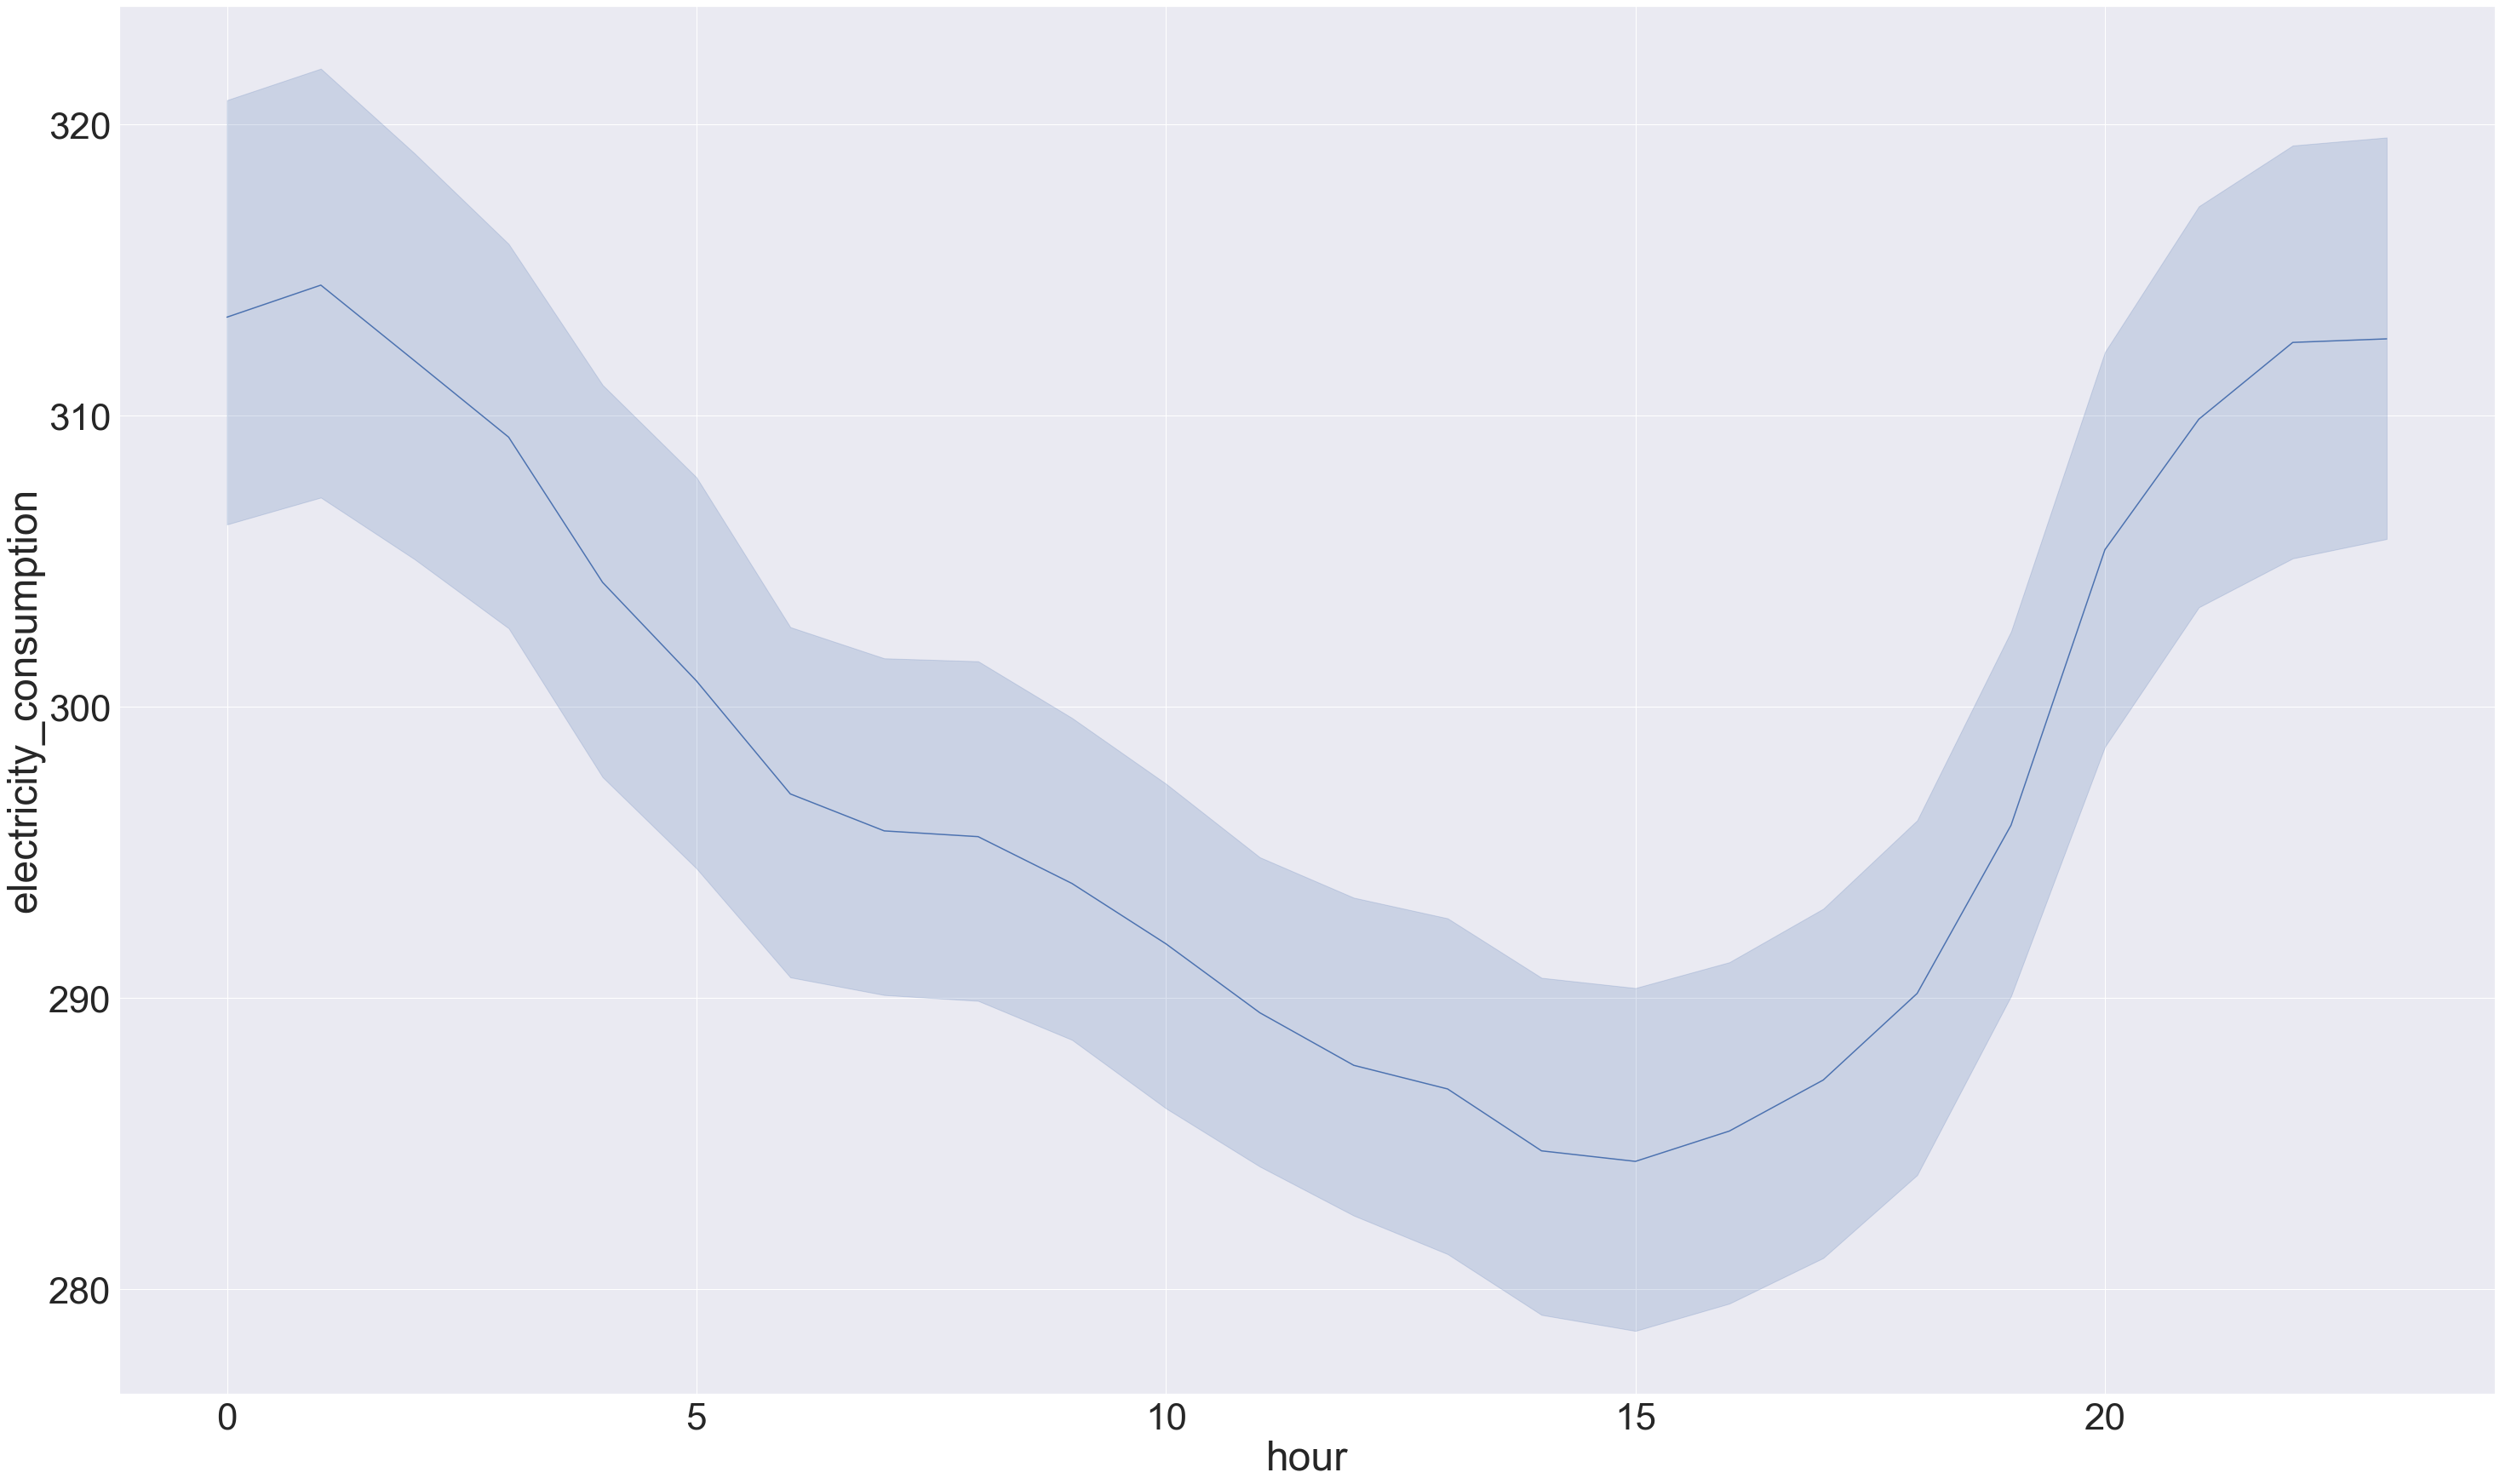

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#fmri = sns.load_dataset("fmri")

sns.set(font_scale = 4)
plt.rcParams["figure.figsize"] = (50, 30)
ax = sns.lineplot(x="hour", y="electricity_consumption", data=train)
#hue="Course_Domain",

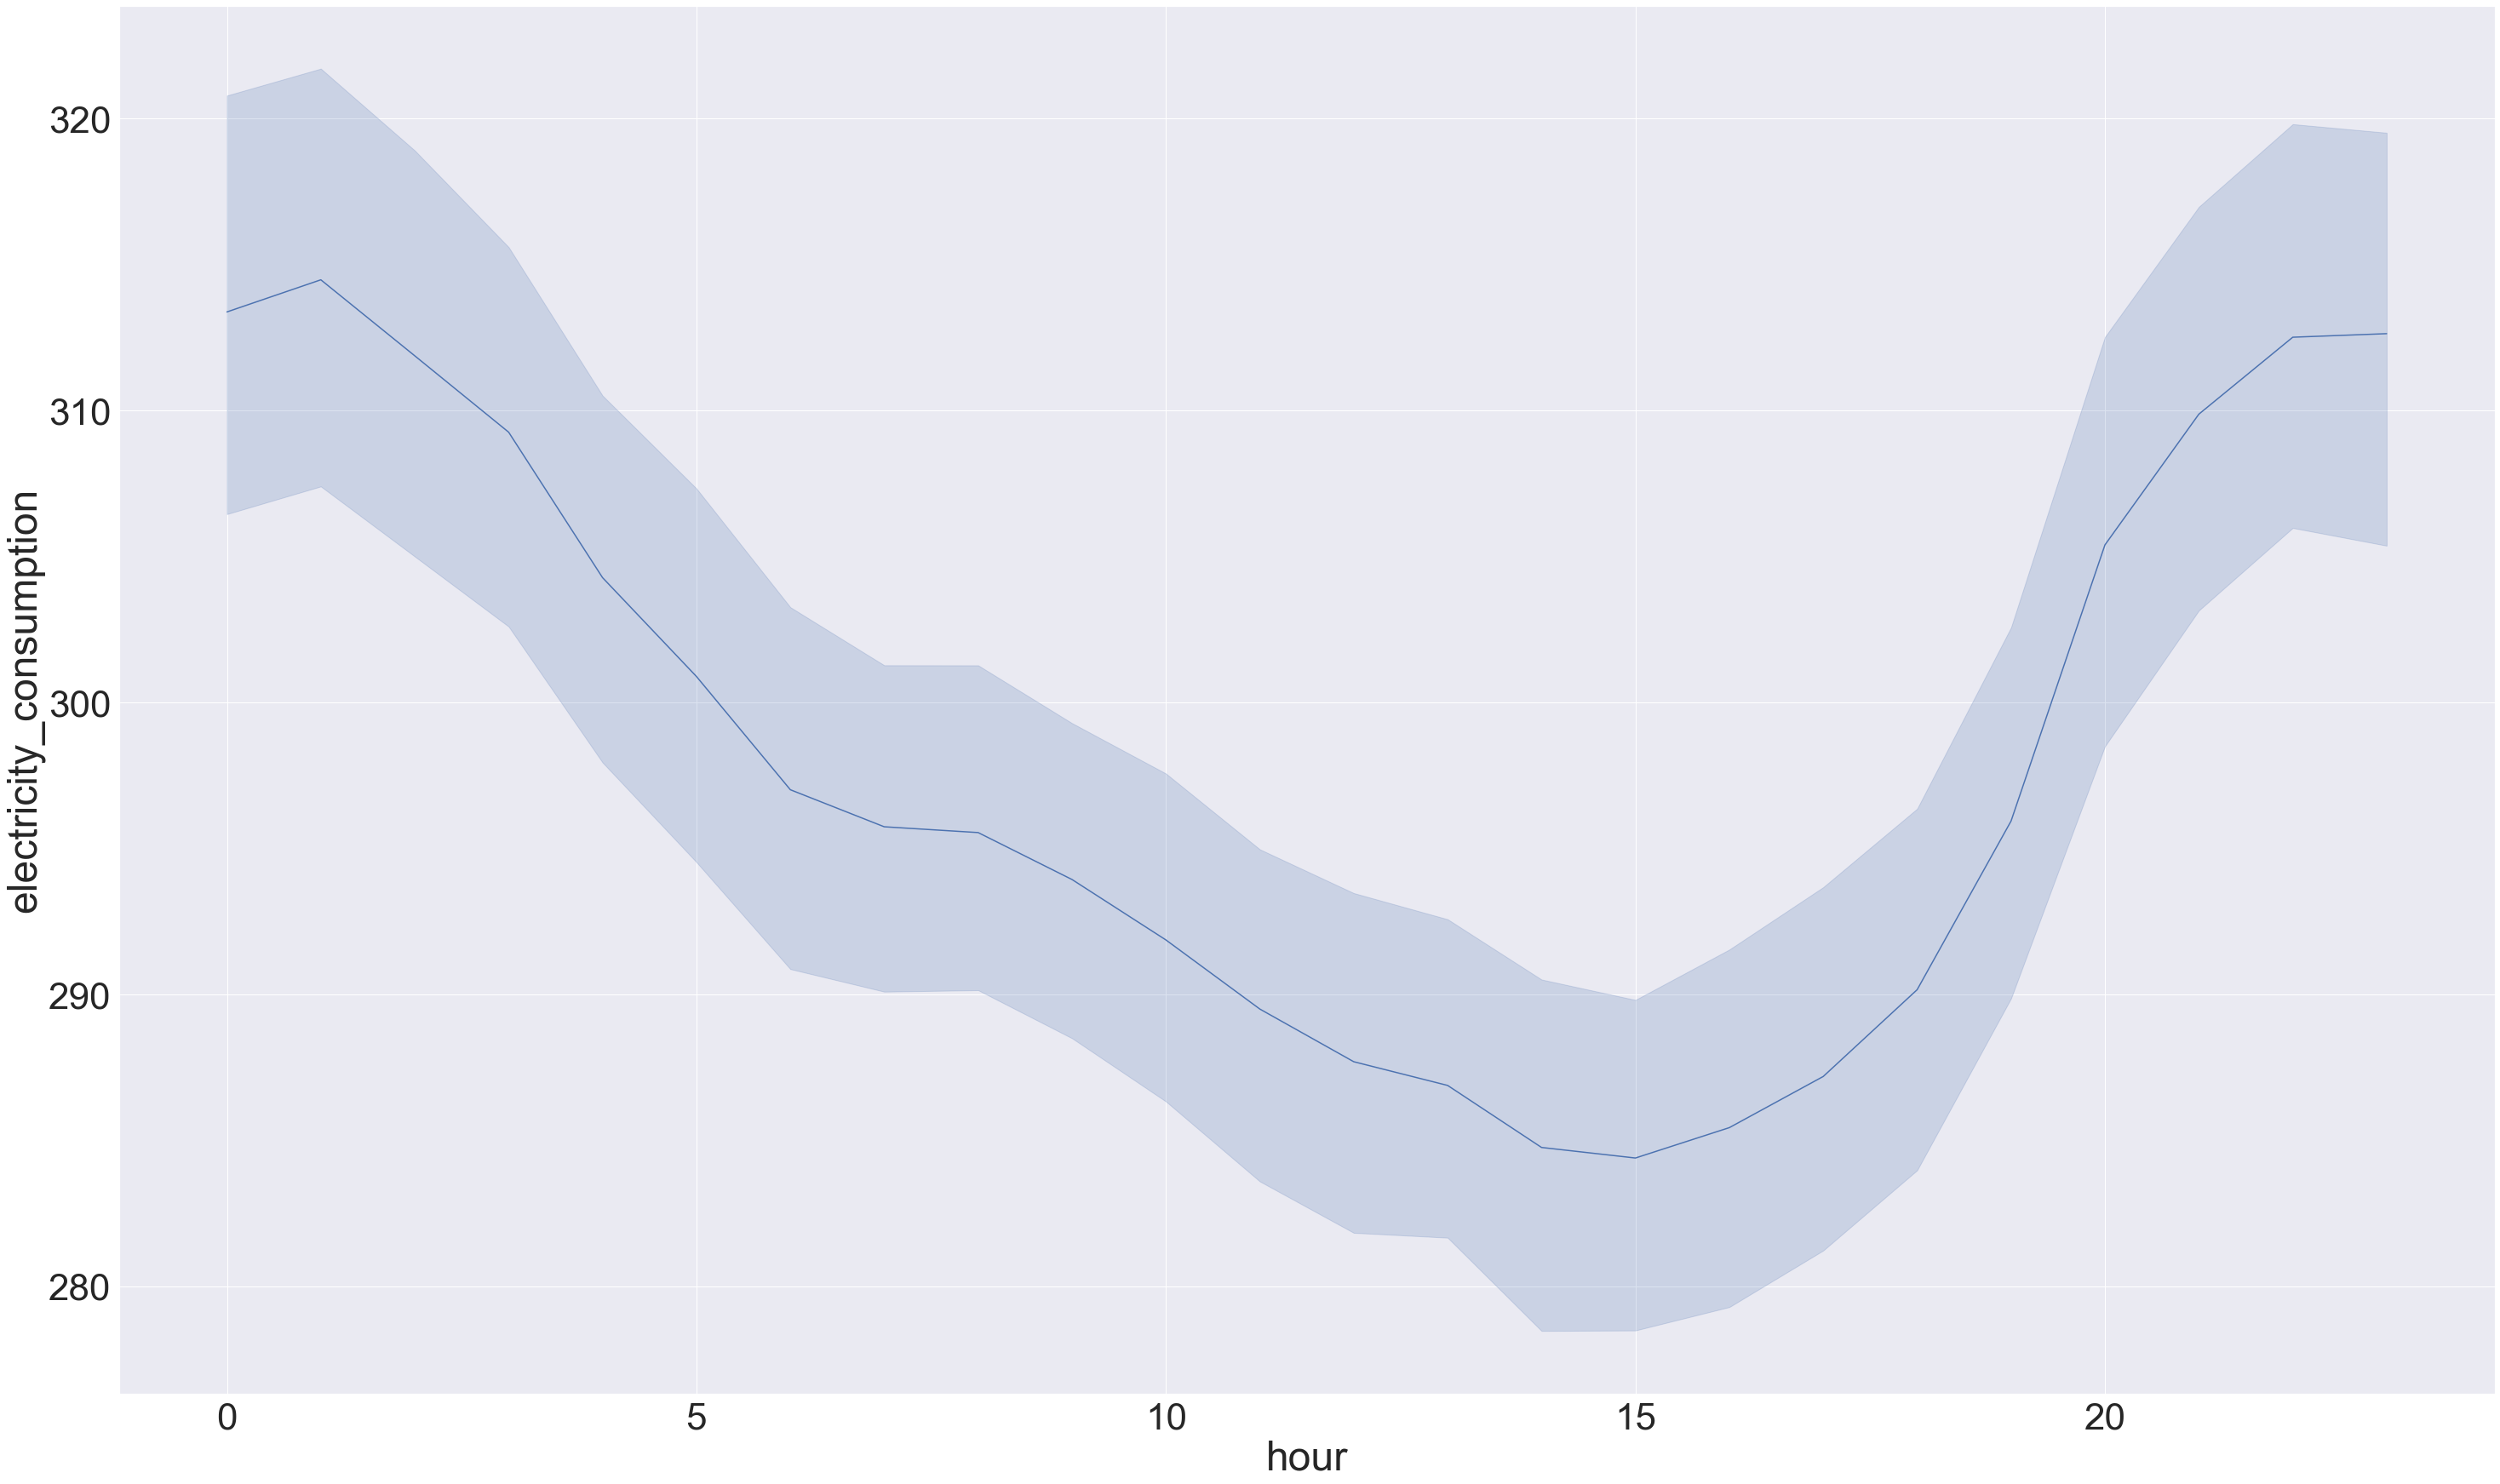

In [60]:
train_c = train[train['ID']<100]
#train_chart.head()

sns.set(font_scale = 4)
plt.rcParams["figure.figsize"] = (50, 30)
#plt.rcParams["axes.labelsize"] = 100
ax = sns.lineplot(x="hour", y="electricity_consumption", data=train)
#hue="Course_Domain",
#hue="Course_Domain",

In [31]:
train.dtypes

ID                                  int64
datetime                   datetime64[ns]
temperature                       float64
var1                              float64
pressure                          float64
windspeed                         float64
var2                               object
electricity_consumption           float64
dtype: object

In [34]:
#useless

month_days = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}

month_days[2]

28

In [3]:
train_date=train[['datetime','electricity_consumption']]
train_date['month']=train_date['datetime'].dt.month
train_date['year']=train_date['datetime'].dt.year
train_date['month_year']=train_date['month'].astype(str)+train_date['year'].astype(str)

test_date=test[['datetime']]
test_date['month']=test_date['datetime'].dt.month
test_date['year']=test_date['datetime'].dt.year
test_date['month_year']=test_date['month'].astype(str)+test_date['year'].astype(str)

month_year=train_date.month_year.value_counts().index.tolist()
month_year

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

['42014',
 '52017',
 '52014',
 '32015',
 '82016',
 '102014',
 '72016',
 '122014',
 '22017',
 '32014',
 '122015',
 '32017',
 '82014',
 '102015',
 '92016',
 '112016',
 '122016',
 '42015',
 '52015',
 '112015',
 '82015',
 '22014',
 '112014',
 '12016',
 '12015',
 '92015',
 '72015',
 '72014',
 '42017',
 '62015',
 '32016',
 '62016',
 '112013',
 '72013',
 '52016',
 '82013',
 '22016',
 '62014',
 '92013',
 '42016',
 '122013',
 '22015',
 '102013',
 '12014',
 '92014',
 '62017',
 '12017',
 '102016']

In [4]:
train_1=train_date[['datetime','electricity_consumption','month_year']]
train_1.set_index('datetime',inplace=True)


train_1

,electricity_consumption,month_year
datetime,,
2013-07-01 00:00:00,216.0,72013
2013-07-01 01:00:00,210.0,72013
2013-07-01 02:00:00,225.0,72013
2013-07-01 03:00:00,216.0,72013
2013-07-01 04:00:00,222.0,72013
...,...,...
2017-06-23 19:00:00,225.0,62017
2017-06-23 20:00:00,213.0,62017
2017-06-23 21:00:00,213.0,62017


In [5]:
from pmdarima import auto_arima

final_table= pd.DataFrame(columns=['date_time', 'electricity_consumption'])

for item in month_year:
    train_model=train_1[train_1['month_year']==item]
    test_filtered=test_date[test_date['month_year']==item]
    train_model.drop('month_year',axis=1,inplace=True)

#final_table= pd.DataFrame(columns=['Course_ID', 'Sales', 'Day_No'])
#Day_No=range(883,943)
#for ID in range(1,139):
#    train_time=train_date[train_date['Course_ID']==ID]
#    train_time=train_time[['date','Sales']]
#    train_time['date'] = pd.to_datetime(train_time['date'])
#    train_time.set_index('date',inplace=True)
   
    model = auto_arima(train_model, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=168,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           #parallel=True,n_jobs=8,
                           suppress_warnings=True, 
                           stepwise=True)
    print(model.aic())
    print(item)
    model.fit(train_model)

    forecast = model.predict(n_periods=len(test_filtered))
    #forecast
    
    #print(forecast)
    s=pd.DataFrame({'date_time':test_filtered.datetime,'electricity_consumption':forecast})
    #print(s)
    final_table=final_table.append(s,ignore_index=True)

final_table.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Outputs/SARIMAX 24 v2.csv',index=False)

    
    #forecast = pd.DataFrame(forecast,index = (883:942),columns=['Prediction'])
#print(train_time.head())
#train_time.dtypes

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 168); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 168); AIC=4052.347, BIC=4060.243, Fit time=6.914 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 168); AIC=3977.559, BIC=3993.351, Fit time=367.866 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 0, 168); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 168); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 168); AIC=4050.601, BIC=4054.549, Fit time=9.430 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 168); AIC=3986.744, BIC=3998.588, Fit time=383.572 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 0, 168); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 168); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 168); AIC=3919.509, BIC=3927.405, Fit time=9.324 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 168); AIC=3846.071, BIC=3861.863, Fit time=344.067 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 0, 168); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 168); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 168); AIC=3917.715, BIC=3921.663, Fit time=11.151 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 168); AIC=3847.739, BIC=3859.584, Fit time=236.432 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 0, 168); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0,

MemoryError: 

In [65]:
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Outputs/SARIMAX 24.csv',index=False)

In [67]:
final_table.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Outputs/SARIMAX 24.csv',index=False)


In [ ]:
##################          Code from previous iterations          ####################

In [41]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train_time, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
#print(stepwise_model.aic())

stepwise_model.fit(train_model)
future_forecast = stepwise_model.predict(n_periods=96)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 15); AIC=8155.800, BIC=8179.620, Fit time=13.231 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 15); AIC=9257.520, BIC=9267.047, Fit time=0.139 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 15); AIC=8719.704, BIC=8738.760, Fit time=3.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 15); AIC=8191.484, BIC=8210.540, Fit time=14.095 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 15); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 15); AIC=9255.531, BIC=9260.295, Fit time=0.101 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 15); AIC=8695.141, BIC=8714.196, Fit time=0.703 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 15); AIC=8160.488, BIC=8189.071, Fit time=15.892 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 15); setting score to inf (

KeyboardInterrupt: 